# 1. Data & Library Setup

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/STAGE1_SUBMISSION.csv', index_col='Date')
df

,U.S. Product Supplied of Finished Motor Gasoline_x,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x,U.S. Product Supplied of Finished Motor Gasoline_y,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y,Vehicles Sold (sum),State Acquired AVFs,Alternative Fuel Provider Acquired AVFs,Total Acquired AVFs,...,Military expenditure (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),Trade (% of GDP),Cereal production (metric tons),"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index
Date,,,,,,,,,,,,,,,,,,,,,
1991-02-08,6621,21.30,20.63,6621,21.30,20.63,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,823.3,2373.8486,0.946
1991-02-15,6433,22.12,20.44,6433,22.12,20.44,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,827.4,2371.1716,0.946
1991-02-22,6582,19.38,18.13,6582,19.38,18.13,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,822.8,2388.0629,0.946
1991-03-01,7224,18.73,18.66,7224,18.73,18.66,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,812.8,2378.9038,0.970
1991-03-08,6875,19.86,19.77,6875,19.86,19.77,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,830.5,2384.6170,0.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,9321,82.50,87.57,9321,82.50,87.57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335675.0,18151.2,17281.5624,3.452
2023-09-08,8307,87.17,91.29,8307,87.17,91.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222.1,17305.5106,NaN
2023-09-15,8410,89.14,93.87,8410,89.14,93.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18197.6,17296.2407,NaN


## 1.1. Dataset for submission

In [ ]:
# Data frame to submit
submit = df[df.index >= '2000-01-01']
submit.drop(columns = ['U.S. Product Supplied of Finished Motor Gasoline_y', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y',
                       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y'], inplace=True)
submit.rename(columns={'U.S. Product Supplied of Finished Motor Gasoline_x':'U.S. Product Supplied of Finished Motor Gasoline',
                       'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x': 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
                       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x': 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)'}, inplace=True)
submit.columns

<ipython-input-57-92d7c5089fd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit.drop(columns = ['U.S. Product Supplied of Finished Motor Gasoline_y', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y',
<ipython-input-57-92d7c5089fd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit.rename(columns={'U.S. Product Supplied of Finished Motor Gasoline_x':'U.S. Product Supplied of Finished Motor Gasoline',


Index(['U.S. Product Supplied of Finished Motor Gasoline',
       'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)',
       'Vehicles Sold (sum)', 'State Acquired AVFs ',
       'Alternative Fuel Provider Acquired AVFs', 'Total Acquired AVFs',
       'TSA Passenger Throughput',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'GDP', 'US_Index_Open', 'US_Index_High', 'US_Index_Low',
       'US_Index_Close',
       'Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)',
       'S&P 500',
       'U.S. Crude Oil and Natural Gas Rotary Rigs in Operation (Count)',
       'TOTALSA', 'PCE',
       'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)',
       'U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)',
       'U. S. Operating Crude Oil Distillation Capacity (Thousand Barrels pe

In [ ]:
df1 = df.loc[df.index >= '2000-01-01']
#df = df.drop(columns=['U.S. Product Supplied of Finished Motor Gasoline_y','Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y','Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y', 'Alternative Fuel Provider Acquired AVFs'])

# 2. Data Cleaning





## 2.1. US GDP,  Total Acquired AVFs and EV Sales

In [ ]:
#cleaning US GDP
for i in df1.index:
  df1['GDP'] = df1['GDP'].astype(float)
  df1['GDP'][i]=df1['GDP'][i]/13

df1['GDP']

<ipython-input-59-0b5038d0da1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GDP'] = df1['GDP'].astype(float)
<ipython-input-59-0b5038d0da1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GDP'][i]=df1['GDP'][i]/13


Date
2000-01-07    769.398385
2000-01-14    769.398385
2000-01-21    769.398385
2000-01-28    769.398385
2000-02-04    769.398385
                 ...    
2023-09-01           NaN
2023-09-08           NaN
2023-09-15           NaN
2023-09-22           NaN
2023-09-29           NaN
Name: GDP, Length: 1239, dtype: float64

In [ ]:
#Cleaning Ev Regulations
df1.rename(columns = {'State Acquired AVFs ':'State Acquired AVFs'}, inplace = True)

df1 = df1.drop(columns=['State Acquired AVFs', 'Alternative Fuel Provider Acquired AVFs'])

df1["Total Acquired AVFs"] = [float(str(i).replace(",", "")) for i in df1["Total Acquired AVFs"]]

for i in df1.index:
  df1['Total Acquired AVFs'][i]=df1['Total Acquired AVFs'][i]/52

df1['Total Acquired AVFs']

<ipython-input-60-9106387fea46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'State Acquired AVFs ':'State Acquired AVFs'}, inplace = True)
<ipython-input-60-9106387fea46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total Acquired AVFs'][i]=df1['Total Acquired AVFs'][i]/52


Date
2000-01-07    269.288462
2000-01-14    269.288462
2000-01-21    269.288462
2000-01-28    269.288462
2000-02-04    269.288462
                 ...    
2023-09-01           NaN
2023-09-08           NaN
2023-09-15           NaN
2023-09-22           NaN
2023-09-29           NaN
Name: Total Acquired AVFs, Length: 1239, dtype: float64

In [ ]:
df1.loc[(df1.index>='2022-01-14') & (df1.index<='2022-12-30'), 'Total Acquired AVFs'] = 224.134615
df1['Total Acquired AVFs']

Date
2000-01-07    269.288462
2000-01-14    269.288462
2000-01-21    269.288462
2000-01-28    269.288462
2000-02-04    269.288462
                 ...    
2023-09-01           NaN
2023-09-08           NaN
2023-09-15           NaN
2023-09-22           NaN
2023-09-29           NaN
Name: Total Acquired AVFs, Length: 1239, dtype: float64

In [ ]:
#cleaning ev sales
df1.rename(columns = {'Vehicles Sold (sum)':'EV Sales'}, inplace = True)
for i in df1.index:
  df1['EV Sales'] = df1['EV Sales'].astype(float)
  df1['EV Sales'][i]=df1['EV Sales'][i]/52

df1['EV Sales'].tail(100)

<ipython-input-62-aa1d2f5a41ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EV Sales'][i]=df1['EV Sales'][i]/52


Date
2021-11-05    12115.384615
2021-11-12    12115.384615
2021-11-19    12115.384615
2021-11-26    12115.384615
2021-12-03    12115.384615
                  ...     
2023-09-01             NaN
2023-09-08             NaN
2023-09-15             NaN
2023-09-22             NaN
2023-09-29             NaN
Name: EV Sales, Length: 100, dtype: float64

In [ ]:
from scipy.stats import pearsonr
df1.isnull().sum()

U.S. Product Supplied of Finished Motor Gasoline_x                                                      0
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x                                            0
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x                                               0
U.S. Product Supplied of Finished Motor Gasoline_y                                                      0
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y                                            0
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y                                               0
EV Sales                                                                                              611
Total Acquired AVFs                                                                                    39
TSA Passenger Throughput                                                                              981
Weekly U.S. Regular All Formulations Retail Ga

In [ ]:
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

Filling in NAs in Total Acquired AVFs

In [ ]:
df1[pd.isna(df1['Total Acquired AVFs'])]['Total Acquired AVFs']

Date
2023-01-06   NaN
2023-01-13   NaN
2023-01-20   NaN
2023-01-27   NaN
2023-02-03   NaN
2023-02-10   NaN
2023-02-17   NaN
2023-02-24   NaN
2023-03-03   NaN
2023-03-10   NaN
2023-03-17   NaN
2023-03-24   NaN
2023-03-31   NaN
2023-04-07   NaN
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Total Acquired AVFs, dtype: float64

In [ ]:
#Future
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Total Acquired AVFs & {i}: ' , pearsonr(df1[df1.index < '2023-01-06']['Total Acquired AVFs'], df1[df1.index < '2023-01-06'][i])[0])

Correlation between Total Acquired AVFs & U.S. Product Supplied of Finished Motor Gasoline_x:  0.1678248909463742
Correlation between Total Acquired AVFs & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.3023135540627115
Correlation between Total Acquired AVFs & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.34720266544555667
Correlation between Total Acquired AVFs & US_Index_Close:  -0.1613770744082091
Correlation between Total Acquired AVFs & Jobless Claims:  -0.11448496006302737
Correlation between Total Acquired AVFs &  1 year Expected Inflation:  -0.28868083899310815
Correlation between Total Acquired AVFs & Deposits All Commercial Banks:  0.3606434413194473


In [ ]:
# Predict Total Acquired AVFs from January 2023 to September 2023 based on:
# - U.S. Product Supplied of Finished Motor Gasoline_x
# - Deposits All Commercial Banks
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x'


df_avf = df1[df1.index<'2023-01-06'][['Total Acquired AVFs', 'U.S. Product Supplied of Finished Motor Gasoline_x', 'Deposits All Commercial Banks', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x']]
df_avf = df_avf.reset_index()
df_avf['Date'] = pd.to_datetime(df_avf['Date'])
df_avf = df_avf.sort_values('Date')
df_avf = df_avf.rename(columns={'Date': 'ds', 'Total Acquired AVFs': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_avf)

future_dates = pd.date_range(start='2023-01-06', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/z0lxbxg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/ifciea8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69847', 'data', 'file=/tmp/tmpw_70nzfd/z0lxbxg7.json', 'init=/tmp/tmpw_70nzfd/ifciea8d.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model87pl74jx/prophet_model-20231129044839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     175.814851
1     175.734300
2     175.920016
3     175.329367
4     173.958823
5     172.587109
6     171.777473
7     171.322579
8     170.653985
9     169.580706
10    168.447926
11    167.624788
12    167.042076
13    166.338973
14    165.355146
15    164.305735
16    163.452939
17    162.752068
18    161.938921
19    160.908503
20    159.858321
21    159.012176
22    158.312484
23    157.500356
24    156.469107
25    155.408267
26    154.543884
27    153.829986
28    153.011969
29    151.976986
30    150.913126
31    150.054553
32    149.355187
33    148.541834
34    147.487553
35    146.397954
36    145.538280
37    144.856226
38    144.027479
Name: yhat, dtype: float64

In [ ]:
df1['Total Acquired AVFs'] = list(df1[df1.index < '2023-01-06']['Total Acquired AVFs']) + list(avf_values)
df1['Total Acquired AVFs']

Date
2000-01-07    269.288462
2000-01-14    269.288462
2000-01-21    269.288462
2000-01-28    269.288462
2000-02-04    269.288462
                 ...    
2023-09-01    147.487553
2023-09-08    146.397954
2023-09-15    145.538280
2023-09-22    144.856226
2023-09-29    144.027479
Name: Total Acquired AVFs, Length: 1239, dtype: float64

Filling Future Values for GDP

In [ ]:
df1[pd.isna(df1['GDP'])]['GDP']

Date
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: GDP, dtype: float64

In [ ]:
#Future
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks', 'Total Acquired AVFs']
for i in var_list:
  print(f'Correlation between GDP & {i}: ' , pearsonr(df1[df1.index < '2023-04-14']['Total Acquired AVFs'], df1[df1.index < '2023-04-14'][i])[0])

Correlation between GDP & U.S. Product Supplied of Finished Motor Gasoline_x:  0.17511208532041941
Correlation between GDP & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.29111750671934505
Correlation between GDP & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.3353372735822994
Correlation between GDP & US_Index_Close:  -0.174126882788945
Correlation between GDP & Jobless Claims:  -0.1064620647917122
Correlation between GDP &  1 year Expected Inflation:  -0.2941632547868844
Correlation between GDP & Deposits All Commercial Banks:  0.31776199892428286
Correlation between GDP & Total Acquired AVFs:  1.0


In [ ]:
# Predict Total Acquired AVFs from January 2023 to September 2023 based on:
# - U.S. Product Supplied of Finished Motor Gasoline_x
# - Deposits All Commercial Banks
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x'


df_gdp = df1[df1.index<'2023-04-14'][['GDP', 'U.S. Product Supplied of Finished Motor Gasoline_x', 'Deposits All Commercial Banks', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Total Acquired AVFs']]
df_gdp = df_gdp.reset_index()
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'])
df_gdp = df_gdp.sort_values('Date')
df_gdp = df_gdp.rename(columns={'Date': 'ds', 'GDP': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_gdp)

future_dates = pd.date_range(start='2023-04-14', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

gdp_predictions = prophet_model.predict(future_df)
gdp_values = gdp_predictions['yhat']
gdp_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/m8rs082g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/ye7av9er.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52563', 'data', 'file=/tmp/tmpw_70nzfd/m8rs082g.json', 'init=/tmp/tmpw_70nzfd/ye7av9er.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model2wwnys7b/prophet_model-20231129044840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     2017.479214
1     2017.745056
2     2017.490944
3     2017.992847
4     2019.668739
5     2021.672397
6     2022.667390
7     2022.288516
8     2021.958297
9     2024.048916
10    2029.853796
11    2038.140782
12    2045.770187
13    2050.028323
14    2050.661042
15    2049.796336
16    2049.899596
17    2051.704732
18    2053.961872
19    2055.026737
20    2054.639545
21    2054.260392
22    2055.814019
23    2060.087094
24    2066.114506
Name: yhat, dtype: float64

In [ ]:
df1['GDP'] = list(df1[df1.index < '2023-04-14']['GDP']) + list(gdp_values)
df1['GDP']

Date
2000-01-07     769.398385
2000-01-14     769.398385
2000-01-21     769.398385
2000-01-28     769.398385
2000-02-04     769.398385
                 ...     
2023-09-01    2054.639545
2023-09-08    2054.260392
2023-09-15    2055.814019
2023-09-22    2060.087094
2023-09-29    2066.114506
Name: GDP, Length: 1239, dtype: float64

Filling Future and Historical Data for EV Sales

In [ ]:
df1[pd.isna(df1['EV Sales'])]['EV Sales']

Date
2000-01-07   NaN
2000-01-14   NaN
2000-01-21   NaN
2000-01-28   NaN
2000-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: EV Sales, Length: 611, dtype: float64

In [ ]:
#sales of ev didn't really gain popularity until 2010, and historical prediction only provided negative values
df1.loc[(df1.index>='2000-01-07') & (df1.index<='2009-12-25'), 'EV Sales'] = 0
df1['EV Sales']

Date
2000-01-07    0.0
2000-01-14    0.0
2000-01-21    0.0
2000-01-28    0.0
2000-02-04    0.0
             ... 
2023-09-01    NaN
2023-09-08    NaN
2023-09-15    NaN
2023-09-22    NaN
2023-09-29    NaN
Name: EV Sales, Length: 1239, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Deposits All Commercial Banks', 'GDP', "Total Acquired AVFs"]

for i in var_list:
  print(f'Correlation between EV Sales & {i}: ' , pearsonr(df1[df1.index < '2022-01-14']['EV Sales'], df1[df1.index < '2022-01-14'][i])[0])

Correlation between EV Sales & U.S. Product Supplied of Finished Motor Gasoline_x:  0.018033842483390836
Correlation between EV Sales & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.0201604659142646
Correlation between EV Sales & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.06121964179521407
Correlation between EV Sales & US_Index_Close:  0.1338889795246052
Correlation between EV Sales & Jobless Claims:  0.08566149441361617
Correlation between EV Sales &  1 year Expected Inflation:  -0.19735523681409103
Correlation between EV Sales & Deposits All Commercial Banks:  0.8909879109274266
Correlation between EV Sales & GDP:  0.8679320634021617
Correlation between EV Sales & Total Acquired AVFs:  0.2782121693590625


In [ ]:
# Predict EV Sales for the period from January 2000 to December 2009 based on:future
# - Deposits All Commercial Banks
# - GDP
# - Total Acquired AVFs

df_ev = df1[df1.index<'2022-01-14'][['EV Sales', 'Deposits All Commercial Banks', 'GDP', 'Total Acquired AVFs']]
df_ev = df_ev.reset_index()
df_ev['Date'] = pd.to_datetime(df_ev['Date'])
df_ev = df_ev.sort_values('Date')
df_ev = df_ev.rename(columns={'Date': 'ds', 'EV Sales': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_ev)

future_dates = pd.date_range(start='2022-01-14', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})


ev_predictions = prophet_model.predict(future_df)
ev_values = ev_predictions['yhat']
ev_values


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/plxv2q2g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/cigzrmi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86597', 'data', 'file=/tmp/tmpw_70nzfd/plxv2q2g.json', 'init=/tmp/tmpw_70nzfd/cigzrmi3.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model1dhwtbc8/prophet_model-20231129044841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     11226.860557
1     11144.218021
2     11085.315340
3     11113.262634
4     11186.791827
          ...     
85    13273.639230
86    13312.391518
87    13343.798247
88    13349.951773
89    13347.893416
Name: yhat, Length: 90, dtype: float64

In [ ]:
df1['EV Sales'] = list(df1[df1.index < '2022-01-14']['EV Sales']) + list(ev_values)
df1['EV Sales']

Date
2000-01-07        0.000000
2000-01-14        0.000000
2000-01-21        0.000000
2000-01-28        0.000000
2000-02-04        0.000000
                  ...     
2023-09-01    13273.639230
2023-09-08    13312.391518
2023-09-15    13343.798247
2023-09-22    13349.951773
2023-09-29    13347.893416
Name: EV Sales, Length: 1239, dtype: float64

Filling NA values of TSA Throughput

In [ ]:
df1[pd.isna(df1['TSA Passenger Throughput'])]['TSA Passenger Throughput']

Date
2000-01-07   NaN
2000-01-14   NaN
2000-01-21   NaN
2000-01-28   NaN
2000-02-04   NaN
              ..
2018-09-21   NaN
2018-09-28   NaN
2018-10-05   NaN
2018-10-12   NaN
2018-10-19   NaN
Name: TSA Passenger Throughput, Length: 981, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Deposits All Commercial Banks', 'GDP', "Total Acquired AVFs", 'EV Sales']
for i in var_list:
  print(f'Correlation between TSA & {i}: ' , pearsonr(df1[df1.index > '2018-10-19']['TSA Passenger Throughput'], df1[df1.index > '2018-10-19'][i])[0])

Correlation between TSA & U.S. Product Supplied of Finished Motor Gasoline_x:  0.5410425145291421
Correlation between TSA & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.4226177650283495
Correlation between TSA & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.45262974720078825
Correlation between TSA & US_Index_Close:  0.15090557723390896
Correlation between TSA & Jobless Claims:  -0.551280905560711
Correlation between TSA &  1 year Expected Inflation:  0.3896881680340354
Correlation between TSA & Deposits All Commercial Banks:  -0.03885874980990927
Correlation between TSA & GDP:  0.26992705382165677
Correlation between TSA & Total Acquired AVFs:  -0.004054068329933642
Correlation between TSA & EV Sales:  0.2017418883376615


In [ ]:
df1.loc[(df1.index>='2000-01-01') & (df1.index<'2004-01-01'), 'TSA Passenger Throughput'] = (700900000/52)
df1.loc[(df1.index>='2004-01-01') & (df1.index<'2005-01-01'), 'TSA Passenger Throughput'] = (763700000/52)
df1.loc[(df1.index>='2005-01-01') & (df1.index<'2006-01-01'), 'TSA Passenger Throughput'] = (800800000/52)
df1.loc[(df1.index>='2006-01-01') & (df1.index<'2007-01-01'), 'TSA Passenger Throughput'] = (808100000/52)
df1.loc[(df1.index>='2007-01-01') & (df1.index<'2008-01-01'), 'TSA Passenger Throughput'] = (835500000/52)
df1.loc[(df1.index>='2008-01-01') & (df1.index<'2009-01-01'), 'TSA Passenger Throughput'] = (809800000/52)
df1.loc[(df1.index>='2009-01-01') & (df1.index<'2010-01-01'), 'TSA Passenger Throughput'] = (767800000/52)
df1.loc[(df1.index>='2010-01-01') & (df1.index<'2011-01-01'), 'TSA Passenger Throughput'] = (787500000/52)
df1.loc[(df1.index>='2011-01-01') & (df1.index<'2012-01-01'), 'TSA Passenger Throughput'] = (802100000/52)
df1.loc[(df1.index>='2012-01-01') & (df1.index<'2013-01-01'), 'TSA Passenger Throughput'] = (813100000/52)
df1.loc[(df1.index>='2013-01-01') & (df1.index<'2014-01-01'), 'TSA Passenger Throughput'] = (825300000/52)
df1.loc[(df1.index>='2014-01-01') & (df1.index<'2015-01-01'), 'TSA Passenger Throughput'] = (851800000/52)
df1.loc[(df1.index>='2015-01-01') & (df1.index<'2016-01-01'), 'TSA Passenger Throughput'] = (896600000/52)
df1.loc[(df1.index>='2016-01-01') & (df1.index<'2017-01-01'), 'TSA Passenger Throughput'] = (932000000/52)
df1.loc[(df1.index>='2017-01-01') & (df1.index<'2018-01-01'), 'TSA Passenger Throughput'] = (965400000/52)
df1.loc[(df1.index>='2018-01-01') & (df1.index<='2018-10-19'), 'TSA Passenger Throughput'] = (1013600000/52)





df1['TSA Passenger Throughput'].head(300)

Date
2000-01-07    1.347885e+07
2000-01-14    1.347885e+07
2000-01-21    1.347885e+07
2000-01-28    1.347885e+07
2000-02-04    1.347885e+07
                  ...     
2005-09-02    1.540000e+07
2005-09-09    1.540000e+07
2005-09-16    1.540000e+07
2005-09-23    1.540000e+07
2005-09-30    1.540000e+07
Name: TSA Passenger Throughput, Length: 300, dtype: float64

In [ ]:
df1[pd.isna(df1['TSA Passenger Throughput'])]['TSA Passenger Throughput']

Series([], Name: TSA Passenger Throughput, dtype: float64)

## 2.2. Cass Freight Index

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/STAGE1_SUBMISSION.csv', index_col='Date')
df

,U.S. Product Supplied of Finished Motor Gasoline_x,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x,U.S. Product Supplied of Finished Motor Gasoline_y,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y,Vehicles Sold (sum),State Acquired AVFs,Alternative Fuel Provider Acquired AVFs,Total Acquired AVFs,...,Military expenditure (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),Trade (% of GDP),Cereal production (metric tons),"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index
Date,,,,,,,,,,,,,,,,,,,,,
1991-02-08,6621,21.30,20.63,6621,21.30,20.63,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,823.3,2373.8486,0.946
1991-02-15,6433,22.12,20.44,6433,22.12,20.44,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,827.4,2371.1716,0.946
1991-02-22,6582,19.38,18.13,6582,19.38,18.13,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,822.8,2388.0629,0.946
1991-03-01,7224,18.73,18.66,7224,18.73,18.66,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,812.8,2378.9038,0.970
1991-03-08,6875,19.86,19.77,6875,19.86,19.77,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,830.5,2384.6170,0.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,9321,82.50,87.57,9321,82.50,87.57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335675.0,18151.2,17281.5624,3.452
2023-09-08,8307,87.17,91.29,8307,87.17,91.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18222.1,17305.5106,NaN
2023-09-15,8410,89.14,93.87,8410,89.14,93.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18197.6,17296.2407,NaN


In [ ]:
# impute the na values in September 2023 with the monthly value of September 2023
df.loc[pd.isna(df['Cass Freight Index']), 'Cass Freight Index'] = 3.452

## 2.3. Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)

In [ ]:
# data is only available from June 28, 2000
df[pd.isna(df['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'])]

,U.S. Product Supplied of Finished Motor Gasoline_x,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x,U.S. Product Supplied of Finished Motor Gasoline_y,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y",Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y,Vehicles Sold (sum),State Acquired AVFs,Alternative Fuel Provider Acquired AVFs,Total Acquired AVFs,...,Military expenditure (% of GDP),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),Trade (% of GDP),Cereal production (metric tons),"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index
Date,,,,,,,,,,,,,,,,,,,,,
1991-02-08,6621,21.30,20.63,6621,21.30,20.63,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,823.3,2373.8486,0.946
1991-02-15,6433,22.12,20.44,6433,22.12,20.44,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,827.4,2371.1716,0.946
1991-02-22,6582,19.38,18.13,6582,19.38,18.13,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252253.0,822.8,2388.0629,0.946
1991-03-01,7224,18.73,18.66,7224,18.73,18.66,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,812.8,2378.9038,0.970
1991-03-08,6875,19.86,19.77,6875,19.86,19.77,NaN,NaN,NaN,NaN,...,4.883429,3.012912,11.446428,19.786448,280063390.6,452015904.0,252507.0,830.5,2384.6170,0.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-26,9075,29.46,29.05,9075,29.46,29.05,NaN,"11,327","2,676","14,003",...,3.112242,1.846789,11.114449,25.102995,342631506.0,665327414.0,281996.0,1098.3,3577.8805,1.450
2000-06-02,8863,29.98,29.64,8863,29.98,29.64,NaN,"11,327","2,676","14,003",...,3.112242,1.846789,11.114449,25.102995,342631506.0,665327414.0,282247.0,1104.1,3582.9531,1.472
2000-06-09,8403,29.79,28.67,8403,29.79,28.67,NaN,"11,327","2,676","14,003",...,3.112242,1.846789,11.114449,25.102995,342631506.0,665327414.0,282247.0,1108.4,3593.6205,1.472


In [ ]:
from scipy.stats import pearsonr

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'U.S. Product Supplied of Finished Motor Gasoline_y',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Consumer Loans & {i}: ' , pearsonr(df[df.index > '2000-06-23']['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'], df[df.index > '2000-06-23'][i])[0])

Correlation between Consumer Loans & U.S. Product Supplied of Finished Motor Gasoline_x:  -0.01233909096234732
Correlation between Consumer Loans & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.32692598034703696
Correlation between Consumer Loans & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.3950398013415494
Correlation between Consumer Loans & U.S. Product Supplied of Finished Motor Gasoline_y:  -0.01233909096234732
Correlation between Consumer Loans & US_Index_Close:  0.06863171146396964
Correlation between Consumer Loans & Jobless Claims:  0.003244853182899367
Correlation between Consumer Loans &  1 year Expected Inflation:  -0.1953149339943962
Correlation between Consumer Loans & Money Supply:  0.6538438484141255
Correlation between Consumer Loans & Deposits All Commercial Banks:  0.9301326466465694


In [ ]:
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

In [ ]:
# Predict Consumer Loans for the period from February 1991 to June 2000 based on:
# - Deposits All Commercial Banks
# - Money Supply
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x

df_consumer = df[df.index>'2000-06-23'][['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)', 'Money Supply', 'Deposits All Commercial Banks', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x']]
df_consumer = df_consumer.reset_index()
df_consumer['Date'] = pd.to_datetime(df_consumer['Date'])
df_consumer = df_consumer.sort_values('Date')
df_consumer = df_consumer.rename(columns={'Date': 'ds', 'Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_consumer)

historical_dates = pd.date_range(start='1991-02-08', end='2000-06-30', freq='W')
historical_df = pd.DataFrame({'ds': historical_dates})

consumer_loans_predictions = prophet_model.predict(historical_df)
consumer_loans_values = consumer_loans_predictions['yhat']
consumer_loans_values


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/rserqp28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/jcvgtadr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83183', 'data', 'file=/tmp/tmpw_70nzfd/rserqp28.json', 'init=/tmp/tmpw_70nzfd/jcvgtadr.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model1hmc2xr3/prophet_model-20231129044842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0       67.094597
1       67.751555
2       68.102005
3       67.184766
4       65.800400
          ...    
485    214.379244
486    214.063671
487    214.073222
488    214.247761
489    214.157772
Name: yhat, Length: 490, dtype: float64

In [ ]:
df['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'] = list(consumer_loans_values) + list(df[df.index >= '2000-06-30']['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'])
df['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)']

Date
1991-02-08      67.094597
1991-02-15      67.751555
1991-02-22      68.102005
1991-03-01      67.184766
1991-03-08      65.800400
                 ...     
2023-09-01    1011.889600
2023-09-08    1009.544800
2023-09-15    1012.182300
2023-09-22    1015.312900
2023-09-29    1016.422400
Name: Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD), Length: 1704, dtype: float64

## 2.4. Vehicle Miles Traveled

In [ ]:
df[pd.isna(df['VMT'])]['VMT']

Date
1999-12-10   NaN
1999-12-17   NaN
1999-12-24   NaN
1999-12-31   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: VMT, dtype: float64

In [ ]:
# impute the missing values in decemeber 1999, august 2023, september 2023 with suitable values
df.loc[(df.index>='2023-08-04') & (df.index<='2023-08-25'), 'VMT'] = 288396.0
df.loc[(df.index>='1999-12-10') & (df.index<='1999-12-31'), 'VMT'] = 221465.0
df.loc[(df.index>='2023-09-01') & (df.index<='2023-09-29'), 'VMT'] = 275556

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']
for i in var_list:
  print(f'Correlation between Machinery and transport equipment & {i}: ' , pearsonr(df[df.index < '2022-01-07']['Machinery and transport equipment (% of value added in manufacturing)'], df[df.index < '2022-01-07'][i])[0])

Correlation between Machinery and transport equipment & U.S. Product Supplied of Finished Motor Gasoline_x:  0.430328369740361
Correlation between Machinery and transport equipment & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.23968377364876134
Correlation between Machinery and transport equipment & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.2633366019059333
Correlation between Machinery and transport equipment & US_Index_Close:  -0.2785134755209397
Correlation between Machinery and transport equipment & Jobless Claims:  -0.07690571577490585
Correlation between Machinery and transport equipment &  1 year Expected Inflation:  -0.4390977982140847
Correlation between Machinery and transport equipment & Money Supply:  -0.03858451395531929
Correlation between Machinery and transport equipment & Deposits All Commercial Banks:  0.28343068213921396
Correlation between Machinery and transport equipment & VMT:  0.4477500789583131


In [ ]:
# Data not available for 2022 and 2023
df[pd.isna(df['Machinery and transport equipment (% of value added in manufacturing)'])]['Machinery and transport equipment (% of value added in manufacturing)']

Date
2022-01-07   NaN
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Machinery and transport equipment (% of value added in manufacturing), Length: 91, dtype: float64

In [ ]:
# Predict Machinery and transport equipment for the period from January 2022 to September 2023 based on:
# - U.S. Product Supplied of Finished Motor Gasoline_x
# -  1 year Expected Inflation
# - Deposits All Commercial Banks
# - VMT

df_machine = df[df.index<'2022-01-07'][['Machinery and transport equipment (% of value added in manufacturing)', 'U.S. Product Supplied of Finished Motor Gasoline_x', 'U.S. Product Supplied of Finished Motor Gasoline_y', ' 1 year Expected Inflation', 'VMT', 'Deposits All Commercial Banks']]
df_machine = df_machine.reset_index()
df_machine['Date'] = pd.to_datetime(df_machine['Date'])
df_machine = df_machine.sort_values('Date')
df_machine = df_machine.rename(columns={'Date': 'ds', 'Machinery and transport equipment (% of value added in manufacturing)': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_machine)

future_dates = pd.date_range(start='2022-01-07', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

machine_predictions = prophet_model.predict(future_df)
machine_values = machine_predictions['yhat']
machine_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/t25lvo8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/y1ey0tt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55052', 'data', 'file=/tmp/tmpw_70nzfd/t25lvo8h.json', 'init=/tmp/tmpw_70nzfd/y1ey0tt0.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelr35edyzo/prophet_model-20231129044843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     25.224012
1     25.216235
2     25.194641
3     25.174107
4     25.162464
        ...    
86    24.085881
87    24.073918
88    24.060929
89    24.044795
90    24.027756
Name: yhat, Length: 91, dtype: float64

In [ ]:
df['Machinery and transport equipment (% of value added in manufacturing)'] = list(df[df.index < '2022-01-07']['Machinery and transport equipment (% of value added in manufacturing)']) + list(machine_values)
df['Machinery and transport equipment (% of value added in manufacturing)']

Date
1991-02-08    22.536781
1991-02-15    22.536781
1991-02-22    22.536781
1991-03-01    22.536781
1991-03-08    22.536781
                ...    
2023-09-01    24.085881
2023-09-08    24.073918
2023-09-15    24.060929
2023-09-22    24.044795
2023-09-29    24.027756
Name: Machinery and transport equipment (% of value added in manufacturing), Length: 1704, dtype: float64

## 2.5. Military Expenditure (% of GDP)

In [ ]:
df[pd.isna(df['Military expenditure (% of GDP)'])]['Military expenditure (% of GDP)']

Date
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
2022-02-11   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Military expenditure (% of GDP), Length: 90, dtype: float64

In [ ]:
df.loc[(df.index>='2022-01-14') & (df.index<='2022-01-28'), 'Military expenditure (% of GDP)'] = 3.454920
df[pd.isna(df['Military expenditure (% of GDP)'])]['Military expenditure (% of GDP)']

Date
2022-02-04   NaN
2022-02-11   NaN
2022-02-18   NaN
2022-02-25   NaN
2022-03-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Military expenditure (% of GDP), Length: 87, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)']
for i in var_list:
  print(f'Correlation between Military expenditure & {i}: ' , pearsonr(df[df.index < '2022-02-04']['Military expenditure (% of GDP)'], df[df.index < '2022-02-04'][i])[0])

Correlation between Military expenditure & U.S. Product Supplied of Finished Motor Gasoline_x:  -0.18421047570386873
Correlation between Military expenditure & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.29361775741721197
Correlation between Military expenditure & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.28417429485612733
Correlation between Military expenditure & US_Index_Close:  -0.11990337622421356
Correlation between Military expenditure & Jobless Claims:  0.11232681896699799
Correlation between Military expenditure &  1 year Expected Inflation:  -0.010168920624394005
Correlation between Military expenditure & Money Supply:  -0.20059367806473363
Correlation between Military expenditure & Deposits All Commercial Banks:  -0.18958178172193602
Correlation between Military expenditure & VMT:  -0.24520307582618386
Correlation between Military expenditure & Machinery and transport equipment (% of value added in manufacturing):  -0.4661061042151187

In [ ]:
# Predict Military expenditure (% of GDP) for the period from January 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# - Machinery and transport equipment (% of value added in manufacturing)
# - Money Supply

df_military = df[df.index<'2022-02-04'][['Military expenditure (% of GDP)', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Machinery and transport equipment (% of value added in manufacturing)', 'Money Supply']]
df_military = df_military.reset_index()
df_military['Date'] = pd.to_datetime(df_military['Date'])
df_military = df_military.sort_values('Date')
df_military = df_military.rename(columns={'Date': 'ds', 'Military expenditure (% of GDP)': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_military)

future_dates = pd.date_range(start='2022-02-04', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

military_predictions = prophet_model.predict(future_df)
military_values = military_predictions['yhat']
military_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/6eldv6o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/rpdg1cvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38733', 'data', 'file=/tmp/tmpw_70nzfd/6eldv6o1.json', 'init=/tmp/tmpw_70nzfd/rpdg1cvn.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelqxkq1lxf/prophet_model-20231129044844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     3.465107
1     3.465186
2     3.464618
3     3.466061
4     3.469050
        ...   
82    3.536051
83    3.536890
84    3.537427
85    3.538953
86    3.541440
Name: yhat, Length: 87, dtype: float64

In [ ]:
df['Military expenditure (% of GDP)'] = list(df[df.index < '2022-02-04']['Military expenditure (% of GDP)']) + list(military_values)
df['Military expenditure (% of GDP)']

Date
1991-02-08    4.883429
1991-02-15    4.883429
1991-02-22    4.883429
1991-03-01    4.883429
1991-03-08    4.883429
                ...   
2023-09-01    3.536051
2023-09-08    3.536890
2023-09-15    3.537427
2023-09-22    3.538953
2023-09-29    3.541440
Name: Military expenditure (% of GDP), Length: 1704, dtype: float64

In [ ]:
df[pd.isna(df['Military expenditure (% of GDP)'])]['Military expenditure (% of GDP)']

Series([], Name: Military expenditure (% of GDP), dtype: float64)

## 2.6. Fuel Exports (% of merchandise exports)

In [ ]:
df[pd.isna(df['Fuel exports (% of merchandise exports)'])]['Fuel exports (% of merchandise exports)']

Date
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
2022-02-11   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Fuel exports (% of merchandise exports), Length: 90, dtype: float64

In [ ]:
df[df.index=='2022-01-07']['Fuel exports (% of merchandise exports)']
df.loc[(df.index>='2022-01-14') & (df.index<'2022-02-04'), 'Fuel exports (% of merchandise exports)'] = 21.410166

In [ ]:
df[pd.isna(df['Fuel exports (% of merchandise exports)'])]['Fuel exports (% of merchandise exports)']

Date
2022-02-04   NaN
2022-02-11   NaN
2022-02-18   NaN
2022-02-25   NaN
2022-03-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Fuel exports (% of merchandise exports), Length: 87, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)']
for i in var_list:
  print(f'Correlation between Fuel exports (% of merchandise exports) & {i}: ' , pearsonr(df[df.index < '2022-02-04']['Fuel exports (% of merchandise exports)'], df[df.index < '2022-02-04'][i])[0])

Correlation between Fuel exports (% of merchandise exports) & U.S. Product Supplied of Finished Motor Gasoline_x:  0.39854484476280394
Correlation between Fuel exports (% of merchandise exports) & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.6294121769160426
Correlation between Fuel exports (% of merchandise exports) & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.6690253616425069
Correlation between Fuel exports (% of merchandise exports) & US_Index_Close:  -0.1979077736012536
Correlation between Fuel exports (% of merchandise exports) & Jobless Claims:  0.11315393015824475
Correlation between Fuel exports (% of merchandise exports) &  1 year Expected Inflation:  -0.6107565327207362
Correlation between Fuel exports (% of merchandise exports) & Money Supply:  0.6615621461570671
Correlation between Fuel exports (% of merchandise exports) & Deposits All Commercial Banks:  0.9471613460086187
Correlation between Fuel exports (% of merchandise exports) & 

In [ ]:
# Predict Fuel exports (% of merchandise exports) for the period from February 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# -  1 year Expected Inflation
# - Money Supply
# - Deposits All Commercial Banks
# - VMT

df_fuel_exports = df[df.index<'2022-02-04'][['Fuel exports (% of merchandise exports)', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
                                        ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']]
df_fuel_exports = df_fuel_exports.reset_index()
df_fuel_exports['Date'] = pd.to_datetime(df_fuel_exports['Date'])
df_fuel_exports = df_fuel_exports.sort_values('Date')
df_fuel_exports = df_fuel_exports.rename(columns={'Date': 'ds', 'Fuel exports (% of merchandise exports)': 'y'})
df_fuel_exports
prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_fuel_exports)

future_dates = pd.date_range(start='2022-02-04', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

fuel_exports_predictions = prophet_model.predict(future_df)
fuel_exports_values = fuel_exports_predictions['yhat']
fuel_exports_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/by0qc1j0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/wfpzfyhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81177', 'data', 'file=/tmp/tmpw_70nzfd/by0qc1j0.json', 'init=/tmp/tmpw_70nzfd/wfpzfyhq.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelwnh7avvq/prophet_model-20231129044845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     16.955896
1     16.955376
2     16.996097
3     17.027219
4     17.032392
        ...    
82    18.858807
83    18.881032
84    18.911206
85    18.932160
86    18.938542
Name: yhat, Length: 87, dtype: float64

In [ ]:
df['Fuel exports (% of merchandise exports)'] = list(df[df.index < '2022-02-04']['Fuel exports (% of merchandise exports)']) + list(fuel_exports_values)
df['Fuel exports (% of merchandise exports)']

Date
1991-02-08     3.012912
1991-02-15     3.012912
1991-02-22     3.012912
1991-03-01     3.012912
1991-03-08     3.012912
                ...    
2023-09-01    18.858807
2023-09-08    18.881032
2023-09-15    18.911206
2023-09-22    18.932160
2023-09-29    18.938542
Name: Fuel exports (% of merchandise exports), Length: 1704, dtype: float64

## 2.7. Fuel Imports (% of merchandise imports)

In [ ]:
df[pd.isna(df['Fuel imports (% of merchandise imports)'])]['Fuel imports (% of merchandise imports)']

Date
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
2022-02-11   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Fuel imports (% of merchandise imports), Length: 90, dtype: float64

In [ ]:
df[df.index=='2022-01-07']['Fuel imports (% of merchandise imports)']
df.loc[(df.index>='2022-01-14') & (df.index<'2022-02-04'), 'Fuel imports (% of merchandise imports)'] = 9.565536

In [ ]:
df[pd.isna(df['Fuel imports (% of merchandise imports)'])]['Fuel imports (% of merchandise imports)']

Date
2022-02-04   NaN
2022-02-11   NaN
2022-02-18   NaN
2022-02-25   NaN
2022-03-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Fuel imports (% of merchandise imports), Length: 87, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)']
for i in var_list:
  print(f'Correlation between Fuel imports (% of merchandise imports) & {i}: ' , pearsonr(df[df.index < '2022-02-04']['Fuel imports (% of merchandise imports)'], df[df.index < '2022-02-04'][i])[0])

Correlation between Fuel imports (% of merchandise imports) & U.S. Product Supplied of Finished Motor Gasoline_x:  0.3310981143319522
Correlation between Fuel imports (% of merchandise imports) & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.7070320964821684
Correlation between Fuel imports (% of merchandise imports) & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.6731437804190714
Correlation between Fuel imports (% of merchandise imports) & US_Index_Close:  -0.4774891587489224
Correlation between Fuel imports (% of merchandise imports) & Jobless Claims:  -0.05424422685066261
Correlation between Fuel imports (% of merchandise imports) &  1 year Expected Inflation:  -0.20590394483402055
Correlation between Fuel imports (% of merchandise imports) & Money Supply:  -0.29210517099531264
Correlation between Fuel imports (% of merchandise imports) & Deposits All Commercial Banks:  -0.06507012512754147
Correlation between Fuel imports (% of merchandise import

In [ ]:
# Predict Fuel imports (% of merchandise imports) for the period from February 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# - Military expenditure (% of GDP)
# - US_Index_Close
# - U.S. Product Supplied of Finished Motor Gasoline_x

df_fuel_imports = df[df.index<'2022-02-04'][['Fuel imports (% of merchandise imports)', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
                                        'Military expenditure (% of GDP)', 'US_Index_Close', 'U.S. Product Supplied of Finished Motor Gasoline_x']]
df_fuel_imports = df_fuel_imports.reset_index()
df_fuel_imports['Date'] = pd.to_datetime(df_fuel_imports['Date'])
df_fuel_imports = df_fuel_imports.sort_values('Date')
df_fuel_imports = df_fuel_imports.rename(columns={'Date': 'ds', 'Fuel imports (% of merchandise imports)': 'y'})
df_fuel_imports
prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_fuel_imports)

future_dates = pd.date_range(start='2022-02-04', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

fuel_imports_predictions = prophet_model.predict(future_df)
fuel_imports_values = fuel_imports_predictions['yhat']
fuel_imports_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/e42upf3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/28zd49d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75276', 'data', 'file=/tmp/tmpw_70nzfd/e42upf3h.json', 'init=/tmp/tmpw_70nzfd/28zd49d5.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelyrij3r3t/prophet_model-20231129044846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     6.755566
1     6.719377
2     6.719696
3     6.736138
4     6.739846
        ...   
82    6.331294
83    6.320945
84    6.319634
85    6.325389
86    6.325808
Name: yhat, Length: 87, dtype: float64

In [ ]:
df['Fuel imports (% of merchandise imports)'] = list(df[df.index < '2022-02-04']['Fuel imports (% of merchandise imports)']) + list(fuel_imports_values)
df['Fuel imports (% of merchandise imports)']

Date
1991-02-08    11.446428
1991-02-15    11.446428
1991-02-22    11.446428
1991-03-01    11.446428
1991-03-08    11.446428
                ...    
2023-09-01     6.331294
2023-09-08     6.320945
2023-09-15     6.319634
2023-09-22     6.325389
2023-09-29     6.325808
Name: Fuel imports (% of merchandise imports), Length: 1704, dtype: float64

## 2.8. Trade (% of GDP)

In [ ]:
df[pd.isna(df['Trade (% of GDP)'])]['Trade (% of GDP)']

Date
2022-01-07   NaN
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Trade (% of GDP), Length: 91, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)',
            'Fuel imports (% of merchandise imports)']
for i in var_list:
  print(f'Correlation between Trade (% of GDP) & {i}: ' , pearsonr(df[df.index < '2022-01-07']['Trade (% of GDP)'], df[df.index < '2022-01-07'][i])[0])

Correlation between Trade (% of GDP) & U.S. Product Supplied of Finished Motor Gasoline_x:  0.6392651876338071
Correlation between Trade (% of GDP) & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.8849255889028249
Correlation between Trade (% of GDP) & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.8964284987148435
Correlation between Trade (% of GDP) & US_Index_Close:  -0.5902906279912368
Correlation between Trade (% of GDP) & Jobless Claims:  -0.10143130818670557
Correlation between Trade (% of GDP) &  1 year Expected Inflation:  -0.5807542127662799
Correlation between Trade (% of GDP) & Money Supply:  0.09465854204711101
Correlation between Trade (% of GDP) & Deposits All Commercial Banks:  0.5745524251055693
Correlation between Trade (% of GDP) & VMT:  0.6422298796229465
Correlation between Trade (% of GDP) & Machinery and transport equipment (% of value added in manufacturing):  0.47590135828780056
Correlation between Trade (% of GDP) & Military ex

In [ ]:
# Predict Trade (% of GDP) for the period from January 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# - Military expenditure (% of GDP)
# - US_Index_Close
# - U.S. Product Supplied of Finished Motor Gasoline_x
# -  1 year Expected Inflation
# - Deposits All Commercial Banks
# - VMT

df_trade = df[df.index<'2022-01-07'][['Trade (% of GDP)', 'Fuel imports (% of merchandise imports)', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
                                      'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Military expenditure (% of GDP)',
                                      'US_Index_Close', 'U.S. Product Supplied of Finished Motor Gasoline_x',
                                             ' 1 year Expected Inflation', 'Deposits All Commercial Banks', 'VMT']]
df_trade = df_trade.reset_index()
df_trade['Date'] = pd.to_datetime(df_trade['Date'])
df_trade = df_trade.sort_values('Date')
df_trade = df_trade.rename(columns={'Date': 'ds', 'Trade (% of GDP)': 'y'})
df_trade
prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_trade)

future_dates = pd.date_range(start='2022-01-07', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

trade_predictions = prophet_model.predict(future_df)
trade_values = trade_predictions['yhat']
trade_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/qw7396c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/_5p2rn5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52161', 'data', 'file=/tmp/tmpw_70nzfd/qw7396c2.json', 'init=/tmp/tmpw_70nzfd/_5p2rn5m.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelbkenptfp/prophet_model-20231129044847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     24.692130
1     24.722485
2     24.719792
3     24.696141
4     24.674384
        ...    
86    23.712126
87    23.698875
88    23.688779
89    23.676569
90    23.659583
Name: yhat, Length: 91, dtype: float64

In [ ]:
df['Trade (% of GDP)'] = list(df[df.index < '2022-01-07']['Trade (% of GDP)']) + list(trade_values)
df['Trade (% of GDP)']

Date
1991-02-08    19.786448
1991-02-15    19.786448
1991-02-22    19.786448
1991-03-01    19.786448
1991-03-08    19.786448
                ...    
2023-09-01    23.712126
2023-09-08    23.698875
2023-09-15    23.688779
2023-09-22    23.676569
2023-09-29    23.659583
Name: Trade (% of GDP), Length: 1704, dtype: float64

## 2.9. Cereal Production (metric tons)

In [ ]:
df[pd.isna(df['Cereal production (metric tons)'])]['Cereal production (metric tons)']

Date
2022-01-07   NaN
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Cereal production (metric tons), Length: 91, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)',
            'Fuel imports (% of merchandise imports)', 'Trade (% of GDP)']
for i in var_list:
  print(f'Correlation between Cereal production (metric tons) & {i}: ' , pearsonr(df[df.index < '2022-01-07']['Cereal production (metric tons)'], df[df.index < '2022-01-07'][i])[0])

Correlation between Cereal production (metric tons) & U.S. Product Supplied of Finished Motor Gasoline_x:  0.5730788259004116
Correlation between Cereal production (metric tons) & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.5547529621810524
Correlation between Cereal production (metric tons) & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.5509365597494145
Correlation between Cereal production (metric tons) & US_Index_Close:  -0.3199119194265111
Correlation between Cereal production (metric tons) & Jobless Claims:  0.04939171792420554
Correlation between Cereal production (metric tons) &  1 year Expected Inflation:  -0.6333557965662321
Correlation between Cereal production (metric tons) & Money Supply:  0.4498662743911762
Correlation between Cereal production (metric tons) & Deposits All Commercial Banks:  0.8236869167002406
Correlation between Cereal production (metric tons) & VMT:  0.6537640788433134
Correlation between Cereal production (metric to

In [ ]:
# Predict Cereal production (metric tons) for the period from January 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# - Military expenditure (% of GDP)
# - U.S. Product Supplied of Finished Motor Gasoline_x
# -  1 year Expected Inflation
# - Deposits All Commercial Banks
# - VMT
# - Fuel exports (% of merchandise exports)
# - Trade (% of GDP)

df_cereal = df[df.index<'2022-01-07'][['Cereal production (metric tons)', 'Fuel imports (% of merchandise imports)', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
                                      'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'Military expenditure (% of GDP)',
                                      'U.S. Product Supplied of Finished Motor Gasoline_x', ' 1 year Expected Inflation', 'Deposits All Commercial Banks',
                                      'VMT', 'Trade (% of GDP)', 'Fuel exports (% of merchandise exports)']]
df_cereal = df_cereal.reset_index()
df_cereal['Date'] = pd.to_datetime(df_cereal['Date'])
df_cereal = df_cereal.sort_values('Date')
df_cereal = df_cereal.rename(columns={'Date': 'ds', 'Cereal production (metric tons)': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_cereal)

future_dates = pd.date_range(start='2022-01-07', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

cereal_predictions = prophet_model.predict(future_df)
cereal_values = cereal_predictions['yhat']
cereal_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/2j3n4ai5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/d15r0w_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52219', 'data', 'file=/tmp/tmpw_70nzfd/2j3n4ai5.json', 'init=/tmp/tmpw_70nzfd/d15r0w_f.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modeljxxd1cq3/prophet_model-20231129044848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     4.217912e+08
1     4.220369e+08
2     4.214432e+08
3     4.207419e+08
4     4.204016e+08
          ...     
86    4.117894e+08
87    4.117435e+08
88    4.116371e+08
89    4.113867e+08
90    4.111096e+08
Name: yhat, Length: 91, dtype: float64

In [ ]:
df['Cereal production (metric tons)'] = list(df[df.index < '2022-01-07']['Cereal production (metric tons)']) + list(cereal_values)
df['Cereal production (metric tons)']

Date
1991-02-08    2.800634e+08
1991-02-15    2.800634e+08
1991-02-22    2.800634e+08
1991-03-01    2.800634e+08
1991-03-08    2.800634e+08
                  ...     
2023-09-01    4.117894e+08
2023-09-08    4.117435e+08
2023-09-15    4.116371e+08
2023-09-22    4.113867e+08
2023-09-29    4.111096e+08
Name: Cereal production (metric tons), Length: 1704, dtype: float64

## 2.10. Air Transport, Passengers Carried

In [ ]:
df[pd.isna(df['Air transport, passengers carried'])]['Air transport, passengers carried']

Date
2022-01-07   NaN
2022-01-14   NaN
2022-01-21   NaN
2022-01-28   NaN
2022-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Air transport, passengers carried, Length: 91, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)',
            'Fuel imports (% of merchandise imports)', 'Trade (% of GDP)', 'Cereal production (metric tons)']
for i in var_list:
  print(f'Correlation between Air transport, passengers carried & {i}: ' , pearsonr(df[df.index < '2022-01-07']['Air transport, passengers carried'], df[df.index < '2022-01-07'][i])[0])

Correlation between Air transport, passengers carried & U.S. Product Supplied of Finished Motor Gasoline_x:  0.7252975651231035
Correlation between Air transport, passengers carried & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.581714321316467
Correlation between Air transport, passengers carried & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.5889456961211618
Correlation between Air transport, passengers carried & US_Index_Close:  -0.32912934277025696
Correlation between Air transport, passengers carried & Jobless Claims:  -0.34149300692056733
Correlation between Air transport, passengers carried &  1 year Expected Inflation:  -0.452370069546507
Correlation between Air transport, passengers carried & Money Supply:  -0.024951120273694984
Correlation between Air transport, passengers carried & Deposits All Commercial Banks:  0.5175179456578111
Correlation between Air transport, passengers carried & VMT:  0.6959746595788188
Correlation between Air tra

In [ ]:
# Predict Cereal production (metric tons) for the period from January 2022 to September 2023 based on:
# - Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x
# - Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x
# - Military expenditure (% of GDP)
# - U.S. Product Supplied of Finished Motor Gasoline_x
# - Deposits All Commercial Banks
# - VMT
# - Trade (% of GDP)
# - Cereal production (metric tons)

df_air = df[df.index<'2022-01-07'][['Air transport, passengers carried',
                                    'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
                                       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
                                       'Military expenditure (% of GDP)',
                                       'U.S. Product Supplied of Finished Motor Gasoline_x',
                                       'Deposits All Commercial Banks', 'VMT', 'Trade (% of GDP)',
                                       'Cereal production (metric tons)']]
df_air = df_air.reset_index()
df_air['Date'] = pd.to_datetime(df_air['Date'])
df_air = df_air.sort_values('Date')
df_air = df_air.rename(columns={'Date': 'ds', 'Air transport, passengers carried': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_air)

future_dates = pd.date_range(start='2022-01-07', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

air_predictions = prophet_model.predict(future_df)
air_values = air_predictions['yhat']
air_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/db8myld5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/lwy8a_ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79159', 'data', 'file=/tmp/tmpw_70nzfd/db8myld5.json', 'init=/tmp/tmpw_70nzfd/lwy8a_ne.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model5rkpr18p/prophet_model-20231129044849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     6.452613e+08
1     6.452356e+08
2     6.443694e+08
3     6.433488e+08
4     6.426509e+08
          ...     
86    5.876986e+08
87    5.870378e+08
88    5.863487e+08
89    5.855339e+08
90    5.846698e+08
Name: yhat, Length: 91, dtype: float64

In [ ]:
df['Air transport, passengers carried'] = list(df[df.index < '2022-01-07']['Air transport, passengers carried']) + list(air_values)
df['Air transport, passengers carried']

Date
1991-02-08    4.520159e+08
1991-02-15    4.520159e+08
1991-02-22    4.520159e+08
1991-03-01    4.520159e+08
1991-03-08    4.520159e+08
                  ...     
2023-09-01    5.876986e+08
2023-09-08    5.870378e+08
2023-09-15    5.863487e+08
2023-09-22    5.855339e+08
2023-09-29    5.846698e+08
Name: Air transport, passengers carried, Length: 1704, dtype: float64

In [ ]:
# Convert Monthly VMT, Cass Freight Index: Expenditures to weekly values
df['VMT'] = df['VMT']/4
# Convert Yearly Machinery and transport equipment (% of value added in manufacturing), Military expenditure (% of GDP),
# Fuel imports (% of merchandise imports), Fuel exports (% of merchandise exports),
# Cereal production (metric tons), Air transport, passengers carried, and Trade (% of GDP) to weekly
df['Machinery and transport equipment (% of value added in manufacturing)'] = df['Machinery and transport equipment (% of value added in manufacturing)']/52
df['Military expenditure (% of GDP)'] = df['Military expenditure (% of GDP)']/52
df['Fuel imports (% of merchandise imports)'] = df['Fuel imports (% of merchandise imports)']/52
df['Fuel exports (% of merchandise exports)'] = df['Fuel exports (% of merchandise exports)']/52
df['Cereal production (metric tons)'] = df['Cereal production (metric tons)']/52
df['Air transport, passengers carried'] = df['Air transport, passengers carried']/52
df['Trade (% of GDP)'] = df['Trade (% of GDP)']/52


## 2.11. Total Construction Spending: Total Construction in the United States (new column)

In [ ]:
# Total Construction Spending: Total Construction in the United States
construction_spending = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/TTLCONS.csv')
construction_spending.rename(columns={'DATE': 'Date', 'TTLCONS': 'Total Construction Spending'}, inplace=True)
construction_spending['Date'] = pd.to_datetime(construction_spending['Date'])
construction_spending.set_index('Date', inplace=True)
construction_spending = construction_spending.resample('W-FRI').ffill()
construction_spending['Total Construction Spending'] = construction_spending['Total Construction Spending']/4
construction_spending

,Total Construction Spending
Date,
2000-01-07,196235.00
2000-01-14,196235.00
2000-01-21,196235.00
2000-01-28,196235.00
2000-02-04,198434.25
...,...
2023-08-04,497078.00
2023-08-11,497078.00
2023-08-18,497078.00


In [ ]:
# Assign the cleaned variables to the dataset for submission
submit['Cass Freight Index'] = df[df.index >= '2000-01-01']['Cass Freight Index']
submit['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'] = df[df.index >= '2000-01-01']['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)']
submit['VMT'] = df[df.index >= '2000-01-01']['VMT']
submit['Machinery and transport equipment (% of value added in manufacturing)'] = df[df.index >= '2000-01-01']['Machinery and transport equipment (% of value added in manufacturing)']
submit['Military expenditure (% of GDP)'] = df[df.index >= '2000-01-01']['Military expenditure (% of GDP)']
submit['Fuel exports (% of merchandise exports)'] = df[df.index >= '2000-01-01']['Fuel exports (% of merchandise exports)']
submit['Fuel imports (% of merchandise imports)'] = df[df.index >= '2000-01-01']['Fuel imports (% of merchandise imports)']
submit['Trade (% of GDP)'] = df[df.index >= '2000-01-01']['Trade (% of GDP)']
submit['Cereal production (metric tons)'] = df[df.index >= '2000-01-01']['Cereal production (metric tons)']
submit['Air transport, passengers carried'] = df[df.index >= '2000-01-01']['Air transport, passengers carried']

<ipython-input-128-f0f173e6ec63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Cass Freight Index'] = df[df.index >= '2000-01-01']['Cass Freight Index']
<ipython-input-128-f0f173e6ec63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'] = df[df.index >= '2000-01-01']['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)']
<ipython-input-128-f0f17

## 2.12. Pipeline Petroleum Movement (new column)

In [ ]:
# Pipeline Petroleum Movement
petro_pipe = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/PETROLEUMD11.csv')
petro_pipe.rename(columns={'DATE': 'Date', 'PETROLEUMD11': 'Pipeline Petroleum Movement'}, inplace=True)
petro_pipe['Date'] = pd.to_datetime(petro_pipe['Date'])
petro_pipe.set_index('Date', inplace=True)
petro_pipe = petro_pipe.resample('W-FRI').ffill()
petro_pipe['Pipeline Petroleum Movement'] = petro_pipe['Pipeline Petroleum Movement']/4
petro_pipe

,Pipeline Petroleum Movement
Date,
2000-01-07,53191.25
2000-01-14,53191.25
2000-01-21,53191.25
2000-01-28,53191.25
2000-02-04,56619.50
...,...
2023-06-09,83658.25
2023-06-16,83658.25
2023-06-23,83658.25


In [ ]:
# add the 2 new columns (Total Construction Spending & Pipeline Petroleum Movement) to the submission dataset
submit[['Pipeline Petroleum Movement', 'Total Construction Spending']] = None
submit.loc[submit.index<='2023-07-07', 'Pipeline Petroleum Movement'] = petro_pipe['Pipeline Petroleum Movement']
submit.loc[submit.index<='2023-09-01', 'Total Construction Spending'] = construction_spending['Total Construction Spending']
submit[['Pipeline Petroleum Movement', 'Total Construction Spending']]

<ipython-input-130-49b5ad65344b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit[['Pipeline Petroleum Movement', 'Total Construction Spending']] = None
<ipython-input-130-49b5ad65344b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit[['Pipeline Petroleum Movement', 'Total Construction Spending']] = None


,Pipeline Petroleum Movement,Total Construction Spending
Date,,
2000-01-07,53191.25,196235.0
2000-01-14,53191.25,196235.0
2000-01-21,53191.25,196235.0
2000-01-28,53191.25,196235.0
2000-02-04,56619.5,198434.25
...,...,...
2023-09-01,None,499131.25
2023-09-08,None,None
2023-09-15,None,None


In [ ]:
# Impute NAs for Total Construction Spending
submit.loc[submit.index>'2023-09-01', 'Total Construction Spending'] = 499131.25

In [ ]:
# Impute NAs for Pipeline Petroleum Movement
## Impute NAs for July 2023
submit.loc[(submit.index>='2023-07-14') & (submit.index<='2023-07-31'), 'Pipeline Petroleum Movement'] = 85278.75

In [ ]:
submit[submit.index>='2023-08-01']

,U.S. Product Supplied of Finished Motor Gasoline,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),Vehicles Sold (sum),State Acquired AVFs,Alternative Fuel Provider Acquired AVFs,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,...,Fuel imports (% of merchandise imports),Trade (% of GDP),Cereal production (metric tons),"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index,Pipeline Petroleum Movement,Total Construction Spending
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-04,9302,81.40,85.63,NaN,NaN,NaN,NaN,18056250.0,3.757,NaN,...,0.121883,0.457088,7.933269e+06,1.136151e+07,335501.0,18281.0,17365.5330,3.459,None,497078.0
2023-08-11,8851,83.04,87.83,NaN,NaN,NaN,NaN,17793207.0,3.828,NaN,...,0.121848,0.456884,7.931108e+06,1.134814e+07,335501.0,18312.3,17350.3856,3.459,None,497078.0
2023-08-18,8910,80.93,85.87,NaN,NaN,NaN,NaN,17286686.0,3.850,NaN,...,0.121931,0.456647,7.926649e+06,1.133274e+07,335501.0,18273.9,17310.5153,3.459,None,497078.0
2023-08-25,9068,79.97,84.71,NaN,NaN,NaN,NaN,16510859.0,3.868,NaN,...,0.121932,0.456331,7.921755e+06,1.131651e+07,335501.0,18192.6,17341.1486,3.459,None,497078.0
2023-09-01,9321,82.50,87.57,NaN,NaN,NaN,NaN,16146970.0,3.813,NaN,...,0.121756,0.456002,7.919028e+06,1.130190e+07,335675.0,18151.2,17281.5624,3.452,None,499131.25
2023-09-08,8307,87.17,91.29,NaN,NaN,NaN,NaN,15652960.0,3.807,NaN,...,0.121557,0.455748,7.918145e+06,1.128919e+07,NaN,18222.1,17305.5106,3.452,None,499131.25
2023-09-15,8410,89.14,93.87,NaN,NaN,NaN,NaN,16216017.0,3.822,NaN,...,0.121531,0.455553,7.916098e+06,1.127594e+07,NaN,18197.6,17296.2407,3.452,None,499131.25
2023-09-22,8619,90.28,94.86,NaN,NaN,NaN,NaN,16622632.0,3.878,NaN,...,0.121642,0.455319,7.911282e+06,1.126027e+07,NaN,18155.1,17344.7799,3.452,None,499131.25
2023-09-29,8014,91.44,95.61,NaN,NaN,NaN,NaN,16647622.0,3.837,NaN,...,0.121650,0.454992,7.905954e+06,1.124365e+07,NaN,18036.7,17384.3752,3.452,None,499131.25


In [ ]:
# Impute NAs for Pipeline Petroleum Movement
var_list = ['U.S. Product Supplied of Finished Motor Gasoline', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)', 'US_Index_Close', 'Jobless Claims',
            ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)',
            'Fuel imports (% of merchandise imports)', 'Trade (% of GDP)', 'Cereal production (metric tons)']
for i in var_list:
  print(f'Correlation between Pipeline Petroleum Movement & {i}: ' , pearsonr(submit[submit.index < '2023-07-14']['Pipeline Petroleum Movement'], submit[submit.index < '2023-07-14'][i])[0])

Correlation between Pipeline Petroleum Movement & U.S. Product Supplied of Finished Motor Gasoline:  0.0639787270109755
Correlation between Pipeline Petroleum Movement & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel):  -0.08923105350293675
Correlation between Pipeline Petroleum Movement & Weekly Europe Brent Spot Price FOB (Dollars per Barrel):  -0.05844978820208063
Correlation between Pipeline Petroleum Movement & US_Index_Close:  0.4422925217275955
Correlation between Pipeline Petroleum Movement & Jobless Claims:  -0.05444086159478318
Correlation between Pipeline Petroleum Movement &  1 year Expected Inflation:  0.11326211880140238
Correlation between Pipeline Petroleum Movement & Money Supply:  0.7095500866289598
Correlation between Pipeline Petroleum Movement & Deposits All Commercial Banks:  0.8033911986481855
Correlation between Pipeline Petroleum Movement & VMT:  0.42156521039088707
Correlation between Pipeline Petroleum Movement & Machinery and transport equipment (

In [ ]:
# Predict Pipeline Petroleum Movement for the period from August 2023 to September 2023 based on:
# - Money Supply
# - Deposits All Commercial Banks
# - Fuel exports (% of merchandise exports)
# - Fuel imports (% of merchandise imports)

df_petro = submit[submit.index<'2022-01-07'][['Pipeline Petroleum Movement',
                                                              'Money Supply',
                                                              'Deposits All Commercial Banks',
                                                              'Fuel exports (% of merchandise exports)',
                                                              'Fuel imports (% of merchandise imports)']]
df_petro = df_petro.reset_index()
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro = df_petro.sort_values('Date')
df_petro = df_petro.rename(columns={'Date': 'ds', 'Pipeline Petroleum Movement': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_petro)

future_dates = pd.date_range(start='2023-08-04', end='2023-10-06', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

petro_predictions = prophet_model.predict(future_df)
petro_values = petro_predictions['yhat']
petro_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/dsloahgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/8_xco8fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13275', 'data', 'file=/tmp/tmpw_70nzfd/dsloahgf.json', 'init=/tmp/tmpw_70nzfd/8_xco8fy.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modell3a8mb7s/prophet_model-20231129044851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0    76330.656324
1    76373.117866
2    76381.022563
3    76236.155622
4    75948.865644
5    75682.364075
6    75633.959786
7    75873.683284
8    76283.916660
Name: yhat, dtype: float64

In [ ]:
submit['Pipeline Petroleum Movement'] = list(submit[submit.index < '2023-08-04']['Pipeline Petroleum Movement']) + list(petro_values)

<ipython-input-136-d7a4a275de0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Pipeline Petroleum Movement'] = list(submit[submit.index < '2023-08-04']['Pipeline Petroleum Movement']) + list(petro_values)


In [ ]:
# Assign the cleaned variables to the dataset for submission
submit.rename(columns = {'Vehicles Sold (sum)':'EV Sales'}, inplace = True)
submit['GDP'] = df1['GDP']
submit['EV Sales'] = df1['EV Sales']
submit['Total Acquired AVFs'] = df1['Total Acquired AVFs']
submit['TSA Passenger Throughput'] = df1['TSA Passenger Throughput']
submit = submit.drop(columns=['State Acquired AVFs ', 'Alternative Fuel Provider Acquired AVFs'])

<ipython-input-137-27f55b865944>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit.rename(columns = {'Vehicles Sold (sum)':'EV Sales'}, inplace = True)
<ipython-input-137-27f55b865944>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['GDP'] = df1['GDP']
<ipython-input-137-27f55b865944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

## 2.13. Consumer Credit Data

In [ ]:
#Cleaning Consumer Credit Data
df1.rename(columns = {'HCCSDODNS':'Consumer Credit Data'}, inplace = True)
for i in df1.index:
  df1['Consumer Credit Data'] = df1['Consumer Credit Data'].astype(float)
  df1['Consumer Credit Data'][i]=df1['Consumer Credit Data'][i]/13

df1['Consumer Credit Data']

<ipython-input-138-bd80612fd22d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Consumer Credit Data'][i]=df1['Consumer Credit Data'][i]/13


Date
2000-01-07    121.877846
2000-01-14    121.877846
2000-01-21    121.877846
2000-01-28    121.877846
2000-02-04    121.877846
                 ...    
2023-09-01           NaN
2023-09-08           NaN
2023-09-15           NaN
2023-09-22           NaN
2023-09-29           NaN
Name: Consumer Credit Data, Length: 1239, dtype: float64

In [ ]:
df1["Value"] = [float(str(i).replace(",", "")) for i in df1["Value"]]

## 2.14. Employee Earnings

In [ ]:
#Cleaning Employee Earnings
df1.rename(columns = {'Value':'Employee Earnings'}, inplace = True)
for i in df1.index:
  df1['Employee Earnings'] = df1['Employee Earnings'].astype(float)
  df1['Employee Earnings'][i]=df1['Employee Earnings'][i]/13

df1['Employee Earnings']

<ipython-input-140-7a44ec5ac12a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Employee Earnings'][i]=df1['Employee Earnings'][i]/13


Date
2000-01-07   NaN
2000-01-14   NaN
2000-01-21   NaN
2000-01-28   NaN
2000-02-04   NaN
              ..
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Employee Earnings, Length: 1239, dtype: float64

In [ ]:
df1[pd.isna(df1['Employee Earnings'])==False]['Employee Earnings']

Date
2003-10-03    1.833872e+07
2003-10-10    1.833872e+07
2003-10-17    1.833872e+07
2003-10-24    1.833872e+07
2003-10-31    1.833872e+07
                  ...     
2022-09-09    2.144169e+07
2022-09-16    2.144169e+07
2022-09-23    2.144169e+07
2022-09-30    2.144169e+07
2022-10-07    2.174508e+07
Name: Employee Earnings, Length: 993, dtype: float64

In [ ]:
submit.columns

Index(['U.S. Product Supplied of Finished Motor Gasoline',
       'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)', 'EV Sales',
       'Total Acquired AVFs', 'TSA Passenger Throughput',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'GDP', 'US_Index_Open', 'US_Index_High', 'US_Index_Low',
       'US_Index_Close',
       'Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)',
       'S&P 500',
       'U.S. Crude Oil and Natural Gas Rotary Rigs in Operation (Count)',
       'TOTALSA', 'PCE',
       'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)',
       'U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)',
       'U. S. Operating Crude Oil Distillation Capacity (Thousand Barrels per Day)',
       'U. S. Idle Crude Oil Distillation Capacity (Thousand Barrels per Day)',
   

In [ ]:
# Employee Earnings has NAs in 2 periods: [2000-01-01, 2003-10-03) & [2022-10-14, 2023-09-29]
var_list = ['U.S. Product Supplied of Finished Motor Gasoline', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)', 'US_Index_Close', 'Jobless Claims', 'Money Supply', 'Deposits All Commercial Banks', 'VMT',
            'Machinery and transport equipment (% of value added in manufacturing)',
            'Military expenditure (% of GDP)', 'Fuel exports (% of merchandise exports)',
            'Fuel imports (% of merchandise imports)', 'Trade (% of GDP)', 'Cereal production (metric tons)']
for i in var_list:
  print(f'Correlation between Pipeline Petroleum Movement & {i}: ' , pearsonr(df1[(df1.index >= '2003-10-03') & (df1.index <= '2022-10-07')]['Employee Earnings'], submit[(submit.index >= '2003-10-03') & (submit.index <= '2022-10-07')][i])[0])

Correlation between Pipeline Petroleum Movement & U.S. Product Supplied of Finished Motor Gasoline:  -0.0803207984155603
Correlation between Pipeline Petroleum Movement & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel):  -0.22691902576438838
Correlation between Pipeline Petroleum Movement & Weekly Europe Brent Spot Price FOB (Dollars per Barrel):  -0.1829963270956389
Correlation between Pipeline Petroleum Movement & US_Index_Close:  0.7819528670736742
Correlation between Pipeline Petroleum Movement & Jobless Claims:  0.06884036593021789
Correlation between Pipeline Petroleum Movement & Money Supply:  0.7276412628092088
Correlation between Pipeline Petroleum Movement & Deposits All Commercial Banks:  0.9281139197022653
Correlation between Pipeline Petroleum Movement & VMT:  0.33876694976335875
Correlation between Pipeline Petroleum Movement & Machinery and transport equipment (% of value added in manufacturing):  -0.03745417135649561
Correlation between Pipeline Petroleum Mov

In [ ]:
# Predict Employee Earnings for the periods [2000-01-01, 2003-10-03) & [2022-10-14, 2023-09-29] based on:
# - Deposits All Commercial Banks
# - US_Index_Close
# - Money Supply
# - Military expenditure (% of GDP)
# - Fuel exports (% of merchandise exports)
# - Fuel imports (% of merchandise imports)

df_emp_earning = submit[(submit.index >= '2003-10-03') & (submit.index <= '2022-10-07')][['Deposits All Commercial Banks',
                                                                                    'US_Index_Close',
                                                                                    'Money Supply',
                                                                                    'Military expenditure (% of GDP)',
                                                                                    'Fuel exports (% of merchandise exports)',
                                                                                    'Fuel imports (% of merchandise imports)']]

df_emp_earning['Employee Earnings'] = df1[(df1.index >= '2003-10-03') & (df1.index <= '2022-10-07')]['Employee Earnings']

df_emp_earning = df_emp_earning.reset_index()
df_emp_earning['Date'] = pd.to_datetime(df_emp_earning['Date'])
df_emp_earning = df_emp_earning.sort_values('Date')
df_emp_earning = df_emp_earning.rename(columns={'Date': 'ds', 'Pipeline Petroleum Movement': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_petro)

# Predict for [2000-01-01, 2003-10-03)
past_dates = pd.date_range(start='2000-01-01', end='2003-10-03', freq='W')
past_df = pd.DataFrame({'ds': past_dates})

emp_earning_past_predictions = prophet_model.predict(past_df)
emp_earning_past_values = emp_earning_past_predictions['yhat']

# Predict for [2022-10-14, 2023-09-29]
future_dates = pd.date_range(start='2022-10-14', end='2023-09-29', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

emp_earning_future_predictions = prophet_model.predict(future_df)
emp_earning_future_values = emp_earning_future_predictions['yhat']


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/c0wd0atl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/vtaz6qgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53817', 'data', 'file=/tmp/tmpw_70nzfd/c0wd0atl.json', 'init=/tmp/tmpw_70nzfd/vtaz6qgn.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelrl64bs4v/prophet_model-20231129044854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
submit['Employee Earnings'] = list(list(emp_earning_past_values) + list(df1[(df1.index >= '2003-10-03') & (df1.index <= '2022-10-07')]['Employee Earnings']) + list(emp_earning_future_values))

In [ ]:
# emp_earnings = list(emp_earning_past_values) + list(df1[(df1.index >= '2003-10-03') & (df1.index <= '2022-10-07')]['Employee Earnings']) + list(emp_earning_future_values)
# len(emp_earnings)

In [ ]:
# len(submit)

In [ ]:
submit[pd.isna(submit['Employee Earnings'])]['Employee Earnings']

Series([], Name: Employee Earnings, dtype: float64)

## 2.15. Refinery Utilization

In [ ]:
#cleaning Refinery Utilization
df1.rename(columns = {'U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)':'Operable Crude Oil Distiliation Capacity'}, inplace = True)

column_to_drop = 'U. S. Idle Crude Oil Distillation Capacity (Thousand Barrels per Day)'
df1 = df1.drop(columns=[column_to_drop])
submit = submit.drop(columns=[column_to_drop])


column_to_drop2 = 'U. S. Operating Crude Oil Distillation Capacity (Thousand Barrels per Day)'
df1 = df1.drop(columns=[column_to_drop2])
submit = submit.drop(columns=[column_to_drop2])

## 2.16. Rig Count

In [ ]:
#Cleaning Rig Count
df1.rename(columns = {'U.S. Crude Oil and Natural Gas Rotary Rigs in Operation (Count)':'Rig Count'}, inplace = True)
for i in df1.index:
  df1['Rig Count'] = df1['Rig Count'].astype(float)
  df1['Rig Count'][i]=df1['Rig Count'][i]/4

df1['Rig Count']

<ipython-input-150-27d26b87bda7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rig Count'][i]=df1['Rig Count'][i]/4


Date
2000-01-07    219.50
2000-01-14    274.25
2000-01-21    274.25
2000-01-28    274.25
2000-02-04    274.25
               ...  
2023-09-01       NaN
2023-09-08       NaN
2023-09-15       NaN
2023-09-22       NaN
2023-09-29       NaN
Name: Rig Count, Length: 1239, dtype: float64

## 2.17. Automobile Sales

In [ ]:
#Cleaning Automobile Sales
df1.rename(columns = {'TOTALSA':'Automobile Sales'}, inplace = True)
for i in df1.index:
  df1['Automobile Sales'] = df1['Automobile Sales'].astype(float)
  df1['Automobile Sales'][i]=df1['Automobile Sales'][i]/4

df1['Automobile Sales']

<ipython-input-151-75f216c2eea4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Automobile Sales'][i]=df1['Automobile Sales'][i]/4


Date
2000-01-07    4.65875
2000-01-14    4.65875
2000-01-21    4.65875
2000-01-28    4.65875
2000-02-04    4.85025
               ...   
2023-09-01    4.05825
2023-09-08        NaN
2023-09-15        NaN
2023-09-22        NaN
2023-09-29        NaN
Name: Automobile Sales, Length: 1239, dtype: float64

## 2.18. Personal Consumption Expenditures (PCE)

In [ ]:
#Cleaning Personal Consumption Expenditures
for i in df1.index:
  df1['PCE'] = df1['PCE'].astype(float)
  df1['PCE'][i]=df1['PCE'][i]/4

df1['PCE']

<ipython-input-152-9fa4136b60ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PCE'][i]=df1['PCE'][i]/4


Date
2000-01-07    1635.725
2000-01-14    1635.725
2000-01-21    1635.725
2000-01-28    1635.725
2000-02-04    1656.325
                ...   
2023-09-01    4713.350
2023-09-08         NaN
2023-09-15         NaN
2023-09-22         NaN
2023-09-29         NaN
Name: PCE, Length: 1239, dtype: float64

## 2.19. S&P 500

In [ ]:
#filling NAs in S&P 500 (past)
df1[pd.isna(df1['S&P 500'])]['S&P 500']

Date
2000-01-07   NaN
2000-01-14   NaN
2000-01-21   NaN
2000-01-28   NaN
2000-02-04   NaN
              ..
2013-08-30   NaN
2013-09-06   NaN
2013-09-13   NaN
2013-09-20   NaN
2013-09-27   NaN
Name: S&P 500, Length: 717, dtype: float64

In [ ]:
#past
df1.loc[(df1.index>='2000-01-07') & (df1.index<='2013-09-28'), 'S&P 500'] = 0
df1['S&P 500']

Date
2000-01-07        0.00
2000-01-14        0.00
2000-01-21        0.00
2000-01-28        0.00
2000-02-04        0.00
                ...   
2023-09-01    22469.24
2023-09-08    17870.94
2023-09-15    22372.22
2023-09-22    21949.74
2023-09-29    21473.23
Name: S&P 500, Length: 1239, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between S&P 500 & {i}: ' , pearsonr(df1[df1.index < '2023-09-29']['S&P 500'], df1[df1.index < '2023-09-29'][i])[0])

Correlation between S&P 500 & U.S. Product Supplied of Finished Motor Gasoline_x:  0.011650630278911575
Correlation between S&P 500 & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.09011084327346362
Correlation between S&P 500 & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.11836428312992744
Correlation between S&P 500 & US_Index_Close:  0.29882492490483026
Correlation between S&P 500 & Jobless Claims:  -0.0006284954428418913
Correlation between S&P 500 &  1 year Expected Inflation:  -0.013729584566001934
Correlation between S&P 500 & Deposits All Commercial Banks:  0.9326591554863212


In [ ]:
# Predict S&P 500 based on: future
# - Deposits All Commercial Banks
# - us index close

df1_avf = df1[df1.index<'2023-01-20'][['S&P 500', 'US_Index_Close','Deposits All Commercial Banks']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'S&P 500': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2000-01-07', end='2013-10-05', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/gobv49ta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/_9ib3mi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90241', 'data', 'file=/tmp/tmpw_70nzfd/gobv49ta.json', 'init=/tmp/tmpw_70nzfd/_9ib3mi8.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelcihzcy8d/prophet_model-20231129044859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0      -432.979234
1      -109.257960
2       182.017671
3       239.470241
4       116.573624
          ...     
712    3787.215029
713    3659.057754
714    3759.634156
715    4096.649895
716    4461.425999
Name: yhat, Length: 717, dtype: float64

In [ ]:
df1['S&P 500'] = list(avf_values) + list(df1[df1.index > '2013-09-27']['S&P 500'])
df1['S&P 500']

Date
2000-01-07     -432.979234
2000-01-14     -109.257960
2000-01-21      182.017671
2000-01-28      239.470241
2000-02-04      116.573624
                  ...     
2023-09-01    22469.240000
2023-09-08    17870.940000
2023-09-15    22372.220000
2023-09-22    21949.740000
2023-09-29    21473.230000
Name: S&P 500, Length: 1239, dtype: float64

In [ ]:
#filling NAs in rig count (future)
df1[pd.isna(df1['Rig Count'])]['Rig Count']

Date
2023-01-20   NaN
2023-01-27   NaN
2023-02-03   NaN
2023-02-10   NaN
2023-02-17   NaN
2023-02-24   NaN
2023-03-03   NaN
2023-03-10   NaN
2023-03-17   NaN
2023-03-24   NaN
2023-03-31   NaN
2023-04-07   NaN
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Rig Count, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Rig Count & {i}: ' , pearsonr(df1[df1.index < '2023-01-20']['Rig Count'], df1[df1.index < '2023-01-20'][i])[0])

Correlation between Rig Count & U.S. Product Supplied of Finished Motor Gasoline_x:  0.13558305253359615
Correlation between Rig Count & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.6039235160589111
Correlation between Rig Count & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.5847470963560354
Correlation between Rig Count & US_Index_Close:  -0.7055227858553836
Correlation between Rig Count & Jobless Claims:  -0.16622916583881192
Correlation between Rig Count &  1 year Expected Inflation:  0.011274157072716031
Correlation between Rig Count & Deposits All Commercial Banks:  -0.4553382009628977


In [ ]:
#Predict future based on:
#Weekly Cushing
#Weekly Europe Brent
#US_index_close

df1_avf = df1[df1.index<'2023-01-20'][['Rig Count', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x','US_Index_Close']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'Rig Count': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-01-20', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/kqckfwne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/viua2qfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73255', 'data', 'file=/tmp/tmpw_70nzfd/kqckfwne.json', 'init=/tmp/tmpw_70nzfd/viua2qfq.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model_3fcc8rc/prophet_model-20231129044859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     138.302849
1     138.450970
2     138.179011
3     137.707081
4     137.423350
5     137.413618
6     137.426630
7     137.231990
8     136.888347
9     136.620758
10    136.516284
11    136.437163
12    136.229900
13    135.928919
14    135.693722
15    135.586653
16    135.496074
17    135.296424
18    135.018174
19    134.799942
20    134.696103
21    134.604106
22    134.406919
23    134.133633
24    133.919871
25    133.823219
26    133.745384
27    133.567209
28    133.312600
29    133.116307
30    133.036994
31    132.971719
32    132.794788
33    132.535789
34    132.347531
35    132.295344
36    132.253776
Name: yhat, dtype: float64

In [ ]:
df1['Rig Count'] = list(df1[df1.index < '2023-01-20']['Rig Count']) + list(avf_values)
df1['Rig Count']

Date
2000-01-07    219.500000
2000-01-14    274.250000
2000-01-21    274.250000
2000-01-28    274.250000
2000-02-04    274.250000
                 ...    
2023-09-01    132.794788
2023-09-08    132.535789
2023-09-15    132.347531
2023-09-22    132.295344
2023-09-29    132.253776
Name: Rig Count, Length: 1239, dtype: float64

In [ ]:
#cleanning NAs in autobomile sales: future
df1[pd.isna(df1['Automobile Sales'])]['Automobile Sales']

Date
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Automobile Sales, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Automobile Sales & {i}: ' , pearsonr(df1[df1.index < '2023-09-08']['Automobile Sales'], df1[df1.index < '2023-09-08'][i])[0])

Correlation between Automobile Sales & U.S. Product Supplied of Finished Motor Gasoline_x:  0.1464068679851633
Correlation between Automobile Sales & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  -0.40086525345221097
Correlation between Automobile Sales & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  -0.3837924882886172
Correlation between Automobile Sales & US_Index_Close:  0.41988434567893046
Correlation between Automobile Sales & Jobless Claims:  -0.3362873714013221
Correlation between Automobile Sales &  1 year Expected Inflation:  0.2722470204807582
Correlation between Automobile Sales & Deposits All Commercial Banks:  -0.10775381673503716


In [ ]:
#fill based on future:
# Weekly cushing
#US_index close
#Weekly europe
#jobless claims

df1_avf = df1[df1.index<'2023-09-08'][['Automobile Sales', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x','US_Index_Close','Jobless Claims']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'Automobile Sales': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-09-08', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/vic0pn3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/kx04zj4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92216', 'data', 'file=/tmp/tmpw_70nzfd/vic0pn3f.json', 'init=/tmp/tmpw_70nzfd/kx04zj4g.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modeli7nxk7ci/prophet_model-20231129044900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0    3.764223
1    3.748093
2    3.749679
3    3.759899
Name: yhat, dtype: float64

In [ ]:
df1['Automobile Sales'] = list(df1[df1.index < '2023-09-08']['Automobile Sales']) + list(avf_values)
df1['Automobile Sales']

Date
2000-01-07    4.658750
2000-01-14    4.658750
2000-01-21    4.658750
2000-01-28    4.658750
2000-02-04    4.850250
                ...   
2023-09-01    4.058250
2023-09-08    3.764223
2023-09-15    3.748093
2023-09-22    3.749679
2023-09-29    3.759899
Name: Automobile Sales, Length: 1239, dtype: float64

In [ ]:
#filling values for PCE: future
df1[pd.isna(df1['PCE'])]['PCE']

Date
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: PCE, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between PCE & {i}: ' , pearsonr(df1[df1.index < '2023-09-08']['PCE'], df1[df1.index < '2023-09-08'][i])[0])

Correlation between PCE & U.S. Product Supplied of Finished Motor Gasoline_x:  0.07528976931924988
Correlation between PCE & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.3764058702054991
Correlation between PCE & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.4106825427149607
Correlation between PCE & US_Index_Close:  0.029628636358452917
Correlation between PCE & Jobless Claims:  -0.033242664760388965
Correlation between PCE &  1 year Expected Inflation:  -0.09266954870224957
Correlation between PCE & Deposits All Commercial Banks:  0.9849746326620021


In [ ]:
#based on future:
#deposits all commerical banks
#weekkly europe
#weekly cushing

df1_avf = df1[df1.index<'2023-09-08'][['PCE', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x','Deposits All Commercial Banks']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'PCE': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-09-08', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/qx2_nvgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/1nc9qaao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40016', 'data', 'file=/tmp/tmpw_70nzfd/qx2_nvgn.json', 'init=/tmp/tmpw_70nzfd/1nc9qaao.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model0ilany5y/prophet_model-20231129044901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0    4615.952249
1    4620.230123
2    4626.018908
3    4632.196986
Name: yhat, dtype: float64

In [ ]:
df1['PCE'] = list(df1[df1.index < '2023-09-08']['PCE']) + list(avf_values)
df1['PCE']

Date
2000-01-07    1635.725000
2000-01-14    1635.725000
2000-01-21    1635.725000
2000-01-28    1635.725000
2000-02-04    1656.325000
                 ...     
2023-09-01    4713.350000
2023-09-08    4615.952249
2023-09-15    4620.230123
2023-09-22    4626.018908
2023-09-29    4632.196986
Name: PCE, Length: 1239, dtype: float64

In [ ]:
#filling values for Consumer Credit Data: future
df1[pd.isna(df1['Consumer Credit Data'])]['Consumer Credit Data']

Date
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Consumer Credit Data, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Consumer Credit Data & {i}: ' , pearsonr(df1[df1.index < '2023-04-14']['PCE'], df1[df1.index < '2023-04-14'][i])[0])

Correlation between Consumer Credit Data & U.S. Product Supplied of Finished Motor Gasoline_x:  0.0685648381169743
Correlation between Consumer Credit Data & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.37584456454187937
Correlation between Consumer Credit Data & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.4121924230239755
Correlation between Consumer Credit Data & US_Index_Close:  -0.009474070088050427
Correlation between Consumer Credit Data & Jobless Claims:  -0.01740966900116886
Correlation between Consumer Credit Data &  1 year Expected Inflation:  -0.11675982691288986
Correlation between Consumer Credit Data & Deposits All Commercial Banks:  0.9858270948576702


In [ ]:
#basded on future:
#deposits all commerical banks
#weekly europe and weekly cushing

df1_avf = df1[df1.index<'2023-04-14'][['Consumer Credit Data', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x','Deposits All Commercial Banks']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'Consumer Credit Data': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-04-14', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/fe129cn8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/g6d7kpan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93550', 'data', 'file=/tmp/tmpw_70nzfd/fe129cn8.json', 'init=/tmp/tmpw_70nzfd/g6d7kpan.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelg0v2wwvn/prophet_model-20231129044902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     375.432562
1     375.435019
2     375.300236
3     375.322297
4     375.568430
5     375.862429
6     375.979200
7     375.880044
8     375.789485
9     376.040995
10    376.805672
11    377.922234
12    378.979006
13    379.599126
14    379.706250
15    379.553399
16    379.492084
17    379.680886
18    379.984226
19    380.142207
20    380.051581
21    379.902258
22    380.045246
23    380.703715
24    381.771104
Name: yhat, dtype: float64

In [ ]:
df1['Consumer Credit Data'] = list(df1[df1.index < '2023-04-14']['Consumer Credit Data']) + list(avf_values)
df1['Consumer Credit Data']

Date
2000-01-07    121.877846
2000-01-14    121.877846
2000-01-21    121.877846
2000-01-28    121.877846
2000-02-04    121.877846
                 ...    
2023-09-01    380.051581
2023-09-08    379.902258
2023-09-15    380.045246
2023-09-22    380.703715
2023-09-29    381.771104
Name: Consumer Credit Data, Length: 1239, dtype: float64

In [ ]:
#filling NAs for Refinery Utilization: future
df1[pd.isna(df1['Operable Crude Oil Distiliation Capacity'])]['Operable Crude Oil Distiliation Capacity']

Date
2023-01-20   NaN
2023-01-27   NaN
2023-02-03   NaN
2023-02-10   NaN
2023-02-17   NaN
2023-02-24   NaN
2023-03-03   NaN
2023-03-10   NaN
2023-03-17   NaN
2023-03-24   NaN
2023-03-31   NaN
2023-04-07   NaN
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Operable Crude Oil Distiliation Capacity, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Operable CODC & {i}: ' , pearsonr(df1[df1.index < '2023-01-20']['Operable Crude Oil Distiliation Capacity'], df1[df1.index < '2023-01-20'][i])[0])

Correlation between Operable CODC & U.S. Product Supplied of Finished Motor Gasoline_x:  0.22195285454943217
Correlation between Operable CODC & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.2899460356918499
Correlation between Operable CODC & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.3299000265913696
Correlation between Operable CODC & US_Index_Close:  -0.19279252265887625
Correlation between Operable CODC & Jobless Claims:  0.025011926535399197
Correlation between Operable CODC &  1 year Expected Inflation:  -0.37540316187278056
Correlation between Operable CODC & Deposits All Commercial Banks:  0.7906700296727474


In [ ]:
#based on future:
#1 year expcetd inflation
#deposits all commerical banks
#weekly europe

df1_avf = df1[df1.index<'2023-01-20'][['Operable Crude Oil Distiliation Capacity', ' 1 year Expected Inflation', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x','Deposits All Commercial Banks']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'Operable Crude Oil Distiliation Capacity': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-01-20', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/npdcisep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/o27h9vkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41246', 'data', 'file=/tmp/tmpw_70nzfd/npdcisep.json', 'init=/tmp/tmpw_70nzfd/o27h9vkz.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model13_9eak2/prophet_model-20231129044903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     17783.316818
1     17766.132464
2     17758.721770
3     17758.989956
4     17757.936152
5     17750.883981
6     17741.423438
7     17735.268582
8     17732.979567
9     17730.253641
10    17724.136801
11    17716.609889
12    17711.414725
13    17708.961455
14    17706.060598
15    17700.380657
16    17693.436839
17    17688.314603
18    17685.488710
19    17682.386095
20    17677.056402
21    17670.816494
22    17666.320431
23    17663.799184
24    17660.648040
25    17654.922636
26    17647.969921
27    17642.596239
28    17639.254584
29    17635.462943
30    17629.288609
31    17622.130783
32    17616.875936
33    17613.819109
34    17610.004262
35    17603.167090
36    17595.050331
Name: yhat, dtype: float64

In [ ]:
df1['Operable Crude Oil Distiliation Capacity'] = list(df1[df1.index < '2023-01-20']['Operable Crude Oil Distiliation Capacity']) + list(avf_values)
df1['Operable Crude Oil Distiliation Capacity']

Date
2000-01-07    16496.000000
2000-01-14    16559.000000
2000-01-21    16559.000000
2000-01-28    16559.000000
2000-02-04    16559.000000
                  ...     
2023-09-01    17616.875936
2023-09-08    17613.819109
2023-09-15    17610.004262
2023-09-22    17603.167090
2023-09-29    17595.050331
Name: Operable Crude Oil Distiliation Capacity, Length: 1239, dtype: float64

In [ ]:
#filling Nas refinery utilization: future
df1[pd.isna(df1['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)'])]['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)']

Date
2023-01-20   NaN
2023-01-27   NaN
2023-02-03   NaN
2023-02-10   NaN
2023-02-17   NaN
2023-02-24   NaN
2023-03-03   NaN
2023-03-10   NaN
2023-03-17   NaN
2023-03-24   NaN
2023-03-31   NaN
2023-04-07   NaN
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: U.S. Gross Inputs to Refineries (Thousand Barrels Per Day), dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between Gross Input to Refineries & {i}: ' , pearsonr(df1[df1.index < '2023-01-20']['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)'], df1[df1.index < '2023-01-20'][i])[0])

Correlation between Gross Input to Refineries & U.S. Product Supplied of Finished Motor Gasoline_x:  0.3104870022018502
Correlation between Gross Input to Refineries & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.04621381116105999
Correlation between Gross Input to Refineries & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.09106810414849362
Correlation between Gross Input to Refineries & US_Index_Close:  0.09146049928569314
Correlation between Gross Input to Refineries & Jobless Claims:  -0.3519458144540423
Correlation between Gross Input to Refineries &  1 year Expected Inflation:  -0.08550199581557147
Correlation between Gross Input to Refineries & Deposits All Commercial Banks:  0.41386595847731167


In [ ]:
#based on future:
#motor gasoline
#deposits all commerical banks

df1_avf = df1[df1.index<'2023-01-20'][['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)', 'U.S. Product Supplied of Finished Motor Gasoline_x','Deposits All Commercial Banks']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-01-20', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/6fy9_twb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/92vti4qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4828', 'data', 'file=/tmp/tmpw_70nzfd/6fy9_twb.json', 'init=/tmp/tmpw_70nzfd/92vti4qg.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelic7ih2cn/prophet_model-20231129044904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     15624.741684
1     15602.907706
2     15576.314652
3     15563.991656
4     15565.602824
5     15566.076443
6     15555.302279
7     15538.570555
8     15527.371099
9     15524.403716
10    15521.570248
11    15511.607771
12    15497.234054
13    15486.593973
14    15482.191363
15    15478.105794
16    15468.417335
17    15455.047605
18    15444.780761
19    15440.010980
20    15435.777354
21    15426.737889
22    15414.371474
23    15404.727749
24    15400.010284
25    15395.538122
26    15386.186373
27    15373.468212
28    15363.519652
29    15358.641347
30    15353.979142
31    15344.119979
32    15330.785579
33    15320.895686
34    15317.146408
35    15313.839997
36    15304.239524
Name: yhat, dtype: float64

In [ ]:
df1['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)'] = list(df1[df1.index < '2023-01-20']['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)']) + list(avf_values)
df1['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)']

Date
2000-01-07    15867.000000
2000-01-14    15546.000000
2000-01-21    15546.000000
2000-01-28    15546.000000
2000-02-04    15546.000000
                  ...     
2023-09-01    15330.785579
2023-09-08    15320.895686
2023-09-15    15317.146408
2023-09-22    15313.839997
2023-09-29    15304.239524
Name: U.S. Gross Inputs to Refineries (Thousand Barrels Per Day), Length: 1239, dtype: float64

In [ ]:
#filling NAs in refinery utilization: future
df1[pd.isna(df1['U.S. Percent Utilization of Refinery Operable Capacity'])]['U.S. Percent Utilization of Refinery Operable Capacity']

Date
2023-01-20   NaN
2023-01-27   NaN
2023-02-03   NaN
2023-02-10   NaN
2023-02-17   NaN
2023-02-24   NaN
2023-03-03   NaN
2023-03-10   NaN
2023-03-17   NaN
2023-03-24   NaN
2023-03-31   NaN
2023-04-07   NaN
2023-04-14   NaN
2023-04-21   NaN
2023-04-28   NaN
2023-05-05   NaN
2023-05-12   NaN
2023-05-19   NaN
2023-05-26   NaN
2023-06-02   NaN
2023-06-09   NaN
2023-06-16   NaN
2023-06-23   NaN
2023-06-30   NaN
2023-07-07   NaN
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: U.S. Percent Utilization of Refinery Operable Capacity, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation','Deposits All Commercial Banks']
for i in var_list:
  print(f'Correlation between % Utilization of ROC & {i}: ' , pearsonr(df1[df1.index < '2023-01-20']['U.S. Percent Utilization of Refinery Operable Capacity'], df1[df1.index < '2023-01-20'][i])[0])

Correlation between % Utilization of ROC & U.S. Product Supplied of Finished Motor Gasoline_x:  0.1944984454802397
Correlation between % Utilization of ROC & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  -0.1845927943782782
Correlation between % Utilization of ROC & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  -0.16068579310918907
Correlation between % Utilization of ROC & US_Index_Close:  0.27355472937607855
Correlation between % Utilization of ROC & Jobless Claims:  -0.446935918474667
Correlation between % Utilization of ROC &  1 year Expected Inflation:  0.1961873529071195
Correlation between % Utilization of ROC & Deposits All Commercial Banks:  -0.12320212085293597


In [ ]:
#based on future
#index close
#jobless claims
#1 year expcted
#motor gasoline

df1_avf = df1[df1.index<'2023-01-20'][['U.S. Percent Utilization of Refinery Operable Capacity', 'U.S. Product Supplied of Finished Motor Gasoline_x','US_Index_Close', 'Jobless Claims',' 1 year Expected Inflation']]
df1_avf = df1_avf.reset_index()
df1_avf['Date'] = pd.to_datetime(df1_avf['Date'])
df1_avf = df1_avf.sort_values('Date')
df1_avf = df1_avf.rename(columns={'Date': 'ds', 'U.S. Percent Utilization of Refinery Operable Capacity': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df1_avf)

future_dates = pd.date_range(start='2023-01-20', end='2023-10-06', freq='W')
future_df1 = pd.DataFrame({'ds': future_dates})

avf_predictions = prophet_model.predict(future_df1)
avf_values = avf_predictions['yhat']
avf_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/a_efu_hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/9nhl9vmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91437', 'data', 'file=/tmp/tmpw_70nzfd/a_efu_hq.json', 'init=/tmp/tmpw_70nzfd/9nhl9vmz.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model2krbgly0/prophet_model-20231129044904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     87.978352
1     87.935617
2     87.823688
3     87.756194
4     87.771640
5     87.807802
6     87.792541
7     87.729392
8     87.679701
9     87.678254
10    87.693809
11    87.677129
12    87.626052
13    87.583493
14    87.577468
15    87.585554
16    87.568082
17    87.521895
18    87.482688
19    87.475560
20    87.481877
21    87.465983
22    87.423910
23    87.387875
24    87.381424
25    87.386897
26    87.369589
27    87.325583
28    87.287638
29    87.280329
30    87.285402
31    87.265899
32    87.217754
33    87.177905
34    87.174863
35    87.187350
36    87.170044
Name: yhat, dtype: float64

In [ ]:
df1['U.S. Percent Utilization of Refinery Operable Capacity'] = list(df1[df1.index < '2023-01-20']['U.S. Percent Utilization of Refinery Operable Capacity']) + list(avf_values)
df1['U.S. Percent Utilization of Refinery Operable Capacity']

Date
2000-01-07    96.200000
2000-01-14    93.900000
2000-01-21    93.900000
2000-01-28    93.900000
2000-02-04    93.900000
                ...    
2023-09-01    87.217754
2023-09-08    87.177905
2023-09-15    87.174863
2023-09-22    87.187350
2023-09-29    87.170044
Name: U.S. Percent Utilization of Refinery Operable Capacity, Length: 1239, dtype: float64

In [ ]:
df1.isna().sum()

U.S. Product Supplied of Finished Motor Gasoline_x                                                      0
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x                                            0
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x                                               0
U.S. Product Supplied of Finished Motor Gasoline_y                                                      0
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y                                            0
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y                                               0
EV Sales                                                                                                0
Total Acquired AVFs                                                                                     0
TSA Passenger Throughput                                                                                0
Weekly U.S. Regular All Formulations Retail Ga

In [ ]:
# Assign the cleaned variables to the dataset for submission
#df1['Cass Freight Index'] = df[df.index >= '2000-01-01']['Cass Freight Index']
#df1['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)'] = df[df.index >= '2000-01-01']['Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)']
#df1['VMT'] = df[df.index >= '2000-01-01']['VMT']
#df1['Machinery and transport equipment (% of value added in manufacturing)'] = df[df.index >= '2000-01-01']['Machinery and transport equipment (% of value added in manufacturing)']
#df1['Military expenditure (% of GDP)'] = df[df.index >= '2000-01-01']['Military expenditure (% of GDP)']
#df1['Fuel exports (% of merchandise exports)'] = df[df.index >= '2000-01-01']['Fuel exports (% of merchandise exports)']
#df1['Fuel imports (% of merchandise imports)'] = df[df.index >= '2000-01-01']['Fuel imports (% of merchandise imports)']
#df1['Trade (% of GDP)'] = df[df.index >= '2000-01-01']['Trade (% of GDP)']
#df1['Cereal production (metric tons)'] = df[df.index >= '2000-01-01']['Cereal production (metric tons)']
#df1['Air transport, passengers carried'] = df[df.index >= '2000-01-01']['Air transport, passengers carried']

submit['HCCSDODNS'] = df1['Consumer Credit Data']
submit.rename(columns = {'HCCSDODNS':'Consumer Credit Data'}, inplace = True)
submit['Employee Earnings'] = df1['Employee Earnings']
submit['U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)'] = df1['Operable Crude Oil Distiliation Capacity']
submit.rename(columns = {'U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)':'Operable Crude Oil Distiliation Capacity'}, inplace = True)
submit['U.S. Crude Oil and Natural Gas Rotary Rigs in Operation (Count)'] = df1['Rig Count']
submit.rename(columns = {'U.S. Crude Oil and Natural Gas Rotary Rigs in Operation (Count)':'Rig Count'}, inplace = True)
submit['TOTALSA'] = df1['Automobile Sales']
submit.rename(columns = {'TOTALSA':'Automobile Sales'}, inplace = True)
submit['PCE'] = df1['PCE']
submit['S&P 500'] = df1['S&P 500']
submit['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)'] = df1['U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)']
submit['U.S. Percent Utilization of Refinery Operable Capacity'] = df1['U.S. Percent Utilization of Refinery Operable Capacity']

## 2.20. Public Transit Ridership

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/STAGE1_SUBMISSION.csv', index_col='Date')
df = df.loc[df.index >= '2000-01-01']

In [ ]:
#Cleaning Public Transit Ridership (PTR)

df['Public Transit Ridership']
for i in df.index:
  df['Public Transit Ridership'] = df['Public Transit Ridership'].astype(float)
  df['Public Transit Ridership'][i]=df['Public Transit Ridership'][i]/4
df['Public Transit Ridership']

<ipython-input-189-84a4f6f9a88b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Public Transit Ridership'][i]=df['Public Transit Ridership'][i]/4


Date
2000-01-07    192194.0
2000-01-14    192194.0
2000-01-21    192194.0
2000-01-28    192194.0
2000-02-04    191984.0
                ...   
2023-09-01         NaN
2023-09-08         NaN
2023-09-15         NaN
2023-09-22         NaN
2023-09-29         NaN
Name: Public Transit Ridership, Length: 1239, dtype: float64

In [ ]:
#Public Transit Ridership data is only available until 2023-07-01. Data for the rest of July and August and September is missing.
df[pd.isna(df['Public Transit Ridership'])]['Public Transit Ridership']

Date
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Public Transit Ridership, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'U.S. Product Supplied of Finished Motor Gasoline_y',
            'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']
for i in var_list:
  print(f'Correlation between Public Transit Ridership & {i}: ' , pearsonr(df[df.index < '2023-07-14']['Public Transit Ridership'], df[df.index < '2023-07-14'][i])[0])

Correlation between Public Transit Ridership & U.S. Product Supplied of Finished Motor Gasoline_x:  0.36101265778205477
Correlation between Public Transit Ridership & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.13119371359511714
Correlation between Public Transit Ridership & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.12838095966704854
Correlation between Public Transit Ridership & U.S. Product Supplied of Finished Motor Gasoline_y:  0.36101265778205477
Correlation between Public Transit Ridership & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y:  0.13119371359511714
Correlation between Public Transit Ridership & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y:  0.12838095966704854
Correlation between Public Transit Ridership & US_Index_Close:  -0.3029931634787182
Correlation between Public Transit Ridership & Jobless Claims:  -0.4222402171291586
Correlation between Public Transit Ridership &  1 year Expected Inflation:  -0

In [ ]:
# Predict Public Transit Ridership for the period from July 14, 2023 to September 29, 2023 based on:
# - U.S. Product Supplied of Finished Motor Gasoline_x
# - U.S. Product Supplied of Finished Motor Gasoline_y
# - Jobless Claims
# - Money Supply
# - Deposits All Commercial Banks

df_machine = df[df.index<'2023-07-14'][['Public Transit Ridership', 'U.S. Product Supplied of Finished Motor Gasoline_x', 'U.S. Product Supplied of Finished Motor Gasoline_y', 'Jobless Claims', 'Money Supply','Deposits All Commercial Banks']]
df_machine = df_machine.reset_index()
df_machine['Date'] = pd.to_datetime(df_machine['Date'])
df_machine = df_machine.sort_values('Date')
df_machine = df_machine.rename(columns={'Date': 'ds', 'Public Transit Ridership': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_machine)

future_dates = pd.date_range(start='2023-07-14', end='2023-09-29', freq='W-FRI')
future_df = pd.DataFrame({'ds': future_dates})

machine_predictions = prophet_model.predict(future_df)
machine_values = machine_predictions['yhat']
machine_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/b0aise1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/haqs0c5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11943', 'data', 'file=/tmp/tmpw_70nzfd/b0aise1u.json', 'init=/tmp/tmpw_70nzfd/haqs0c5p.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelbzk7k6ce/prophet_model-20231129044906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     96155.395235
1     95332.978798
2     94404.922647
3     93739.351280
4     93473.570178
5     93389.154786
6     93181.672061
7     92803.816383
8     92461.859104
9     92284.233198
10    92104.515343
11    91658.540863
Name: yhat, dtype: float64

In [ ]:
df['Public Transit Ridership'] = list(df[df.index < '2023-07-14']['Public Transit Ridership']) + list(machine_values)
df['Public Transit Ridership']

Date
2000-01-07    192194.000000
2000-01-14    192194.000000
2000-01-21    192194.000000
2000-01-28    192194.000000
2000-02-04    191984.000000
                  ...      
2023-09-01     92803.816383
2023-09-08     92461.859104
2023-09-15     92284.233198
2023-09-22     92104.515343
2023-09-29     91658.540863
Name: Public Transit Ridership, Length: 1239, dtype: float64

In [ ]:
#Check if there are any NA values again
df[pd.isna(df['Public Transit Ridership'])]['Public Transit Ridership']

Series([], Name: Public Transit Ridership, dtype: float64)

## 2.21. FHFA House Price Index for U.S.

In [ ]:
#Cleaning Housing Prices Expectations

df.rename(columns = {'Monthly FHFA House Price Index for U.S. (Seasonally Adjusted)':'FHFA House Price Index for U.S.'}, inplace = True)

df['FHFA House Price Index for U.S.']
for i in df.index:
  df['FHFA House Price Index for U.S.'] = df['FHFA House Price Index for U.S.'].astype(float)
  df['FHFA House Price Index for U.S.'][i]=df['FHFA House Price Index for U.S.'][i]/4
df['FHFA House Price Index for U.S.']

<ipython-input-195-ef38cbb568ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FHFA House Price Index for U.S.'][i]=df['FHFA House Price Index for U.S.'][i]/4


Date
2000-01-07    34.2675
2000-01-14    34.2675
2000-01-21    34.2675
2000-01-28    34.2675
2000-02-04    34.2175
               ...   
2023-09-01        NaN
2023-09-08        NaN
2023-09-15        NaN
2023-09-22        NaN
2023-09-29        NaN
Name: FHFA House Price Index for U.S., Length: 1239, dtype: float64

In [ ]:
#FHFA House Price Index data is only available until 2023-07-01. Data for the rest of July and August and September is missing.
df[pd.isna(df['FHFA House Price Index for U.S.'])]['FHFA House Price Index for U.S.']

Date
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: FHFA House Price Index for U.S., dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'U.S. Product Supplied of Finished Motor Gasoline_y',
            'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y',
            'US_Index_Close', 'Jobless Claims', ' 1 year Expected Inflation', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']
for i in var_list:
  print(f'Correlation between FHFA House Price Index for U.S. & {i}: ' , pearsonr(df[df.index < '2023-07-14']['FHFA House Price Index for U.S.'], df[df.index < '2023-07-14'][i])[0])

Correlation between FHFA House Price Index for U.S. & U.S. Product Supplied of Finished Motor Gasoline_x:  0.044083250605539054
Correlation between FHFA House Price Index for U.S. & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.2495254586664153
Correlation between FHFA House Price Index for U.S. & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.2492601496757924
Correlation between FHFA House Price Index for U.S. & U.S. Product Supplied of Finished Motor Gasoline_y:  0.044083250605539054
Correlation between FHFA House Price Index for U.S. & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y:  0.2495254586664153
Correlation between FHFA House Price Index for U.S. & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y:  0.2492601496757924
Correlation between FHFA House Price Index for U.S. & US_Index_Close:  0.12958847251268504
Correlation between FHFA House Price Index for U.S. & Jobless Claims:  0.013245036914578857
Correlation between FHF

In [ ]:
# Predict FHFA House Price Index for U.S. for the period from July 14, 2023 to September 29, 2023 based on:
# - Money Supply
# - Deposits All Commercial Banks
# - VMT

df_machine = df[df.index<'2023-07-14'][['FHFA House Price Index for U.S.', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']]
df_machine = df_machine.reset_index()
df_machine['Date'] = pd.to_datetime(df_machine['Date'])
df_machine = df_machine.sort_values('Date')
df_machine = df_machine.rename(columns={'Date': 'ds', 'FHFA House Price Index for U.S.': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_machine)

future_dates = pd.date_range(start='2023-07-14', end='2023-09-29', freq='W-FRI')
future_df = pd.DataFrame({'ds': future_dates})

machine_predictions = prophet_model.predict(future_df)
machine_values = machine_predictions['yhat']
machine_values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/wunavvz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/di2f3mxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63381', 'data', 'file=/tmp/tmpw_70nzfd/wunavvz4.json', 'init=/tmp/tmpw_70nzfd/di2f3mxw.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_model50b433kv/prophet_model-20231129044908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0     103.434687
1     103.606948
2     103.767834
3     103.926150
4     104.093085
5     104.269506
6     104.445926
7     104.614858
8     104.779929
9     104.950475
10    105.128829
11    105.306597
Name: yhat, dtype: float64

In [ ]:
df['FHFA House Price Index for U.S.'] = list(df[df.index < '2023-07-14']['FHFA House Price Index for U.S.']) + list(machine_values)
df['FHFA House Price Index for U.S.']

Date
2000-01-07     34.267500
2000-01-14     34.267500
2000-01-21     34.267500
2000-01-28     34.267500
2000-02-04     34.217500
                 ...    
2023-09-01    104.614858
2023-09-08    104.779929
2023-09-15    104.950475
2023-09-22    105.128829
2023-09-29    105.306597
Name: FHFA House Price Index for U.S., Length: 1239, dtype: float64

In [ ]:
#Check if there are any NA values again
df[pd.isna(df['FHFA House Price Index for U.S.'])]['FHFA House Price Index for U.S.']

Series([], Name: FHFA House Price Index for U.S., dtype: float64)

## 2.22. Inflation Expectations (1 year ahead)

In [ ]:
#Cleaning Inflation Expectations (1 year ahead)
df[' 1 year Expected Inflation']

#Rename to remove white space
df.rename(columns = {' 1 year Expected Inflation':'Inflation Expectations (1 year ahead)'}, inplace = True)
for i in df.index:
  df['Inflation Expectations (1 year ahead)'] = df['Inflation Expectations (1 year ahead)'].astype(float)
  df['Inflation Expectations (1 year ahead)'][i]=df['Inflation Expectations (1 year ahead)'][i]/4
df['Inflation Expectations (1 year ahead)']

#Check NA values
df[pd.isna(df['Inflation Expectations (1 year ahead)'])]['Inflation Expectations (1 year ahead)']

df['Inflation Expectations (1 year ahead)']

<ipython-input-201-89c4e9f2d499>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inflation Expectations (1 year ahead)'][i]=df['Inflation Expectations (1 year ahead)'][i]/4


Date
2000-01-07    0.007701
2000-01-14    0.007701
2000-01-21    0.007701
2000-01-28    0.007701
2000-02-04    0.007893
                ...   
2023-09-01    0.007031
2023-09-08    0.007031
2023-09-15    0.007031
2023-09-22    0.007031
2023-09-29    0.007031
Name: Inflation Expectations (1 year ahead), Length: 1239, dtype: float64

## 2.23. U.S. Population

In [ ]:
#Cleaning Population
df['Population']

for i in df.index:
  df['Population'] = df['Population'].astype(float)
  df['Population'][i]=df['Population'][i]/4
df['Population']

<ipython-input-202-ad8be2e3bd19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'][i]=df['Population'][i]/4


Date
2000-01-07    70270.75
2000-01-14    70270.75
2000-01-21    70270.75
2000-01-28    70270.75
2000-02-04    70324.75
                ...   
2023-09-01    83918.75
2023-09-08         NaN
2023-09-15         NaN
2023-09-22         NaN
2023-09-29         NaN
Name: Population, Length: 1239, dtype: float64

In [ ]:
#Population data is only available until 2023-09-01. The rest of data for September is missing.
df[pd.isna(df['Population'])]['Population']

Date
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Population, dtype: float64

In [ ]:
#Import the value of 2023-09-01 to the rest of September
mask = (df.index > '2023-09-01') & (pd.isna(df['Population']))
df.loc[mask, 'Population'] = df.loc['2023-09-01', 'Population']

In [ ]:
#Check if there are NA values again
df[pd.isna(df['Population'])]['Population']

Series([], Name: Population, dtype: float64)

## 2.24. Rail Passenger Miles (new column)

In [ ]:
rail = pd.read_csv(r'/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/Rail Passenger Miles.csv')
rail['Date'] = rail['Date'].astype(str)
rail['Date']= rail['Date'].apply(lambda x:datetime.strptime(x,'%m/%d/%Y') if x != None else x)
rail = rail.set_index("Date",inplace=False)
rail = rail.resample('W-FRI').ffill()
rail.index = rail.index.astype(str).str.strip()

#Merge rail to the main df
df = df.merge(rail, how= 'left', on = 'Date')

In [ ]:
for i in df.index:
  df['Rail Passenger Miles'] = df['Rail Passenger Miles'].astype(float)
  df['Rail Passenger Miles'][i]=df['Rail Passenger Miles'][i]/4
df['Rail Passenger Miles']

<ipython-input-207-05b30f62f2ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rail Passenger Miles'][i]=df['Rail Passenger Miles'][i]/4


Date
2000-01-07    1.115235e+08
2000-01-14    1.115235e+08
2000-01-21    1.115235e+08
2000-01-28    1.115235e+08
2000-02-04    1.111149e+08
                  ...     
2023-09-01             NaN
2023-09-08             NaN
2023-09-15             NaN
2023-09-22             NaN
2023-09-29             NaN
Name: Rail Passenger Miles, Length: 1239, dtype: float64

In [ ]:
#Rail Passenger Miles data is only available until 2023-07-01. Data for the rest of July and August and September is missing.
df[pd.isna(df['Rail Passenger Miles'])]['Rail Passenger Miles']

Date
2023-07-14   NaN
2023-07-21   NaN
2023-07-28   NaN
2023-08-04   NaN
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Rail Passenger Miles, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'U.S. Product Supplied of Finished Motor Gasoline_y',
            'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y',
            'US_Index_Close', 'Jobless Claims', 'Inflation Expectations (1 year ahead)', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']
for i in var_list:
  print(f'Correlation between Rail Passenger Miles & {i}: ' , pearsonr(df[df.index < '2023-07-14']['Rail Passenger Miles'], df[df.index < '2023-07-14'][i])[0])

Correlation between Rail Passenger Miles & U.S. Product Supplied of Finished Motor Gasoline_x:  0.3654471180657284
Correlation between Rail Passenger Miles & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.32254325103300835
Correlation between Rail Passenger Miles & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.3426899557878498
Correlation between Rail Passenger Miles & U.S. Product Supplied of Finished Motor Gasoline_y:  0.3654471180657284
Correlation between Rail Passenger Miles & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y:  0.32254325103300835
Correlation between Rail Passenger Miles & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y:  0.3426899557878498
Correlation between Rail Passenger Miles & US_Index_Close:  -0.22845198258099753
Correlation between Rail Passenger Miles & Jobless Claims:  -0.5465414479525256
Correlation between Rail Passenger Miles & Inflation Expectations (1 year ahead):  -0.02606069662360277
Correlati

In [ ]:
# Predict Rail Passenger Miles for the period from July 14, 2023 to September 29, 2023 based on:
# - Jobless Claims
# - Money Supply

df_machine = df[df.index < '2023-07-14'][['Rail Passenger Miles', 'Jobless Claims', 'Money Supply']]
df_machine = df_machine.reset_index()
df_machine['Date'] = pd.to_datetime(df_machine['Date'])
df_machine = df_machine.sort_values('Date')
df_machine = df_machine.rename(columns={'Date': 'ds', 'Rail Passenger Miles': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_machine)

future_dates = pd.date_range(start='2023-07-14', end='2023-09-29', freq='W-FRI')
future_df = pd.DataFrame({'ds': future_dates})

machine_predictions = prophet_model.predict(future_df)
machine_values = machine_predictions['yhat']
machine_values

df['Rail Passenger Miles'] = list(df[df.index < '2023-07-14']['Rail Passenger Miles']) + list(machine_values)
pd.set_option('display.float_format', '{:.2f}'.format)
df['Rail Passenger Miles']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/mzstk8au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/x3o9676m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36423', 'data', 'file=/tmp/tmpw_70nzfd/mzstk8au.json', 'init=/tmp/tmpw_70nzfd/x3o9676m.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modelttqlh4oy/prophet_model-20231129044913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Date
2000-01-07   111523530.25
2000-01-14   111523530.25
2000-01-21   111523530.25
2000-01-28   111523530.25
2000-02-04   111114922.25
                 ...     
2023-09-01    82941612.06
2023-09-08    83085395.07
2023-09-15    83190768.89
2023-09-22    83200360.74
2023-09-29    83135352.42
Name: Rail Passenger Miles, Length: 1239, dtype: float64

In [ ]:
#Check if there are any NA values again
df[pd.isna(df['Rail Passenger Miles'])]['Rail Passenger Miles']

Series([], Name: Rail Passenger Miles, dtype: float64)

## 2.25. Truck Tonnage Index (new column)

In [ ]:
truck = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/Truck Tonnage Index.csv')
truck['Date'] = truck['Date'].astype(str)
truck['Date']= truck['Date'].apply(lambda x:datetime.strptime(x,'%m/%d/%Y') if x != None else x)
truck = truck.set_index("Date",inplace=False)
truck = truck.resample('W-FRI').ffill()
truck.index = truck.index.astype(str).str.strip()
truck['Truck Tonnage Index'] = truck['Truck Tonnage Index'].astype(str).str.strip()

#Merge rail to the main df
df = df.merge(truck, how= 'left', on = 'Date')

In [ ]:
for i in df.index:
  df['Truck Tonnage Index'] = df['Truck Tonnage Index'].astype(float)
  df['Truck Tonnage Index'][i]=df['Truck Tonnage Index'][i]/4
df['Truck Tonnage Index']

<ipython-input-213-38bdace42d93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Truck Tonnage Index'][i]=df['Truck Tonnage Index'][i]/4


Date
2000-01-07   20.00
2000-01-14   20.00
2000-01-21   20.00
2000-01-28   20.00
2000-02-04   19.62
              ... 
2023-09-01     NaN
2023-09-08     NaN
2023-09-15     NaN
2023-09-22     NaN
2023-09-29     NaN
Name: Truck Tonnage Index, Length: 1239, dtype: float64

In [ ]:
#Truck Tonnage Index data is missing from 2023-08-11 until 2023-09-29
df[pd.isna(df['Truck Tonnage Index'])]['Truck Tonnage Index']

Date
2023-08-11   NaN
2023-08-18   NaN
2023-08-25   NaN
2023-09-01   NaN
2023-09-08   NaN
2023-09-15   NaN
2023-09-22   NaN
2023-09-29   NaN
Name: Truck Tonnage Index, dtype: float64

In [ ]:
var_list = ['U.S. Product Supplied of Finished Motor Gasoline_x', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x',
            'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x', 'U.S. Product Supplied of Finished Motor Gasoline_y',
            'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y', 'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y',
            'US_Index_Close', 'Jobless Claims', 'Inflation Expectations (1 year ahead)', 'Money Supply', 'Deposits All Commercial Banks', 'VMT']
for i in var_list:
  print(f'Correlation between Truck Tonnage Index & {i}: ' , pearsonr(df[df.index < '2023-08-11']['Truck Tonnage Index'], df[df.index < '2023-08-11'][i])[0])

Correlation between Truck Tonnage Index & U.S. Product Supplied of Finished Motor Gasoline_x:  0.0813963005029003
Correlation between Truck Tonnage Index & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_x:  0.20992496004402236
Correlation between Truck Tonnage Index & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_x:  0.25370362133915025
Correlation between Truck Tonnage Index & U.S. Product Supplied of Finished Motor Gasoline_y:  0.0813963005029003
Correlation between Truck Tonnage Index & Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)_y:  0.20992496004402236
Correlation between Truck Tonnage Index & Weekly Europe Brent Spot Price FOB (Dollars per Barrel)_y:  0.25370362133915025
Correlation between Truck Tonnage Index & US_Index_Close:  0.11553106290381766
Correlation between Truck Tonnage Index & Jobless Claims:  -0.010951319857614258
Correlation between Truck Tonnage Index & Inflation Expectations (1 year ahead):  -0.10382525336512786
Correlation bet

In [ ]:
# Predict Truck Tonnage Index for the period from July 14, 2023 to September 29, 2023 based on:
# - Jobless Claims
# - Deposits All Commercial Banks
# - VMT

df_machine = df[df.index < '2023-08-11'][['Truck Tonnage Index', 'Jobless Claims', 'Deposits All Commercial Banks', 'VMT']]
df_machine = df_machine.reset_index()
df_machine['Date'] = pd.to_datetime(df_machine['Date'])
df_machine = df_machine.sort_values('Date')
df_machine = df_machine.rename(columns={'Date': 'ds', 'Truck Tonnage Index': 'y'})

prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive", weekly_seasonality=True)
prophet_model.fit(df_machine)

future_dates = pd.date_range(start='2023-08-11', end='2023-09-29', freq='W-FRI')
future_df = pd.DataFrame({'ds': future_dates})

machine_predictions = prophet_model.predict(future_df)
machine_values = machine_predictions['yhat']
machine_values

df['Truck Tonnage Index'] = list(df[df.index < '2023-08-11']['Truck Tonnage Index']) + list(machine_values)
pd.set_option('display.float_format', '{:.2f}'.format)
df['Truck Tonnage Index']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/k9qe3t5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_70nzfd/fdd4ojdu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52900', 'data', 'file=/tmp/tmpw_70nzfd/k9qe3t5e.json', 'init=/tmp/tmpw_70nzfd/fdd4ojdu.json', 'output', 'file=/tmp/tmpw_70nzfd/prophet_modeljj84kfz0/prophet_model-20231129044915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Date
2000-01-07   20.00
2000-01-14   20.00
2000-01-21   20.00
2000-01-28   20.00
2000-02-04   19.62
              ... 
2023-09-01   28.65
2023-09-08   28.64
2023-09-15   28.64
2023-09-22   28.65
2023-09-29   28.65
Name: Truck Tonnage Index, Length: 1239, dtype: float64

In [ ]:
#Check if there are any NA values again
df[pd.isna(df['Truck Tonnage Index'])]['Truck Tonnage Index']

Series([], Name: Truck Tonnage Index, dtype: float64)

In [ ]:
# Assign the cleaned variables to the dataset for submission
submit['Public Transit Ridership'] = df['Public Transit Ridership']
submit['Monthly FHFA House Price Index for U.S. (Seasonally Adjusted)'] = df['FHFA House Price Index for U.S.']
submit.rename(columns = {'Monthly FHFA House Price Index for U.S. (Seasonally Adjusted)':'FHFA House Price Index for U.S.'}, inplace = True)
submit[' 1 year Expected Inflation'] = df['Inflation Expectations (1 year ahead)']
submit.rename(columns = {' 1 year Expected Inflation':'Inflation Expectations (1 year ahead)'}, inplace = True)
submit['Population'] = df['Population']
submit['Rail Passenger Miles'] = df['Rail Passenger Miles']
submit['Truck Tonnage Index'] = df['Truck Tonnage Index']

In [ ]:
submit.drop('Value', axis=1, inplace=True)

In [ ]:
submit['Employee Earnings'] = list(list(emp_earning_past_values) + list(df1[(df1.index >= '2003-10-03') & (df1.index <= '2022-10-07')]['Employee Earnings']) + list(emp_earning_future_values))

In [ ]:
submit.isna().sum()

U.S. Product Supplied of Finished Motor Gasoline                                                      0
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                            0
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                               0
EV Sales                                                                                              0
Total Acquired AVFs                                                                                   0
TSA Passenger Throughput                                                                              0
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                      0
GDP                                                                                                   0
US_Index_Open                                                                                         0
US_Index_High                                                   

In [ ]:
submit.to_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/STAGE2_CLEANED_DATA.csv')

# 3. Data Exploration

## 3.1. Distribution of Target Variable

In [ ]:
# Hist graph to show distribution of target variable
sns.histplot(submit,x='U.S. Product Supplied of Finished Motor Gasoline');

NameError: ignored

## 3.2. Correlations

<ipython-input-224-bf17c9979764>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(submit.corr(),1),annot=True,cmap='Blues',linewidth=2)


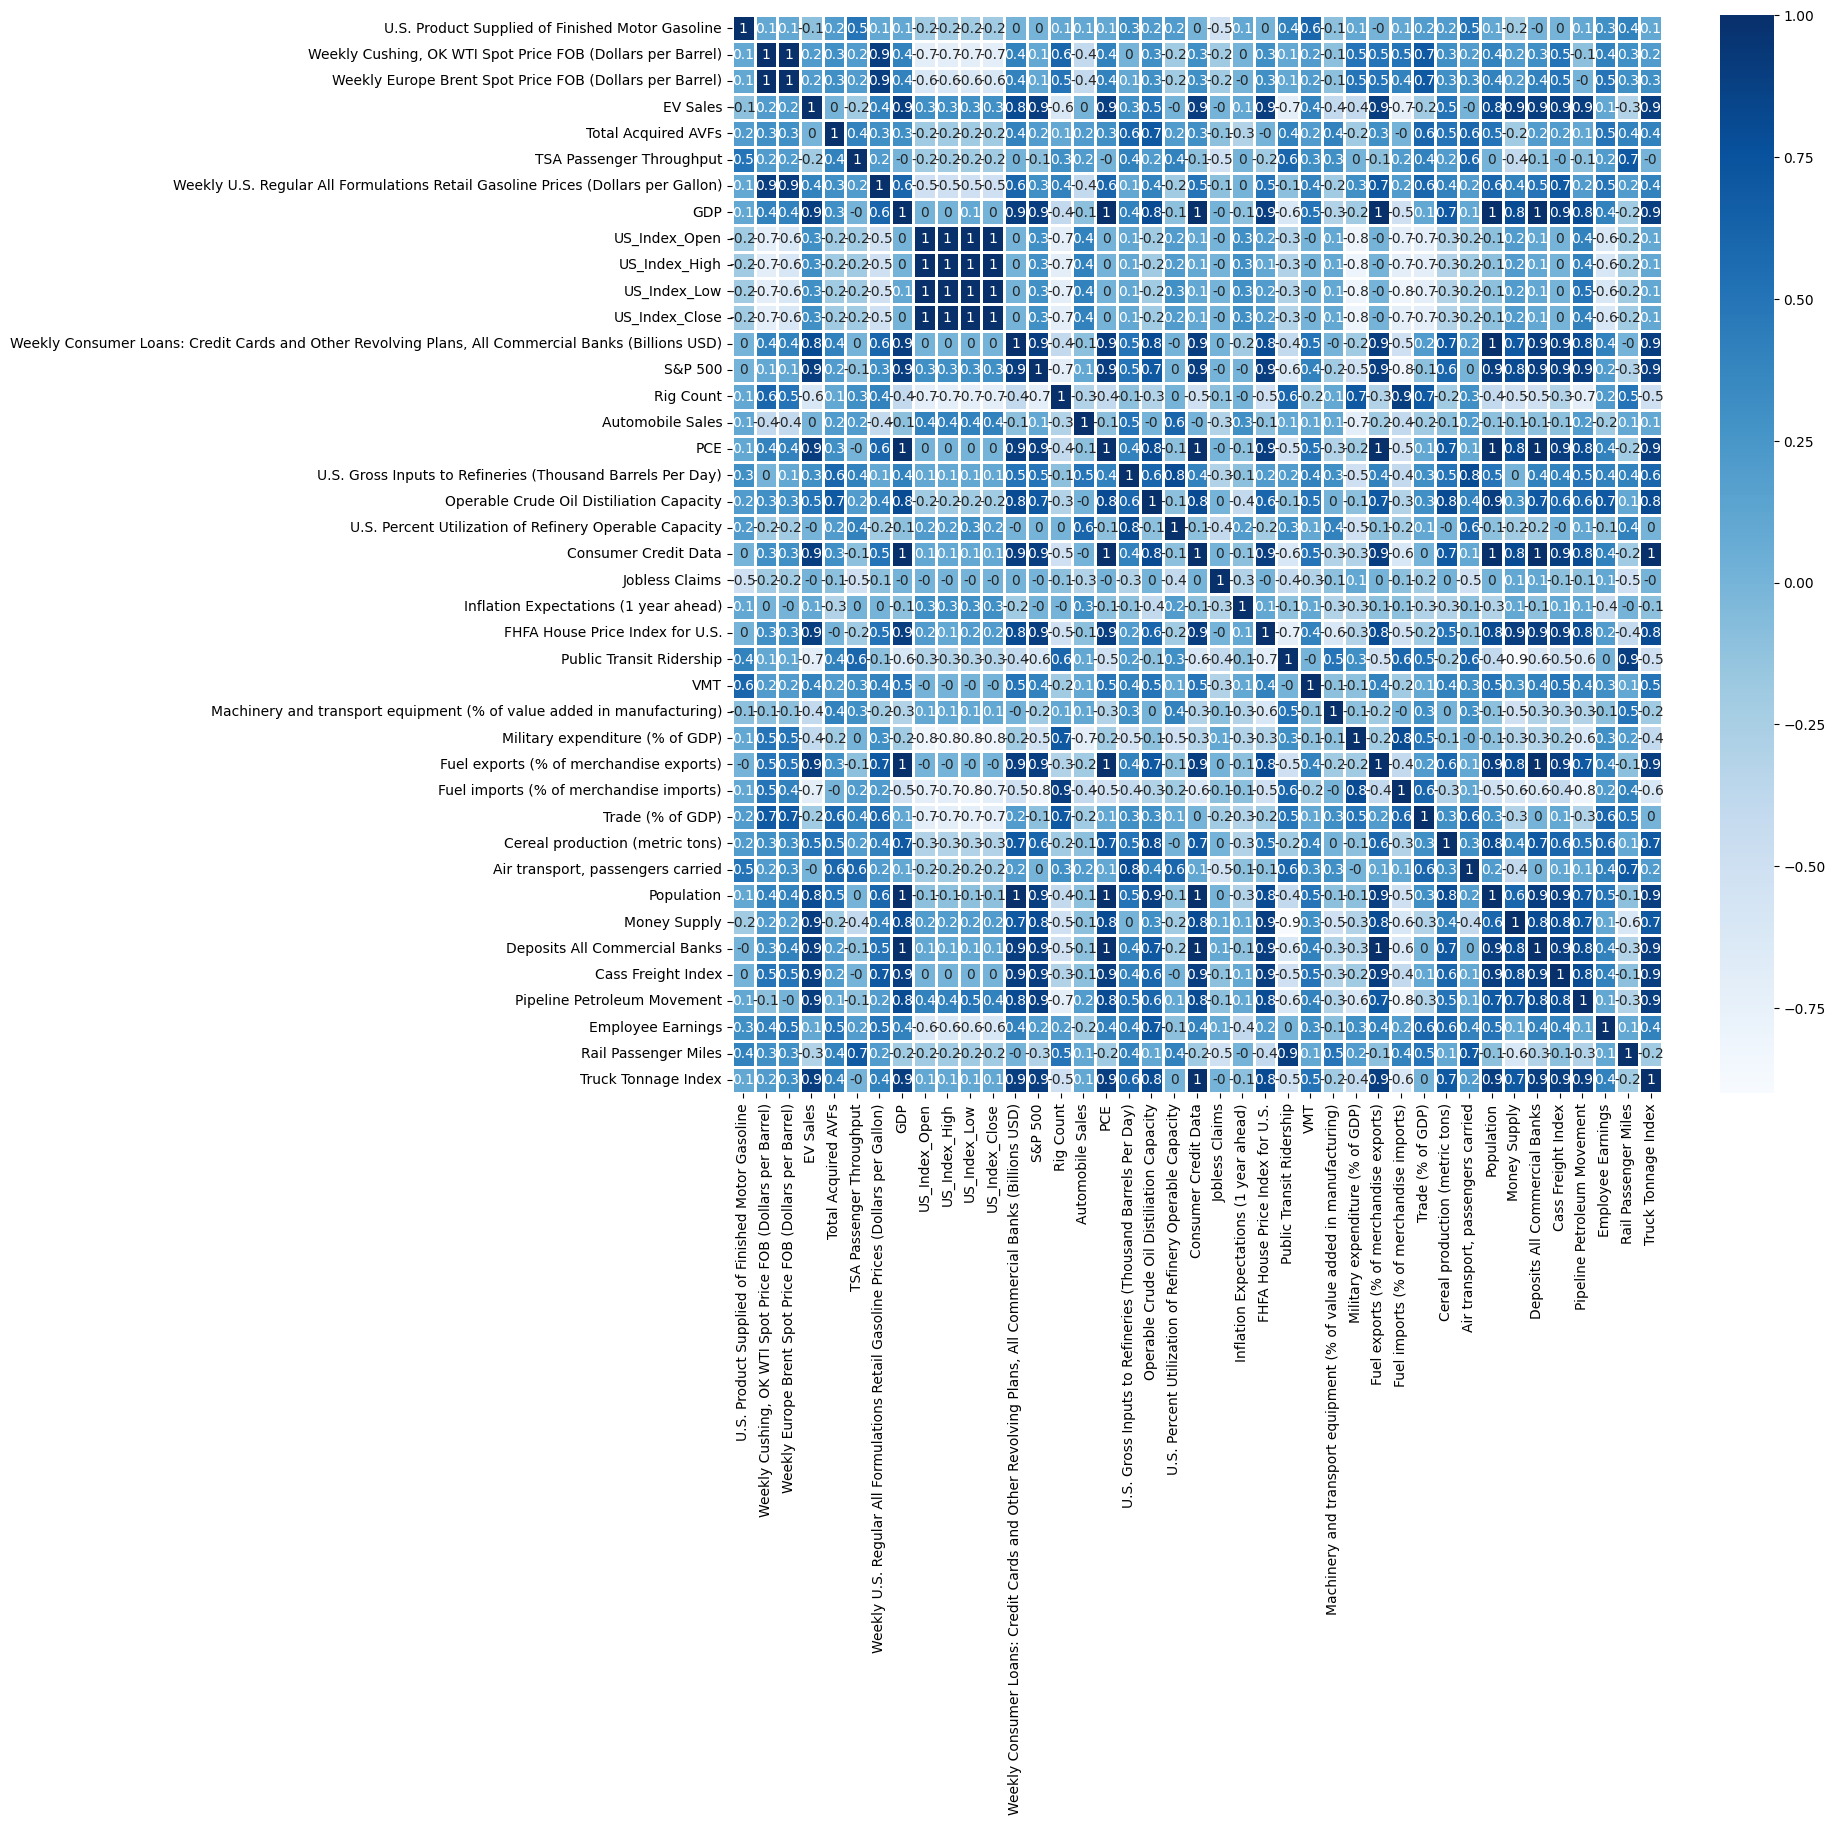

In [ ]:
plt.figure(figsize=(15,14))
# Heatmap to visualize correlation
sns.heatmap(round(submit.corr(),1),annot=True,cmap='Blues',linewidth=2)
plt.show();

In [ ]:
submit.corr()

<ipython-input-225-cf4bed7095ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  submit.corr()


,U.S. Product Supplied of Finished Motor Gasoline,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),EV Sales,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,US_Index_Open,US_Index_High,...,Cereal production (metric tons),"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index,Pipeline Petroleum Movement,Employee Earnings,Rail Passenger Miles,Truck Tonnage Index
U.S. Product Supplied of Finished Motor Gasoline,1.00,0.14,0.11,-0.06,0.17,0.50,0.13,0.05,-0.23,-0.23,...,0.20,0.47,0.08,-0.16,-0.02,0.04,0.06,0.28,0.37,0.08
"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",0.14,1.00,0.98,0.18,0.27,0.22,0.93,0.37,-0.66,-0.66,...,0.29,0.23,0.40,0.19,0.32,0.48,-0.08,0.45,0.31,0.22
Weekly Europe Brent Spot Price FOB (Dollars per Barrel),0.11,0.98,1.00,0.21,0.31,0.22,0.95,0.40,-0.64,-0.64,...,0.29,0.25,0.44,0.19,0.36,0.51,-0.05,0.45,0.33,0.26
EV Sales,-0.06,0.18,0.21,1.00,0.02,-0.18,0.41,0.92,0.29,0.28,...,0.49,-0.05,0.79,0.90,0.92,0.90,0.89,0.12,-0.33,0.87
Total Acquired AVFs,0.17,0.27,0.31,0.02,1.00,0.35,0.28,0.28,-0.20,-0.20,...,0.55,0.61,0.46,-0.20,0.24,0.21,0.11,0.48,0.42,0.39
TSA Passenger Throughput,0.50,0.22,0.22,-0.18,0.35,1.00,0.18,-0.04,-0.22,-0.22,...,0.19,0.63,0.03,-0.36,-0.13,-0.04,-0.09,0.23,0.67,-0.03
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),0.13,0.93,0.95,0.41,0.28,0.18,1.00,0.58,-0.51,-0.52,...,0.39,0.21,0.59,0.39,0.54,0.68,0.16,0.46,0.22,0.43
GDP,0.05,0.37,0.40,0.92,0.28,-0.04,0.58,1.00,0.04,0.04,...,0.69,0.10,0.96,0.80,0.99,0.94,0.82,0.39,-0.17,0.94
US_Index_Open,-0.23,-0.66,-0.64,0.29,-0.20,-0.22,-0.51,0.04,1.00,1.00,...,-0.27,-0.24,-0.10,0.24,0.07,0.03,0.45,-0.64,-0.24,0.12
US_Index_High,-0.23,-0.66,-0.64,0.28,-0.20,-0.22,-0.52,0.04,1.00,1.00,...,-0.27,-0.24,-0.11,0.24,0.07,0.03,0.44,-0.64,-0.24,0.11


In [ ]:
# Correlation of columns to target variable
correlations = submit.corr(method='pearson')
print(correlations['U.S. Product Supplied of Finished Motor Gasoline'].sort_values(ascending=False).to_string())

U.S. Product Supplied of Finished Motor Gasoline                                                      1.00
VMT                                                                                                   0.62
TSA Passenger Throughput                                                                              0.50
Air transport, passengers carried                                                                     0.47
Rail Passenger Miles                                                                                  0.37
Public Transit Ridership                                                                              0.36
U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)                                            0.31
Employee Earnings                                                                                     0.28
Operable Crude Oil Distiliation Capacity                                                              0.22
Cereal production (metric tons)      

<ipython-input-226-2206052f8404>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = submit.corr(method='pearson')


# 3. Data Models

In [ ]:
import random
random.seed(100)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Model Creation
from xgboost import XGBRegressor
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [ ]:
# Read in the complete dataset to build Data Models
complete_data = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/STAGE2_CLEANED_DATA.csv', parse_dates=['Date'],index_col='Date')
complete_data

,U.S. Product Supplied of Finished Motor Gasoline,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),EV Sales,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,US_Index_Open,US_Index_High,...,"Air transport, passengers carried",Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index,Pipeline Petroleum Movement,Total Construction Spending,Employee Earnings,Rail Passenger Miles,Truck Tonnage Index
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-07,7907,24.95,23.64,0.000000,269.288462,1.347885e+07,1.272,769.398385,100.49,100.93,...,1.279476e+07,70270.75,1199.4,3466.1881,1.481,53191.250000,196235.00,53650.089358,1.115235e+08,20.000000
2000-01-14,7543,26.27,24.34,0.000000,269.288462,1.347885e+07,1.264,769.398385,100.70,101.97,...,1.279476e+07,70270.75,1134.2,3473.1740,1.481,53191.250000,196235.00,53504.781439,1.115235e+08,20.000000
2000-01-21,7919,29.37,26.38,0.000000,269.288462,1.347885e+07,1.277,769.398385,101.75,102.11,...,1.279476e+07,70270.75,1122.9,3488.6908,1.481,53191.250000,196235.00,53372.729282,1.115235e+08,20.000000
2000-01-28,8385,28.34,26.99,0.000000,269.288462,1.347885e+07,1.315,769.398385,102.23,104.74,...,1.279476e+07,70270.75,1111.7,3489.7983,1.481,53191.250000,196235.00,53365.081226,1.115235e+08,20.000000
2000-02-04,7642,28.08,27.33,0.000000,269.288462,1.347885e+07,1.316,769.398385,104.45,105.36,...,1.279476e+07,70324.75,1108.7,3488.9251,1.408,56619.500000,198434.25,53485.863513,1.111149e+08,19.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,9321,82.50,87.57,13273.639230,147.487553,1.614697e+07,3.813,2054.639545,104.17,104.36,...,1.130190e+07,83918.75,18151.2,17281.5624,3.452,75948.865644,499131.25,76236.155622,8.294161e+07,28.648652
2023-09-08,8307,87.17,91.29,13312.391518,146.397954,1.565296e+07,3.807,2054.260392,104.26,105.16,...,1.128919e+07,83918.75,18222.1,17305.5106,3.452,75682.364075,499131.25,75948.865644,8.308540e+07,28.641524
2023-09-15,8410,89.14,93.87,13343.798247,145.538280,1.621602e+07,3.822,2055.814019,105.06,105.44,...,1.127594e+07,83918.75,18197.6,17296.2407,3.452,75633.959786,499131.25,75682.364075,8.319077e+07,28.643780


## 3.1. Prophet Model - `y_hat` Prediction

In [ ]:
df = complete_data.copy()
df.sort_values('Date', axis = 0, inplace = True)
df = df.reset_index()
df = df.rename(columns={'Date':'ds', 'U.S. Product Supplied of Finished Motor Gasoline':'y'})

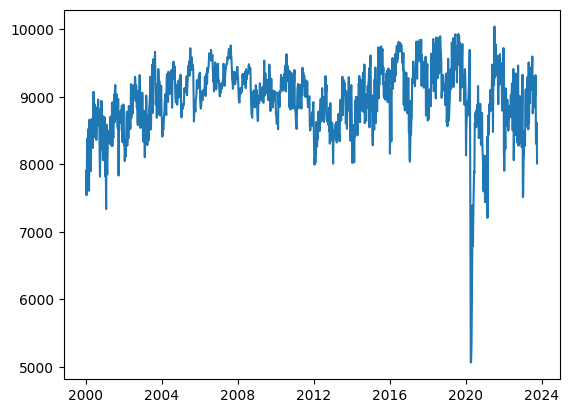

In [ ]:
plt.plot(df['ds'], df['y'])

The target value shows a relatively additive trend.

In [ ]:
prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive")

prophet_model.fit(df)
prophet_pred = prophet_model.predict(df) # Keep the dataset format
prophet_pred.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ehzy59a/m5zoru7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ehzy59a/tzyfynem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61117', 'data', 'file=/tmp/tmp5ehzy59a/m5zoru7d.json', 'init=/tmp/tmp5ehzy59a/tzyfynem.json', 'output', 'file=/tmp/tmp5ehzy59a/prophet_modelq3midv5s/prophet_model-20231213201823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-07,8378.573610,7206.622005,8687.298291,8378.573610,8378.573610,-480.567052,-480.567052,-480.567052,-480.567052,-480.567052,-480.567052,0.0,0.0,0.0,7898.006558
1,2000-01-14,8381.384295,7069.473259,8619.844871,8381.384295,8381.384295,-550.238093,-550.238093,-550.238093,-550.238093,-550.238093,-550.238093,0.0,0.0,0.0,7831.146203
2,2000-01-21,8384.194980,7223.944354,8655.437521,8384.194980,8384.194980,-464.051975,-464.051975,-464.051975,-464.051975,-464.051975,-464.051975,0.0,0.0,0.0,7920.143006
3,2000-01-28,8387.005666,7305.981928,8762.996874,8387.005666,8387.005666,-353.960008,-353.960008,-353.960008,-353.960008,-353.960008,-353.960008,0.0,0.0,0.0,8033.045657
4,2000-02-04,8389.816351,7295.338655,8784.154310,8389.816351,8389.816351,-318.174821,-318.174821,-318.174821,-318.174821,-318.174821,-318.174821,0.0,0.0,0.0,8071.641530


In [ ]:
df['yhat'] = prophet_pred['yhat']
df

,ds,y,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),EV Sales,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,US_Index_Open,...,Population,Money Supply,Deposits All Commercial Banks,Cass Freight Index,Pipeline Petroleum Movement,Total Construction Spending,Employee Earnings,Rail Passenger Miles,Truck Tonnage Index,yhat
0,2000-01-07,7907,24.95,23.64,0.000000,269.288462,1.347885e+07,1.272,769.398385,100.49,...,70270.75,1199.4,3466.1881,1.481,53191.250000,196235.00,53650.089358,1.115235e+08,20.000000,7898.006558
1,2000-01-14,7543,26.27,24.34,0.000000,269.288462,1.347885e+07,1.264,769.398385,100.70,...,70270.75,1134.2,3473.1740,1.481,53191.250000,196235.00,53504.781439,1.115235e+08,20.000000,7831.146203
2,2000-01-21,7919,29.37,26.38,0.000000,269.288462,1.347885e+07,1.277,769.398385,101.75,...,70270.75,1122.9,3488.6908,1.481,53191.250000,196235.00,53372.729282,1.115235e+08,20.000000,7920.143006
3,2000-01-28,8385,28.34,26.99,0.000000,269.288462,1.347885e+07,1.315,769.398385,102.23,...,70270.75,1111.7,3489.7983,1.481,53191.250000,196235.00,53365.081226,1.115235e+08,20.000000,8033.045657
4,2000-02-04,7642,28.08,27.33,0.000000,269.288462,1.347885e+07,1.316,769.398385,104.45,...,70324.75,1108.7,3488.9251,1.408,56619.500000,198434.25,53485.863513,1.111149e+08,19.625000,8071.641530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2023-09-01,9321,82.50,87.57,13273.639230,147.487553,1.614697e+07,3.813,2054.639545,104.17,...,83918.75,18151.2,17281.5624,3.452,75948.865644,499131.25,76236.155622,8.294161e+07,28.648652,8811.901188
1235,2023-09-08,8307,87.17,91.29,13312.391518,146.397954,1.565296e+07,3.807,2054.260392,104.26,...,83918.75,18222.1,17305.5106,3.452,75682.364075,499131.25,75948.865644,8.308540e+07,28.641524,8670.630567
1236,2023-09-15,8410,89.14,93.87,13343.798247,145.538280,1.621602e+07,3.822,2055.814019,105.06,...,83918.75,18197.6,17296.2407,3.452,75633.959786,499131.25,75682.364075,8.319077e+07,28.643780,8536.080903
1237,2023-09-22,8619,90.28,94.86,13349.951773,144.856226,1.662263e+07,3.878,2060.087094,105.30,...,83918.75,18155.1,17344.7799,3.452,75873.683284,499131.25,75633.959786,8.320036e+07,28.648387,8476.750701


## 3.2. Add a Month Column & OneHotEncoder transformation

In [ ]:
df['Month'] = df['ds'].dt.strftime('%B')
# df['Day'] = df['ds'].dt.strftime('%d').astype(int)

# One Hot Encoder for the month (categorical) column
onehot = OneHotEncoder(use_cat_names=True)
onehot_fit = onehot.fit(df)
df_transform = onehot.transform(df)
df_transform.head()

,ds,y,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),EV Sales,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,US_Index_Open,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
0,2000-01-07,7907,24.95,23.64,0.0,269.288462,1.347885e+07,1.272,769.398385,100.49,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-14,7543,26.27,24.34,0.0,269.288462,1.347885e+07,1.264,769.398385,100.70,...,0,0,0,0,0,0,0,0,0,0
2,2000-01-21,7919,29.37,26.38,0.0,269.288462,1.347885e+07,1.277,769.398385,101.75,...,0,0,0,0,0,0,0,0,0,0
3,2000-01-28,8385,28.34,26.99,0.0,269.288462,1.347885e+07,1.315,769.398385,102.23,...,0,0,0,0,0,0,0,0,0,0
4,2000-02-04,7642,28.08,27.33,0.0,269.288462,1.347885e+07,1.316,769.398385,104.45,...,0,0,0,0,0,0,0,0,0,0


## 3.3. Train & Test - Data Splitting
- Split the data so that the test dataset has 1 year of data.
- The cutoff point is 2022-09-29.

In [ ]:
df_train, df_test = df_transform[df_transform['ds'] < '2022-09-29'].drop('ds', axis=1), df_transform[df_transform['ds'] >= '2022-09-29'].drop('ds', axis=1)

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 1186
Test:	 53


In [ ]:
X_train_yhat = df_train.drop('y', axis=1)
X_train = df_train.drop(['y', 'yhat'], axis=1)
y_train = df_train[['y']]

X_test_yhat = df_test.drop('y', axis=1)
X_test = df_test.drop(['y', 'yhat'], axis=1)
y_test = df_test[['y']]

## 3.4. Baselines

In [ ]:
# Assign variables for baselines and calculate baselines
y_pred = [y_train.mean()]*len(y_train)
mean_baseline_pred = y_train.mean()
baseline_mae = mean_absolute_error(y_train,y_pred)
baseline_rmse = mean_squared_error(y_train,y_pred,squared=False)

# Print statement to show all baseline values
print('Mean Gasoline Supply Baseline Pred:', mean_baseline_pred)
print('-------------------------------------------------------------------')
print('Baseline Mae:',baseline_mae)
print('-------------------------------------------------------------------')
print('Baseline RMSE:',baseline_rmse)

Mean Gasoline Supply Baseline Pred: y    8970.047218
dtype: float64
-------------------------------------------------------------------
Baseline Mae: 366.72709434691984
-------------------------------------------------------------------
Baseline RMSE: 503.41177576908456


In [ ]:
# Def to check model metrics of baseline performance
def check_metrics(model, X_train, y_train, X_test, y_test):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(X_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(X_test)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(X_test,y_test))
    print('===================================================================')


## 3.4. Random Forest - without `y_hat`

# New Section

In [ ]:
#assigning model variables
model_rfr = RandomForestRegressor()

# Fitting models
model_rfr.fit(X_train,y_train)

check_metrics(model_rfr, X_train, y_train, X_test, y_test)


<ipython-input-16-5c67d2587c63>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfr.fit(X_train,y_train)


RandomForestRegressor()
Training MAE: 67.78736930860033
-------------------------------------------------------------------
Validation MAE: 363.11660377358487
-------------------------------------------------------------------
Validation R2 score: 0.09677266355399872


In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_rfr_without = make_pipeline(#OneHotEncoder(),
                           # SimpleImputer(), removing simpleimputer helped with training mae bc we don't have any na values
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=-1)) #removed random parameters from within the initial model bc we are splitting by time

# Params for RandomSearch
pramajams = {#'simpleimputer__strategy':['mean','median','most_frequent'],
             'randomforestregressor__max_depth':range(1,10,5),
             'randomforestregressor__n_estimators':range(25,200,5),
             'randomforestregressor__max_samples':np.arange(1,100,1),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(2,6,1)}

# RandomSearch Model
model_rs_rfr_without = RandomizedSearchCV(pipe_rs_rfr_without,
                                  param_distributions=pramajams,
                                  n_iter=25, #when n_iter is lower, the r score is negative but mae are lower, opposite for larger, 25 was good middle?
                                  n_jobs=-1,
                                  cv = 5)

# Model fit
model_rs_rfr_without.fit(X_train,y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_rfr_without.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_rfr_without.predict(X_test)))
print('-------------------------------------------------------------------')
print('R2 score:', model_rs_rfr_without.score(X_test,y_test))
print('===================================================================')
model_rs_rfr_without.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Training MAE: 223.36519979527623
-------------------------------------------------------------------
Validation MAE: 358.4137424990775
-------------------------------------------------------------------
R2 score: 0.13208862288707135


{'randomforestregressor__n_estimators': 145,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__max_samples': 70,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__max_depth': 6}

## 3.5. Boosting - without `y_hat`

In [ ]:
# Assigning model variables
model_xgb_without_yhat = XGBRegressor()

# Fitting models
model_xgb_without_yhat.fit(X_train,y_train)

check_metrics(model_xgb_without_yhat, X_train, y_train, X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training MAE: 23.400257232820405
-------------------------------------------------------------------
Validation MAE: 503.9171764445755
-------------------------------------------------------------------
Validation R2 score: -0.9941986999068357


In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb_without_yhat = make_pipeline(XGBRegressor(random_state=100,
                                         n_jobs=-1))

# Params for RandomSearch
paramajama_xgb_without_yhat = {'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,22,1),
              'xgbregressor__gamma':np.arange(0,3,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,2,0.1)}

# RandomSearch Model
model_rs_xgbr_without_yhat = RandomizedSearchCV(pipe_rs_xgb_without_yhat,
                                   param_distributions = paramajama_xgb_without_yhat,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_without_yhat.fit(X_train,y_train)

# Check model metrics
check_metrics(model_rs_xgbr_without_yhat, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost

RandomizedSearchCV(estimator=Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=No

<Axes: title={'center': 'XGBoost Variable Importance'}>

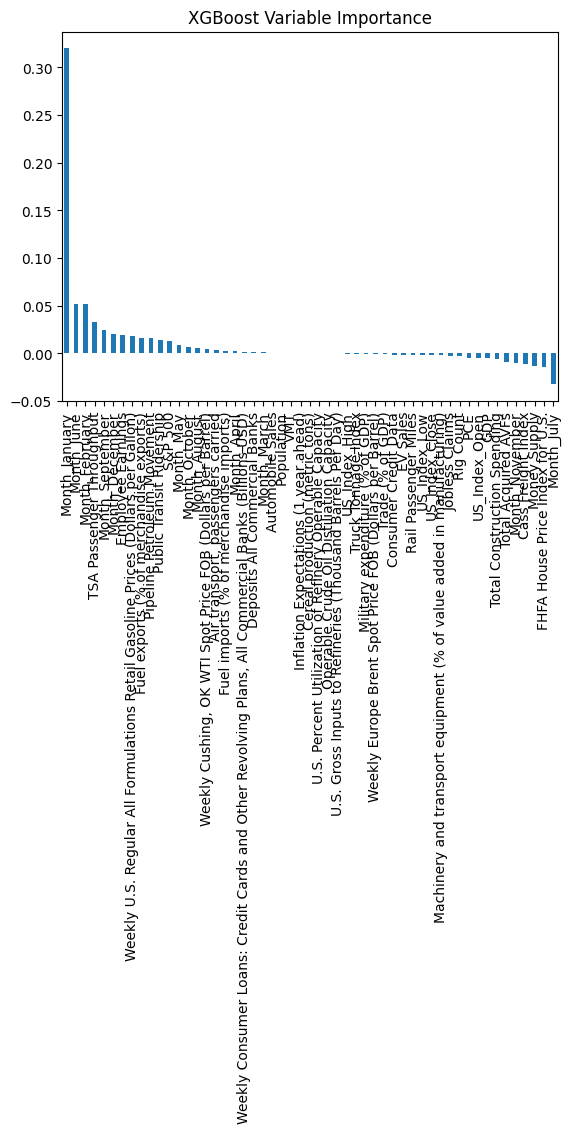

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr_without_yhat, X_test, y_test,
                          n_repeats=30,
                         random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_test)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance")

## 3.6. Random Forest - with `y_hat`

In [ ]:
# Assigning model variables
model_rfr_yhat = RandomForestRegressor()

# Fitting models
model_rfr_yhat.fit(X_train_yhat,y_train)

check_metrics(model_rfr_yhat, X_train_yhat, y_train, X_test_yhat, y_test)

<ipython-input-21-8d14f0b6b9be>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfr_yhat.fit(X_train_yhat,y_train)


RandomForestRegressor()
Training MAE: 65.77243676222596
-------------------------------------------------------------------
Validation MAE: 487.2230188679244
-------------------------------------------------------------------
Validation R2 score: -0.9250125441633474


In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_rfr = make_pipeline(#OneHotEncoder(),
                           # SimpleImputer(), removing simpleimputer helped with training mae bc we don't have any na values
                            RandomForestRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
pramajams = {#'simpleimputer__strategy':['mean','median','most_frequent'],
             'randomforestregressor__max_depth':range(12,34,2), #made slight adjustements to all parameters through lowering step size and range around the best paramaters results
             'randomforestregressor__n_estimators':range(80,230,10),
             'randomforestregressor__max_samples':np.arange(20,120,2),
             'randomforestregressor__max_features':['sqrt','log2'],
             'randomforestregressor__min_samples_split':np.arange(3,6,1)}

# RandomSearch Model
model_rs_rfr = RandomizedSearchCV(pipe_rs_rfr,
                                  param_distributions=pramajams,
                                  n_iter=25, #when n_iter is lower, the r score is negative but mae are lower, opposite for larger, 25 was good middle?
                                  n_jobs=-1)

# Model fit
model_rs_rfr.fit(X_train_yhat,y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_rfr.predict(X_train_yhat)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_rfr.predict(X_test_yhat)))
print('-------------------------------------------------------------------')
print('R2 score:', model_rs_rfr.score(X_test_yhat,y_test))
print('===================================================================')
model_rs_rfr.best_params_

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_rfr, X_test_yhat, y_test,
                         n_repeats=30,
                         random_state=42
                         )
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_test_yhat)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
rfr_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="Random Forest Variable Importance")

## 3.7. Boosting - with `y_hat`

In [ ]:
# Assigning model variables
model_xgbr_yhat =XGBRegressor()

# Fitting models
model_xgbr_yhat.fit(X_train_yhat, y_train)

check_metrics(model_xgbr_yhat, X_train_yhat, y_train, X_test_yhat, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training MAE: 25.071757993649875
-------------------------------------------------------------------
Validation MAE: 833.6165057488207
-------------------------------------------------------------------
Validation R2 score: -6.675437710642932


### 3.7.2. XGB RandomSearch

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr = RandomizedSearchCV(pipe_rs_xgb,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr.fit(X_train_yhat,y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_xgbr.predict(X_train_yhat)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr.predict(X_test_yhat)))
print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr.score(X_train_yhat,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', model_rs_xgbr.score(X_test_yhat,y_test))
print('===================================================================')
model_rs_xgbr.best_params_

Training MAE: 197.7163781717696
-------------------------------------------------------------------
Validation MAE: 331.4837853773585
-------------------------------------------------------------------
R2 score - train: 0.7343307638120371
-------------------------------------------------------------------
R2 score - test: 0.30242280055409343


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

{'xgbregressor__subsample': 1.4000000000000004,
 'xgbregressor__min_child_weight': 4,
 'xgbregressor__max_depth': 10,
 'xgbregressor__max_delta_step': 0.8000000000000003,
 'xgbregressor__learning_rate': 0.9500000000000002,
 'xgbregressor__gamma': 1.9500000000000008,
 'xgbregressor__booster': 'gblinear'}

<Axes: title={'center': 'XGBoost Variable Importance'}>

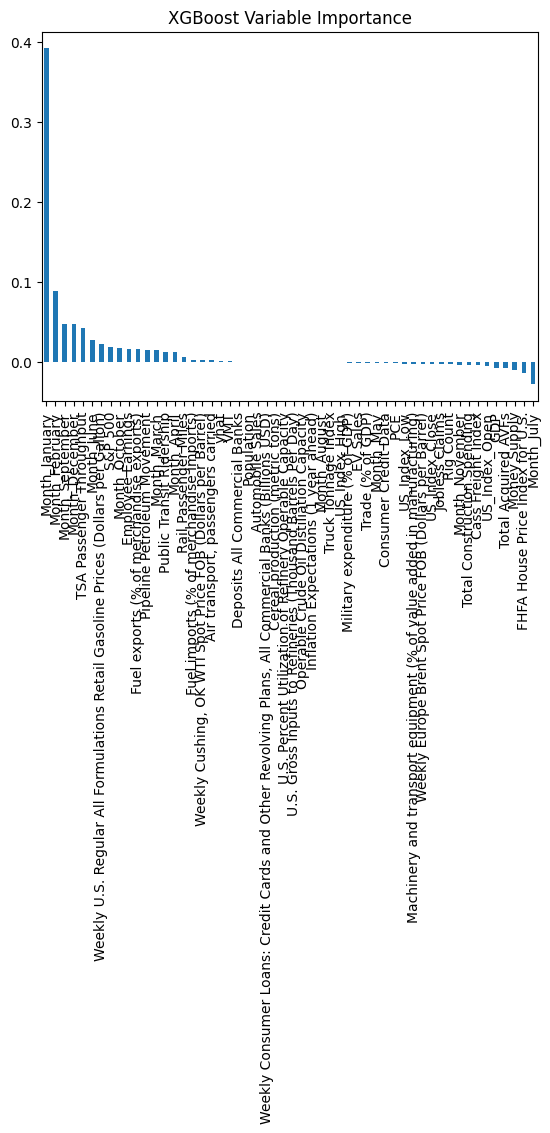

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr, X_test_yhat, y_test,
                          n_repeats=30,
                         random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_test_yhat)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance")

In [ ]:
XGBoost_importance

Month_January                                                                                         0.391758
Month_February                                                                                        0.088733
Month_September                                                                                       0.048065
Month_December                                                                                        0.047704
TSA Passenger Throughput                                                                              0.042121
Month_June                                                                                            0.028058
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                      0.022094
S&P 500                                                                                               0.018439
Month_October                                                                                         0.017371
E

### Remove unimportant variables

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb_1 = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr_1 = RandomizedSearchCV(pipe_rs_xgb_1,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_1.fit(X_train_yhat.drop(['Money Supply', 'FHFA House Price Index for U.S.', 'Month_July'], axis=1),y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_xgbr_1.predict(X_train_yhat.drop(['Money Supply', 'FHFA House Price Index for U.S.', 'Month_July'], axis=1))))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr_1.predict(X_test_yhat.drop(['Money Supply', 'FHFA House Price Index for U.S.', 'Month_July'], axis=1))))
print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr_1.score(X_train_yhat.drop(['Money Supply', 'FHFA House Price Index for U.S.', 'Month_July'], axis=1), y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', model_rs_xgbr_1.score(X_test_yhat.drop(['Money Supply', 'FHFA House Price Index for U.S.', 'Month_July'], axis=1), y_test))
print('===================================================================')
model_rs_xgbr_1.best_params_

Training MAE: 202.58825374815555
-------------------------------------------------------------------
Validation MAE: 327.4844487028302
-------------------------------------------------------------------
R2 score - train: 0.7243749740497001
-------------------------------------------------------------------
R2 score - test: 0.2720681911321009


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

{'xgbregressor__subsample': 1.0,
 'xgbregressor__min_child_weight': 4,
 'xgbregressor__max_depth': 18,
 'xgbregressor__max_delta_step': 0.5,
 'xgbregressor__learning_rate': 0.9500000000000002,
 'xgbregressor__gamma': 1.9500000000000008,
 'xgbregressor__booster': 'gblinear'}

In [ ]:
# Cass Freight Index                                                                                   -0.013443
# News Based Policy Uncertainty Index                                                                  -0.024210
# Month_July                                                                                           -0.028136

In [ ]:
# X_all = pd.merge(X_train_yhat, X_test_yhat)
# X_all
X_all = X_train_yhat.append(X_test_yhat, ignore_index=True)
y_all = y_train.append(y_test , ignore_index=True)
X_all

<ipython-input-39-9365074f6db5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_all = X_train_yhat.append(X_test_yhat, ignore_index=True)
<ipython-input-39-9365074f6db5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_all = y_train.append(y_test , ignore_index=True)


,"Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly Europe Brent Spot Price FOB (Dollars per Barrel),EV Sales,Total Acquired AVFs,TSA Passenger Throughput,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),GDP,US_Index_Open,US_Index_High,US_Index_Low,...,Month_March,Month_April,Month_May,Month_June,Month_July,Month_August,Month_September,Month_October,Month_November,Month_December
0,24.95,23.64,0.000000,269.288462,1.347885e+07,1.272,769.398385,100.49,100.93,100.44,...,0,0,0,0,0,0,0,0,0,0
1,26.27,24.34,0.000000,269.288462,1.347885e+07,1.264,769.398385,100.70,101.97,100.24,...,0,0,0,0,0,0,0,0,0,0
2,29.37,26.38,0.000000,269.288462,1.347885e+07,1.277,769.398385,101.75,102.11,101.12,...,0,0,0,0,0,0,0,0,0,0
3,28.34,26.99,0.000000,269.288462,1.347885e+07,1.315,769.398385,102.23,104.74,101.84,...,0,0,0,0,0,0,0,0,0,0
4,28.08,27.33,0.000000,269.288462,1.347885e+07,1.316,769.398385,104.45,105.36,103.42,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,82.50,87.57,13273.639230,147.487553,1.614697e+07,3.813,2054.639545,104.17,104.36,102.94,...,0,0,0,0,0,0,1,0,0,0
1235,87.17,91.29,13312.391518,146.397954,1.565296e+07,3.807,2054.260392,104.26,105.16,104.03,...,0,0,0,0,0,0,1,0,0,0
1236,89.14,93.87,13343.798247,145.538280,1.621602e+07,3.822,2055.814019,105.06,105.44,104.42,...,0,0,0,0,0,0,1,0,0,0
1237,90.28,94.86,13349.951773,144.856226,1.662263e+07,3.878,2060.087094,105.30,105.78,104.67,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr, X_all, y_all,
                          n_repeats=30,
                         random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_all)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
overall_XGBoost_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance - Overall")

NameError: ignored

In [ ]:
overall_XGBoost_importance

Jobless Claims                                                                                        0.525788
Money Supply                                                                                          0.424055
Fuel exports (% of merchandise exports)                                                               0.316750
Month_January                                                                                         0.249219
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                               0.159520
Month_February                                                                                        0.114411
Fuel imports (% of merchandise imports)                                                               0.113204
Deposits All Commercial Banks                                                                         0.077511
EV Sales                                                                                              0.070273
C

BEST MODEL!

In [ ]:
# Pipeline variable
pipe_xgb_trial = make_pipeline(XGBRegressor(
    max_depth=10,
    learning_rate=0.8,
    booster='gblinear',
    min_child_weight=4,
    gamma=1.5000000000000004,
    max_delta_step=0.55,
    subsample=1,
    random_state=100,
    n_jobs=-1
))

# Model fit
pipe_xgb_trial.fit(X_train_yhat, y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train, pipe_xgb_trial.predict(X_train_yhat)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test, pipe_xgb_trial.predict(X_test_yhat)))
print('R2 score - train:', pipe_xgb_trial.score(X_train_yhat,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', pipe_xgb_trial.score(X_test_yhat,y_test))
print('===================================================================')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:38:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "gamma", "max_delta_step", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Training MAE: 198.5062525525664
-------------------------------------------------------------------
Validation MAE: 328.8053508254717
R2 score - train: 0.7309975308557499
-------------------------------------------------------------------
R2 score - test: 0.314019576450555


<Axes: title={'center': 'XGBoost Variable Importance'}>

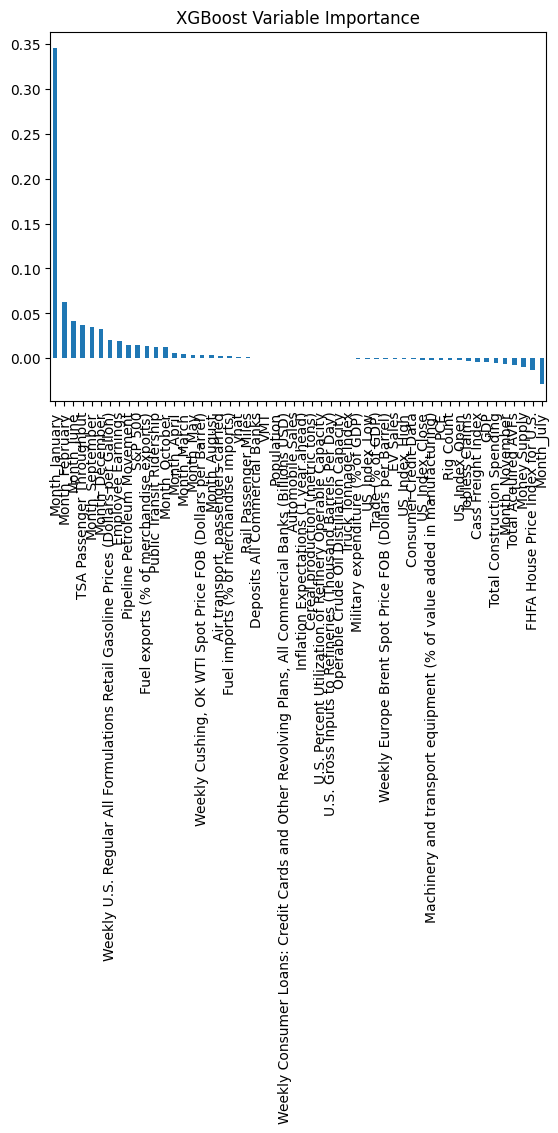

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(pipe_xgb_trial, X_test_yhat, y_test,
                          n_repeats=30,
                         random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_test_yhat)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance")

In [ ]:
XGBoost_importance

Month_January                                                                                         3.453273e-01
Month_February                                                                                        6.248583e-02
Month_June                                                                                            4.139925e-02
TSA Passenger Throughput                                                                              3.724539e-02
Month_September                                                                                       3.505439e-02
Month_December                                                                                        3.228563e-02
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                      1.980545e-02
Employee Earnings                                                                                     1.947055e-02
Pipeline Petroleum Movement                                                     

In [ ]:
# Pipeline variable
pipe_xgb_trial = make_pipeline(XGBRegressor(
    max_depth=10,
    learning_rate=0.8,
    booster='gblinear',
    min_child_weight=4,
    gamma=1.5000000000000004,
    max_delta_step=0.5,
    subsample=1,
    random_state=100,
    n_jobs=-1
))

# Model fit
pipe_xgb_trial.fit(X_train_yhat, y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train, pipe_xgb_trial.predict(X_train_yhat)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test, pipe_xgb_trial.predict(X_test_yhat)))
print('R2 score - train:', pipe_xgb_trial.score(X_train_yhat,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', pipe_xgb_trial.score(X_test_yhat,y_test))
print('===================================================================')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:06:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "gamma", "max_delta_step", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Training MAE: 198.6140243761857
-------------------------------------------------------------------
Validation MAE: 329.13155955188677
R2 score - train: 0.7307320629192249
-------------------------------------------------------------------
R2 score - test: 0.3145978025571782


Remove the variable from modeling:
- Rail Passenger Miles 0.005776
- Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel) 0.003276
- Fuel imports (% of merchandise imports) 0.003251
- Air transport, passengers carried 0.003178
- VMT 0.002447
- Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)    0.001609
- yhat 0.001319
- US_Index_High 0.000998
- Deposits All Commercial Banks 0.000928
- Automobile Sales 0.000653
- Population 0.000611
- Cereal production (metric tons) 0.000238
- EV Sales 0.000237
- U.S. Gross Inputs to Refineries (Thousand Barrels Per Day) 0.000131
- Operable Crude Oil Distiliation Capacity 0.000101
- U.S. Percent Utilization of Refinery Operable Capacity 000083
- Inflation Expectations (1 year ahead) 0.000007
- Truck Tonnage Index -0.000138
- Month_August -0.000207
- Military expenditure (% of GDP) -0.000594
- Month_May -0.000773
- US_Index_Close -0.000989
- Consumer Credit Data -0.001292
- Trade (% of GDP)-0.001624
- PCE -0.001866
- Machinery and transport equipment (% of value added in manufacturing) -0.002011
- US_Index_Low -0.002624
- Jobless Claims -0.002776
- Total Construction Spending -0.002916
- Rig Count -0.003028
- Weekly Europe Brent Spot Price FOB (Dollars per Barrel) 003334
- US_Index_Open -0.004975
- Month_November -0.005585
- Cass Freight Index -0.005842

In [ ]:
important_var = XGBoost_importance.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
important_var.head()

,Variable,Importance
0,Month_January,0.392010
1,Month_February,0.089353
2,Month_September,0.047746
3,TSA Passenger Throughput,0.045137
4,Month_December,0.044889


In [ ]:
not_import_var = important_var[abs(important_var['Importance'])<0.001]['Variable'].to_list()
not_import_var

['US_Index_High',
 'Deposits All Commercial Banks',
 'Automobile Sales',
 'Population',
 'Cereal production (metric tons)',
 'EV Sales',
 'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)',
 'Operable Crude Oil Distiliation Capacity',
 'U.S. Percent Utilization of Refinery Operable Capacity',
 'Inflation Expectations (1 year ahead)',
 'Truck Tonnage Index',
 'Month_August',
 'Military expenditure (% of GDP)',
 'Month_May',
 'US_Index_Close']

In [ ]:
X_train_yhat_trial = X_train_yhat.drop(not_import_var, axis=1)
X_test_yhat_trial = X_test_yhat.drop(not_import_var, axis=1)
X_train_yhat_trial

NameError: ignored

In [ ]:
# Pipeline variable
pipe_xgb_trial = make_pipeline(XGBRegressor(
    max_depth=10,
    learning_rate=0.8,
    booster='gblinear',
    min_child_weight=4,
    gamma=1.5000000000000004,
    max_delta_step=0.5,
    subsample=1,
    random_state=100,
    n_jobs=-1
))

# Model fit
pipe_xgb_trial.fit(X_train_yhat_trial, y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train, pipe_xgb_trial.predict(X_train_yhat_trial)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test, pipe_xgb_trial.predict(X_test_yhat_trial)))
print('R2 score - train:', pipe_xgb_trial.score(X_train_yhat_trial,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', pipe_xgb_trial.score(X_test_yhat_trial,y_test))
print('===================================================================')

NameError: ignored

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr = RandomizedSearchCV(pipe_rs_xgb,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr.fit(X_train_yhat_trial,y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_xgbr.predict(X_train_yhat_trial)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr.predict(X_test_yhat_trial)))
print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr.score(X_train_yhat_trial,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', model_rs_xgbr.score(X_test_yhat_trial,y_test))
print('===================================================================')
model_rs_xgbr.best_params_

Training MAE: 204.75014491989882
-------------------------------------------------------------------
Validation MAE: 335.98415389150944
-------------------------------------------------------------------
R2 score - train: 0.7190935523233204
-------------------------------------------------------------------
R2 score - test: 0.24969359128067703


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

{'xgbregressor__subsample': 1.2500000000000002,
 'xgbregressor__min_child_weight': 5,
 'xgbregressor__max_depth': 17,
 'xgbregressor__max_delta_step': 0.9500000000000004,
 'xgbregressor__learning_rate': 0.9500000000000002,
 'xgbregressor__gamma': 1.3500000000000003,
 'xgbregressor__booster': 'gblinear'}

See if there are differences in the important variables for different time frame.

In [ ]:
# # complete_data.reset_index()
# complete_data['Month'] = complete_data['Date'].dt.strftime('%B')

# # One Hot Encoder for the month (categorical) column
# onehot = OneHotEncoder(use_cat_names=True)
# onehot_fit = onehot.fit(complete_data)
# complete_data_transform = onehot.transform(complete_data)
# complete_data_transform.head()


In [ ]:
df_transform.columns

Index(['ds', 'y', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)', 'EV Sales',
       'Total Acquired AVFs', 'TSA Passenger Throughput',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'GDP', 'US_Index_Open', 'US_Index_High', 'US_Index_Low',
       'US_Index_Close',
       'Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)',
       'S&P 500', 'Rig Count', 'Automobile Sales', 'PCE',
       'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)',
       'Operable Crude Oil Distiliation Capacity',
       'U.S. Percent Utilization of Refinery Operable Capacity',
       'Consumer Credit Data', 'Jobless Claims',
       'Inflation Expectations (1 year ahead)',
       'FHFA House Price Index for U.S.', 'Public Transit Ridership', 'VMT',
       'Machinery and transport equipment (% of value added in manufacturing)'

In [ ]:
data_2000_2010 = df_transform[df_transform['ds']<'2011-01-01']
data_2011_2020 = df_transform[(df_transform['ds']>='2011-01-01') & (df_transform['ds']<='2020-01-01')]
data_2021_2023 = df_transform[df_transform['ds']>='2021-01-01']

In [ ]:
data_2000_2010_X = data_2000_2010.drop(['y', 'ds'], axis=1)
data_2000_2010_y = data_2000_2010['y']
data_2011_2020_X = data_2011_2020.drop(['y', 'ds'], axis=1)
data_2011_2020_y = data_2011_2020['y']
data_2021_2023_X = data_2021_2023.drop(['y', 'ds'], axis=1)
data_2021_2023_y = data_2021_2023['y']

Year 2000-2010

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr_2000_2010 = RandomizedSearchCV(pipe_rs_xgb,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_2000_2010.fit(data_2000_2010_X,data_2000_2010_y)

# Check model metrics
print('Training MAE:', mean_absolute_error(data_2000_2010_y,model_rs_xgbr_2000_2010.predict(data_2000_2010_X)))
print('-------------------------------------------------------------------')
# print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr.predict(X_test_yhat)))
# print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr_2000_2010.score(data_2000_2010_X,data_2000_2010_y))
print('-------------------------------------------------------------------')
# print('R2 score - test:', model_rs_xgbr.score(X_test_yhat,y_test))
# print('===================================================================')
model_rs_xgbr_2000_2010.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

Training MAE: 148.01221979121297
-------------------------------------------------------------------
R2 score - train: 0.7604239716825983
-------------------------------------------------------------------


{'xgbregressor__subsample': 1.1500000000000001,
 'xgbregressor__min_child_weight': 4,
 'xgbregressor__max_depth': 10,
 'xgbregressor__max_delta_step': 0.8500000000000003,
 'xgbregressor__learning_rate': 0.9500000000000002,
 'xgbregressor__gamma': 1.7000000000000006,
 'xgbregressor__booster': 'gblinear'}

<Axes: title={'center': 'XGBoost Variable Importance: Year 2000-2010'}>

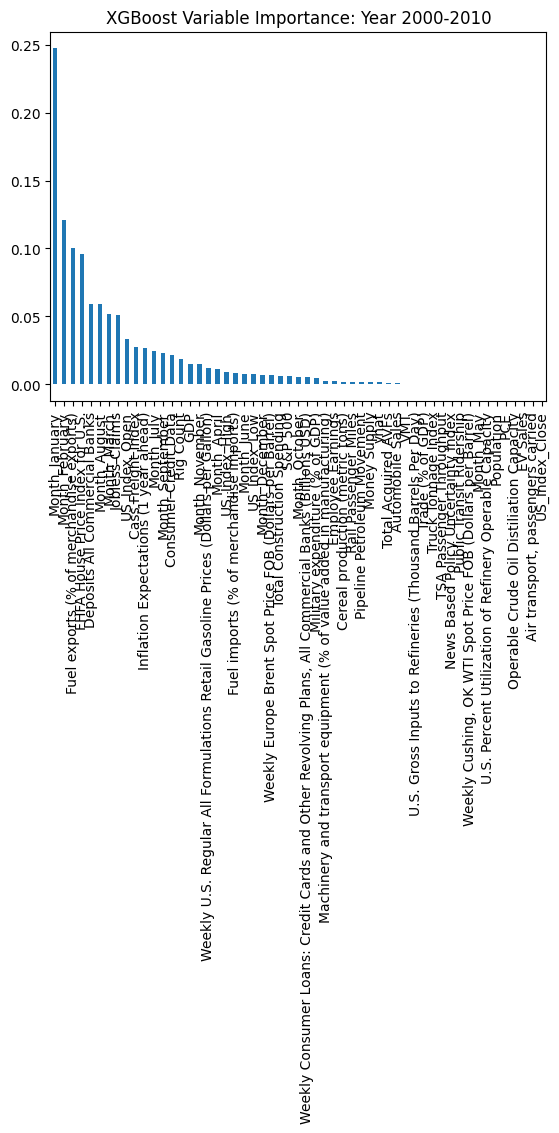

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr_2000_2010, data_2000_2010_X,data_2000_2010_y,
                                n_repeats=30,
                                random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(data_2000_2010_X)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance_2000_2010 = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance: Year 2000-2010")

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr_2011_2020 = RandomizedSearchCV(pipe_rs_xgb,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_2011_2020.fit(data_2011_2020_X,data_2011_2020_y)

# Check model metrics
print('Training MAE:', mean_absolute_error(data_2011_2020_y,model_rs_xgbr_2011_2020.predict(data_2011_2020_X)))
print('-------------------------------------------------------------------')
# print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr.predict(X_test_yhat)))
# print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr_2011_2020.score(data_2011_2020_X,data_2011_2020_y))
print('-------------------------------------------------------------------')
# print('R2 score - test:', model_rs_xgbr.score(X_test_yhat,y_test))
# print('===================================================================')
model_rs_xgbr_2011_2020.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

Training MAE: 192.57403967883795
-------------------------------------------------------------------
R2 score - train: 0.697766131739622
-------------------------------------------------------------------


{'xgbregressor__subsample': 1.05,
 'xgbregressor__min_child_weight': 4,
 'xgbregressor__max_depth': 18,
 'xgbregressor__max_delta_step': 0.9500000000000004,
 'xgbregressor__learning_rate': 0.9000000000000001,
 'xgbregressor__gamma': 1.05,
 'xgbregressor__booster': 'gblinear'}

<Axes: title={'center': 'XGBoost Variable Importance: Year 2011-2020'}>

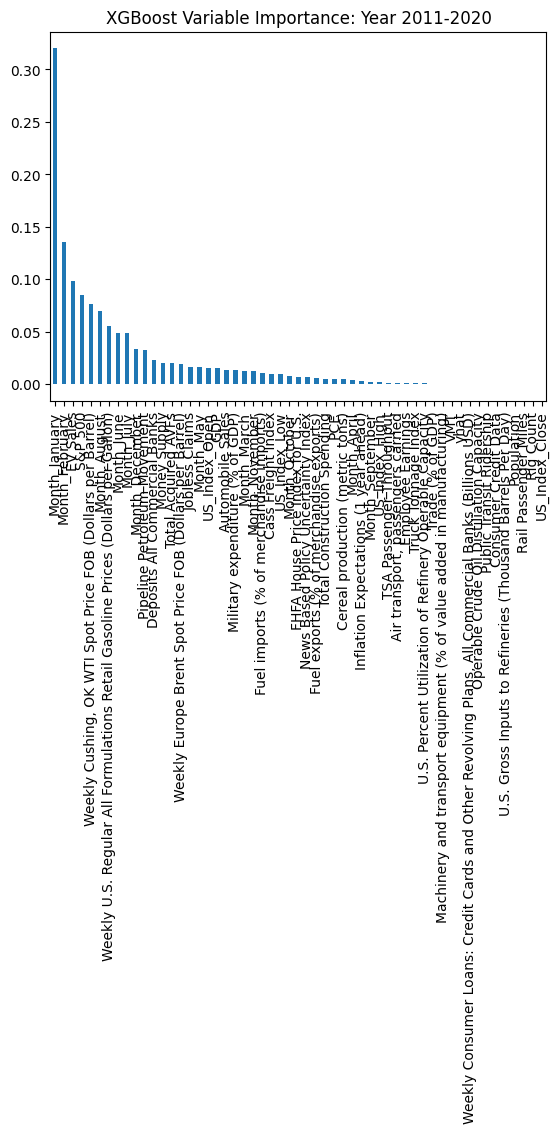

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr_2011_2020, data_2011_2020_X,data_2011_2020_y,
                                n_repeats=30,
                                random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(data_2011_2020_X)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance_2011_2020 = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance: Year 2011-2020")

Year 2021-2023

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr_2021_2023 = RandomizedSearchCV(pipe_rs_xgb,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_2021_2023.fit(data_2021_2023_X,data_2021_2023_y)

# Check model metrics
print('Training MAE:', mean_absolute_error(data_2021_2023_y,model_rs_xgbr_2021_2023.predict(data_2021_2023_X)))
print('-------------------------------------------------------------------')
# print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr.predict(X_test_yhat)))
# print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr_2021_2023.score(data_2021_2023_X,data_2021_2023_y))
print('-------------------------------------------------------------------')
# print('R2 score - test:', model_rs_xgbr.score(X_test_yhat,y_test))
# print('===================================================================')
model_rs_xgbr_2021_2023.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

Training MAE: 363.05923800998266
-------------------------------------------------------------------
R2 score - train: 0.18246458341269522
-------------------------------------------------------------------


{'xgbregressor__subsample': 1.0,
 'xgbregressor__min_child_weight': 5,
 'xgbregressor__max_depth': 14,
 'xgbregressor__max_delta_step': 0.9500000000000004,
 'xgbregressor__learning_rate': 0.8,
 'xgbregressor__gamma': 1.8000000000000007,
 'xgbregressor__booster': 'dart'}

<Axes: title={'center': 'XGBoost Variable Importance: Year 2021-2023'}>

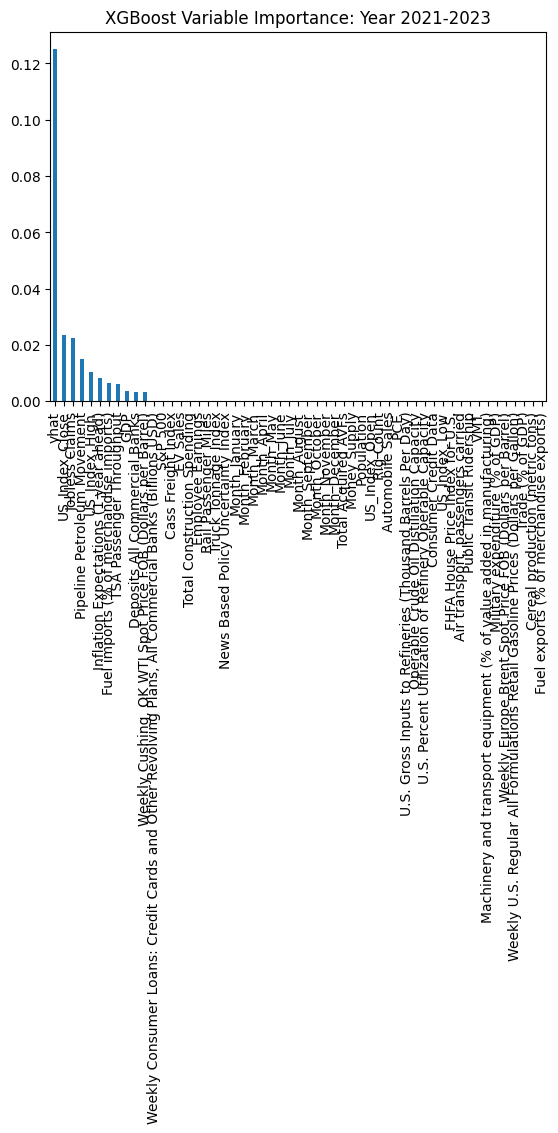

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr_2021_2023, data_2021_2023_X,data_2021_2023_y,
                                n_repeats=30,
                                random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(data_2021_2023_X)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance_2021_2023 = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance: Year 2021-2023")

In [ ]:
XGBoost_importance_2021_2023

yhat                                                                                                  0.125051
US_Index_Close                                                                                        0.023608
Jobless Claims                                                                                        0.022532
Pipeline Petroleum Movement                                                                           0.015126
US_Index_High                                                                                         0.010183
Inflation Expectations (1 year ahead)                                                                 0.008295
Fuel imports (% of merchandise imports)                                                               0.006336
TSA Passenger Throughput                                                                              0.006269
GDP                                                                                                   0.003638
D

In [ ]:
# df_transform
correlations_1 = df_transform.corr(method='pearson')
corr_data = correlations_1['y'].sort_values(ascending=False).reset_index().rename(columns={'index': 'Variable', 0: 'Correlation'})
corr_data
# print(correlations_1['y'].sort_values(ascending=False).to_string())

<ipython-input-43-a11d10233c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_1 = df_transform.corr(method='pearson')


,Variable,y
0,y,1.000000
1,yhat,0.668072
2,VMT,0.621657
3,TSA Passenger Throughput,0.495897
4,"Air transport, passengers carried",0.474074
5,Rail Passenger Miles,0.365194
6,Public Transit Ridership,0.356847
7,U.S. Gross Inputs to Refineries (Thousand Barr...,0.308064
8,Employee Earnings,0.277989
9,Operable Crude Oil Distiliation Capacity,0.219464


In [ ]:
important_var_2000_2010 = XGBoost_importance_2000_2010.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
important_var_2011_2020 = XGBoost_importance_2011_2020.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
important_var_2021_2023 = XGBoost_importance_2021_2023.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
important_var_test = XGBoost_importance.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
overall_importance = overall_XGBoost_importance.reset_index().rename(columns={'index': 'Variable', 0: 'Importance'})
important_var_test
# pd.merge(important_var, overall_important_var, on='Variable')

NameError: ignored

In [ ]:
important_var = pd.merge(important_var_2000_2010, important_var_2011_2020, on='Variable')
important_var = pd.merge(important_var, important_var_2021_2023, on='Variable')
important_var = pd.merge(important_var, important_var_test, on='Variable')
important_var = pd.merge(important_var, overall_importance, on='Variable')
important_var.columns = ['Variable', 'Importance 2000-2010', 'Importance 2011-2020', 'Importance 2021-2023', 'Importance - Train on Test','Overall Importance']
important_var

NameError: ignored

In [ ]:
important_var = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/ImportanceScores_AllVariables.csv')
important_var = pd.merge(important_var, corr_data, on='Variable')
important_var.rename(columns={"y":"Correlation"}, inplace=True)
important_var.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
important_var.to_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/Important_Scores_Correlation.csv')

In [ ]:
important_var.to_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/ImportanceScores_AllVariables.csv')

## Add Year column (not run this)

In [ ]:
df_transform['Year'] = df_transform['ds'].dt.strftime('%Y').astype(int)
# df['Day'] = df['ds'].dt.strftime('%d').astype(int)
df_transform.dtypes

ds                                                                                                    datetime64[ns]
y                                                                                                              int64
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                                   float64
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                                      float64
EV Sales                                                                                                     float64
Total Acquired AVFs                                                                                          float64
TSA Passenger Throughput                                                                                     float64
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                             float64
GDP                                                             

In [ ]:
df_train, df_test = df_transform[df_transform['ds'] < '2022-09-29'].drop('ds', axis=1), df_transform[df_transform['ds'] >= '2022-09-29'].drop('ds', axis=1)

print('Train:\t', len(df_train))
print('Test:\t', len(df_test))

Train:	 1186
Test:	 53


In [ ]:
X_train_yhat = df_train.drop('y', axis=1)
X_train = df_train.drop(['y', 'yhat'], axis=1)
y_train = df_train[['y']]

X_test_yhat = df_test.drop('y', axis=1)
X_test = df_test.drop(['y', 'yhat'], axis=1)
y_test = df_test[['y']]

In [ ]:
# Pipeline variable for RandomSearch
pipe_rs_xgb_2 = make_pipeline(XGBRegressor(random_state=100,
                                                  n_jobs=-1))

# Params for RandomSearch
paramajama = {'xgbregressor__max_depth':range(10,20,1),
              'xgbregressor__learning_rate':np.arange(0.8,1,0.05),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(4,6,1),
              'xgbregressor__gamma':np.arange(1,2,0.05),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.05),
              'xgbregressor__subsample':np.arange(1,1.5,0.05)}

# RandomSearch Model
model_rs_xgbr_2 = RandomizedSearchCV(pipe_rs_xgb_2,
                                   param_distributions = paramajama,
                                   n_iter=20,
                                   n_jobs=-1)

# Model fit
model_rs_xgbr_2.fit(X_train_yhat,y_train)

# Check model metrics
print('Training MAE:', mean_absolute_error(y_train,model_rs_xgbr_2.predict(X_train_yhat)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,model_rs_xgbr_2.predict(X_test_yhat)))
print('-------------------------------------------------------------------')
print('R2 score - train:', model_rs_xgbr_2.score(X_train_yhat,y_train))
print('-------------------------------------------------------------------')
print('R2 score - test:', model_rs_xgbr_2.score(X_test_yhat,y_test))
print('===================================================================')
model_rs_xgbr_2.best_params_

Training MAE: 199.77176927434655
-------------------------------------------------------------------
Validation MAE: 329.5146852889151
-------------------------------------------------------------------
R2 score - train: 0.7275830438570142
-------------------------------------------------------------------
R2 score - test: 0.3155925656136368


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboos

{'xgbregressor__subsample': 1.1,
 'xgbregressor__min_child_weight': 5,
 'xgbregressor__max_depth': 11,
 'xgbregressor__max_delta_step': 0.5,
 'xgbregressor__learning_rate': 0.9500000000000002,
 'xgbregressor__gamma': 1.8000000000000007,
 'xgbregressor__booster': 'gblinear'}

<Axes: title={'center': 'XGBoost Variable Importance'}>

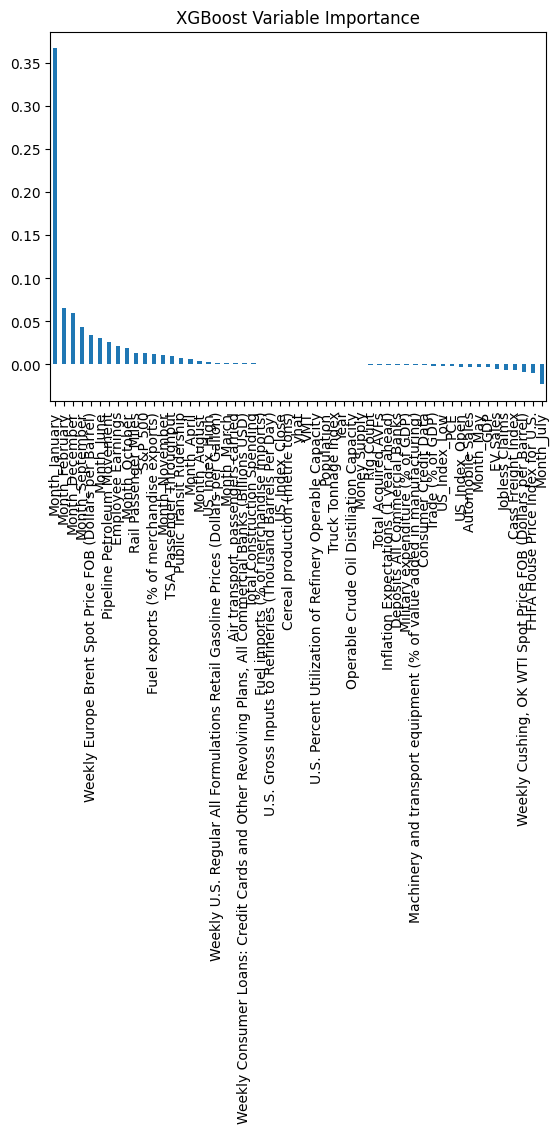

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_rs_xgbr_2, X_test_yhat, y_test,
                          n_repeats=30,
                         random_state=42)
imdf=pd.DataFrame(result.importances_mean).T
onehot_fit = onehot.fit(X_test_yhat)
importances = imdf.set_axis(onehot_fit.get_feature_names_out(), axis=1)
XGBoost_importance = importances.T[0].sort_values(ascending=False)
importances.T[0].sort_values(ascending=False).plot(kind='bar',title="XGBoost Variable Importance")

# Prediction Models

## Ridge

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1.0)
# fit model
ridge_model.fit(X_train_yhat,y_train)
check_metrics(ridge_model, X_train_yhat, y_train, X_test_yhat, y_test)

Ridge()
Training MAE: 180.1248266111344
-------------------------------------------------------------------
Validation MAE: 556.0837271133641
-------------------------------------------------------------------
Validation R2 score: -0.9506269082748893


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10655e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
ridge = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_yhat, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -189.498
Config: {'alpha': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.55648e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
check_metrics(results, X_train_yhat, y_train, X_test_yhat, y_test)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=100),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')
Training MAE: 178.791033744598
-------------------------------------------------------------------
Validation MAE: 530.87557999

In [ ]:
# Create a mapping between feature names and coefficients
feature_coefficients = dict(zip(X_train_yhat.columns, search.best_estimator_.coef_.flatten()))
# Convert the mapping to a DataFrame
coefficients_df = pd.DataFrame(list(feature_coefficients.items()), columns=['Feature', 'Coefficient'])

In [ ]:
coefficients_df

,Feature,Coefficient
0,"Weekly Cushing, OK WTI Spot Price FOB (Dollars...",0.434054
1,Weekly Europe Brent Spot Price FOB (Dollars pe...,-1.263572
2,EV Sales,-0.039998
3,Total Acquired AVFs,0.005337
4,TSA Passenger Throughput,-0.000004
5,Weekly U.S. Regular All Formulations Retail Ga...,-125.114641
6,GDP,2.934271
7,US_Index_Open,21.556524
8,US_Index_High,-15.982249
9,US_Index_Low,-27.164305


## Lasso

In [ ]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [ ]:
# # define model
# lasso_model = Lasso(alpha=1.0)
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(lasso_model, X_train_yhat, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
# define model
lasso_model = Lasso(alpha=1.0)
# fit model
lasso_model.fit(X_train_yhat, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.457e+07, tolerance: 3.006e+04
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
check_metrics(lasso_model, X_train_yhat, y_train, X_test_yhat, y_test)

Lasso()
Training MAE: 184.40540848592937
-------------------------------------------------------------------
Validation MAE: 416.1369474748857
-------------------------------------------------------------------
Validation R2 score: -0.14440629475486477


In [ ]:
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_yhat, y_train)

# Access the best model from the grid search
best_lasso_model = results.best_estimator_

check_metrics(best_lasso_model, X_train_yhat, y_train, X_test_yhat, y_test)

Lasso(alpha=0.05)
Training MAE: 181.62437348951897
-------------------------------------------------------------------
Validation MAE: 376.96444523593885
-------------------------------------------------------------------
Validation R2 score: 0.0558034160181855


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+07, tolerance: 3.006e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a mapping between feature names and coefficients
lasso_coefficients = dict(zip(X_train_yhat.columns, best_lasso_model.coef_.flatten()))
# Convert the mapping to a DataFrame
coefficients_df_lasso = pd.DataFrame(list(lasso_coefficients.items()), columns=['Feature', 'Coefficient'])

In [ ]:
coefficients_df_lasso

,Feature,Coefficient
0,"Weekly Cushing, OK WTI Spot Price FOB (Dollars...",0.272339
1,Weekly Europe Brent Spot Price FOB (Dollars pe...,-0.620256
2,EV Sales,-0.011429
3,Total Acquired AVFs,-0.435394
4,TSA Passenger Throughput,-0.000003
5,Weekly U.S. Regular All Formulations Retail Ga...,-119.291764
6,GDP,3.100359
7,US_Index_Open,17.264919
8,US_Index_High,-5.756488
9,US_Index_Low,-28.960695


In [ ]:
coeff_linear = pd.merge(coefficients_df, coefficients_df_lasso, on='Feature')
coeff_linear.rename(columns={'Feature': 'Variable','Coefficient_x': 'Coeffient Ridge', 'Coefficient_y': 'Coeffient Lasso'}, inplace=True)

In [ ]:
import_var = pd.read_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/Important_Scores_Correlation.csv')

In [ ]:
import_var

,Unnamed: 0,Variable,Importance 2000-2010,Importance 2011-2020,Importance 2021-2023,Importance - Train on Test,Overall Importance,Correlation
0,0,Month_January,0.288995,0.327173,0.000000,0.396580,0.277855,-0.285453
1,1,Month_February,0.145593,0.135534,0.000000,0.091250,0.137627,-0.155736
2,2,Fuel exports (% of merchandise exports),0.089935,0.003252,0.000000,0.015073,0.210546,-0.034792
3,3,FHFA House Price Index for U.S.,0.082710,0.008789,0.000000,-0.014124,0.068031,0.031937
4,4,Month_March,0.063589,0.012527,0.000000,0.016093,0.028660,-0.050231
5,5,Month_August,0.052064,0.074033,0.000000,-0.001215,0.019673,0.208183
6,6,Deposits All Commercial Banks,0.051500,0.030442,0.001312,0.000622,0.016260,-0.020702
7,7,Jobless Claims,0.049783,0.021448,0.015299,-0.002548,0.448723,-0.518138
8,8,Month_September,0.031497,0.000967,0.000000,0.049997,0.018180,-0.011863
9,9,US_Index_Open,0.030316,0.023292,0.000000,-0.005363,0.009125,-0.226756


In [ ]:
import_var_coeff = pd.merge(import_var, coeff_linear, on='Variable')
import_var_coeff

,Unnamed: 0,Variable,Importance 2000-2010,Importance 2011-2020,Importance 2021-2023,Importance - Train on Test,Overall Importance,Correlation,Coeffient Ridge,Coeffient Lasso
0,0,Month_January,0.288995,0.327173,0.000000,0.396580,0.277855,-0.285453,41.598872,192.363547
1,1,Month_February,0.145593,0.135534,0.000000,0.091250,0.137627,-0.155736,204.959723,382.246138
2,2,Fuel exports (% of merchandise exports),0.089935,0.003252,0.000000,0.015073,0.210546,-0.034792,895.532332,-750.143857
3,3,FHFA House Price Index for U.S.,0.082710,0.008789,0.000000,-0.014124,0.068031,0.031937,0.770092,2.084899
4,4,Month_March,0.063589,0.012527,0.000000,0.016093,0.028660,-0.050231,-110.874867,-0.000000
5,5,Month_August,0.052064,0.074033,0.000000,-0.001215,0.019673,0.208183,-175.678746,-138.522489
6,6,Deposits All Commercial Banks,0.051500,0.030442,0.001312,0.000622,0.016260,-0.020702,-0.063499,0.053741
7,7,Jobless Claims,0.049783,0.021448,0.015299,-0.002548,0.448723,-0.518138,-0.000459,-0.000478
8,8,Month_September,0.031497,0.000967,0.000000,0.049997,0.018180,-0.011863,-15.035720,60.924585
9,9,US_Index_Open,0.030316,0.023292,0.000000,-0.005363,0.009125,-0.226756,21.556524,17.264919


In [ ]:
import_var_coeff.to_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/import_var_coeff.csv')

### Lasso - Broken down by each year

2000-2010

In [ ]:
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data_2000_2010_X, data_2000_2010_y)

# Access the best model from the grid search
best_lasso_model = results.best_estimator_

check_metrics(best_lasso_model, data_2000_2010_X, data_2000_2010_y, data_2000_2010_X, data_2000_2010_y)

Lasso(alpha=0.74)
Training MAE: 132.3570066417931
-------------------------------------------------------------------
Validation MAE: 132.3570066417931
-------------------------------------------------------------------
Validation R2 score: 0.8052984950799372


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.875e+06, tolerance: 8.898e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a mapping between feature names and coefficients
lasso_coefficients_2000_2010 = dict(zip(X_train_yhat.columns, best_lasso_model.coef_.flatten()))
# Convert the mapping to a DataFrame
coefficients_df_lasso_2000_2010 = pd.DataFrame(list(lasso_coefficients_2000_2010.items()), columns=['Feature', 'Coefficient'])
coefficients_df_lasso_2000_2010

,Feature,Coefficient
0,"Weekly Cushing, OK WTI Spot Price FOB (Dollars...",-7.261203e+00
1,Weekly Europe Brent Spot Price FOB (Dollars pe...,7.221038e+00
2,EV Sales,2.179600e-01
3,Total Acquired AVFs,6.524306e-01
4,TSA Passenger Throughput,-1.445831e-04
5,Weekly U.S. Regular All Formulations Retail Ga...,-1.312391e+02
6,GDP,3.130050e+00
7,US_Index_Open,7.544321e+00
8,US_Index_High,-7.765006e+00
9,US_Index_Low,7.519607e+00


In [ ]:
# Concatenate DataFrames along columns axis (axis=1)
combined_df = pd.concat([data_2000_2010_X, data_2000_2010_y], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# # Extract the correlation between all columns of X and the single column of y
correlation_with_target = correlation_matrix['y'].iloc[:-1]
correlation_with_target

Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                            0.534275
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                               0.545183
EV Sales                                                                                              0.092216
Total Acquired AVFs                                                                                   0.149112
TSA Passenger Throughput                                                                              0.641429
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                      0.582129
GDP                                                                                                   0.627555
US_Index_Open                                                                                        -0.609315
US_Index_High                                                                                        -0.616038
U

2011-2020

In [ ]:
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data_2011_2020_X, data_2011_2020_y)

# Access the best model from the grid search
best_lasso_model = results.best_estimator_

check_metrics(best_lasso_model, data_2011_2020_X, data_2011_2020_y, data_2011_2020_X, data_2011_2020_y)

Lasso(alpha=0.22)
Training MAE: 176.57523675321207
-------------------------------------------------------------------
Validation MAE: 176.57523675321207
-------------------------------------------------------------------
Validation R2 score: 0.7495656023742456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+07, tolerance: 8.861e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a mapping between feature names and coefficients
lasso_coefficients_2011_2020 = dict(zip(X_train_yhat.columns, best_lasso_model.coef_.flatten()))
# Convert the mapping to a DataFrame
coefficients_df_lasso_2011_2020 = pd.DataFrame(list(lasso_coefficients_2011_2020.items()), columns=['Feature', 'Coefficient'])
coefficients_df_lasso_2011_2020

,Feature,Coefficient
0,"Weekly Cushing, OK WTI Spot Price FOB (Dollars...",-3.134954
1,Weekly Europe Brent Spot Price FOB (Dollars pe...,-4.150540
2,EV Sales,0.117340
3,Total Acquired AVFs,2.168195
4,TSA Passenger Throughput,0.000010
5,Weekly U.S. Regular All Formulations Retail Ga...,-201.038694
6,GDP,-2.877939
7,US_Index_Open,-2.225200
8,US_Index_High,-27.666516
9,US_Index_Low,-6.482858


In [ ]:
# Concatenate DataFrames along columns axis (axis=1)
combined_df = pd.concat([data_2011_2020_X, data_2011_2020_y], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# # Extract the correlation between all columns of X and the single column of y
correlation_with_target = correlation_matrix['y'].iloc[:-1]
correlation_with_target

Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                           -0.498888
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                              -0.517949
EV Sales                                                                                              0.440190
Total Acquired AVFs                                                                                   0.311277
TSA Passenger Throughput                                                                              0.264755
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                     -0.429526
GDP                                                                                                   0.520906
US_Index_Open                                                                                         0.482871
US_Index_High                                                                                         0.484388
U

2021-2023

In [ ]:
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(data_2021_2023_X, data_2021_2023_y)

# Access the best model from the grid search
best_lasso_model = results.best_estimator_

check_metrics(best_lasso_model, data_2021_2023_X, data_2021_2023_y, data_2021_2023_X, data_2021_2023_y)

Lasso(alpha=0.0)
Training MAE: 212.45881202074574
-------------------------------------------------------------------
Validation MAE: 212.45881202074574
-------------------------------------------------------------------
Validation R2 score: 0.7364231266982608


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.143e+06, tolerance: 3.903e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_c

In [ ]:
# Create a mapping between feature names and coefficients
lasso_coefficients_2021_2023 = dict(zip(X_train_yhat.columns, best_lasso_model.coef_.flatten()))
# Convert the mapping to a DataFrame
coefficients_df_lasso_2021_2023 = pd.DataFrame(list(lasso_coefficients_2021_2023.items()), columns=['Feature', 'Coefficient'])
coefficients_df_lasso_2021_2023

,Feature,Coefficient
0,"Weekly Cushing, OK WTI Spot Price FOB (Dollars...",-21.238011
1,Weekly Europe Brent Spot Price FOB (Dollars pe...,16.812291
2,EV Sales,-0.155116
3,Total Acquired AVFs,-0.450632
4,TSA Passenger Throughput,0.000042
5,Weekly U.S. Regular All Formulations Retail Ga...,-95.589415
6,GDP,11.055861
7,US_Index_Open,71.972614
8,US_Index_High,-60.161733
9,US_Index_Low,52.327651


In [ ]:
# Concatenate DataFrames along columns axis (axis=1)
combined_df = pd.concat([data_2021_2023_X, data_2021_2023_y], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# # Extract the correlation between all columns of X and the single column of y
correlation_with_target = correlation_matrix['y'].iloc[:-1]
correlation_with_target

Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                            0.056735
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                               0.041058
EV Sales                                                                                             -0.051795
Total Acquired AVFs                                                                                  -0.107347
TSA Passenger Throughput                                                                              0.376579
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                      0.159494
GDP                                                                                                   0.008016
US_Index_Open                                                                                        -0.072877
US_Index_High                                                                                        -0.083823
U

## LSMT

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(100)

In [ ]:
# df_transform

In [ ]:
# normalize the dataset
lmst_df = df_transform.copy()
lmst_df['ds'] = lmst_df['ds'].astype('category')
lmst_df.dtypes

# scaler = MinMaxScaler(feature_range=(0, 1))
# lmst_df = scaler.fit_transform(df_transform)

ds                                                                                                    category
y                                                                                                        int64
Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                             float64
Weekly Europe Brent Spot Price FOB (Dollars per Barrel)                                                float64
EV Sales                                                                                               float64
Total Acquired AVFs                                                                                    float64
TSA Passenger Throughput                                                                               float64
Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)                       float64
GDP                                                                                                    float64
U

In [ ]:
# df_transform.dtypes

## Prophet

In [ ]:
df_train_prophet, df_test_prophet = df_transform[df_transform['ds'] < '2022-09-29'], df_transform[df_transform['ds'] >= '2022-09-29']

print('Train:\t', len(df_train_prophet))
print('Test:\t', len(df_test_prophet))

Train:	 1186
Test:	 53


In [ ]:
# df_train_prophet[['yhat']]

In [ ]:
# X_train_prophet = df_train_prophet.drop('y', axis=1)
# # y_train = df_train_prophet[['y']]

# X_test_prophet = df_test_prophet.drop('y', axis=1)
# # y_test = df_test[['y']]

In [ ]:
prophet_model = Prophet(interval_width=0.95,seasonality_mode="additive")

prophet_model.fit(df_train_prophet.drop('yhat', axis=1))
prophet_pred = prophet_model.predict(df_train_prophet) # Keep the dataset format
# prophet_pred.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1qucrqu/ytm05hli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1qucrqu/_jxt41su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23837', 'data', 'file=/tmp/tmpk1qucrqu/ytm05hli.json', 'init=/tmp/tmpk1qucrqu/_jxt41su.json', 'output', 'file=/tmp/tmpk1qucrqu/prophet_model4nccmo_g/prophet_model-20231213015306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:53:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:53:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print(prophet_model)
print('===================================================================')
print('Training MAE:', mean_absolute_error(df_train_prophet[['y']], prophet_pred[['yhat']]))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(df_test_prophet[['y']], prophet_model.predict(df_test_prophet.drop('yhat', axis=1))[['yhat']] ))
print('-------------------------------------------------------------------')
# print('Validation R2 score:', prophet.score(X_test,y_test))
# print('===================================================================')

Training MAE: 231.5865585320987
-------------------------------------------------------------------
Validation MAE: 408.1545614316179
-------------------------------------------------------------------


In [ ]:
print(prophet_model)
print('===================================================================')
print('Training MAE:', mean_absolute_error(df_train_prophet[['y']], prophet_pred[['yhat']]))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(df_test_prophet[['y']], prophet_model.predict(df_test_prophet)[['yhat']] ))
print('-------------------------------------------------------------------')
# print('Validation R2 score:', prophet.score(X_test,y_test))
# print('===================================================================')

Training MAE: 231.5865585320987
-------------------------------------------------------------------
Validation MAE: 408.1545614316179
-------------------------------------------------------------------


In [ ]:
future_dates = pd.date_range(start='2024-01-05', end='2024-06-28', freq='W')
future_df = pd.DataFrame({'ds': future_dates})

future_fuel_demand_predictions = prophet_model.predict(future_df)
future_fuel_demand_values = future_fuel_demand_predictions['yhat']
future_fuel_demand_values

0     7897.502967
1     7817.380224
2     7890.089568
3     7990.359626
4     8020.085030
5     8006.053871
6     8041.355716
7     8155.361679
8     8272.926344
9     8304.290962
10    8247.807726
11    8181.926785
12    8166.920906
13    8184.393467
14    8183.923023
15    8165.280733
16    8183.755259
17    8272.355784
18    8386.068133
19    8445.759882
20    8430.222193
21    8401.205956
22    8429.205329
23    8510.890879
24    8577.387570
Name: yhat, dtype: float64

In [ ]:
future_df['Fuel Demand Prediction'] = future_fuel_demand_values
future_df.rename(columns={'ds': 'Date'}, inplace=True)
# future_df.set_index('Date', inplace=True)

In [ ]:
# future_df.index = future_df.index.date
# future_df.plot()

In [ ]:
future_df.to_csv('/content/drive/Shareddrives/BAT-3302_DS_SunocoProject/future_demand_prediction.csv')

# Descriptive Visualization

In [ ]:
from sklearn.linear_model import LinearRegression

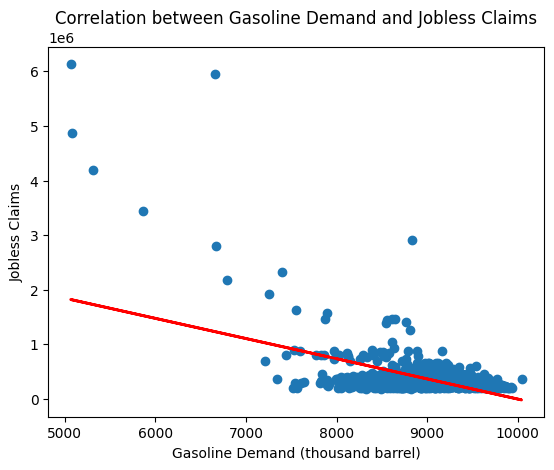

In [ ]:
# Scatter plot
plt.scatter(df_transform['y'], df_transform['Jobless Claims'])

# Fit a linear regression line
regression_model = LinearRegression()
X = df_transform[['y']]
y = df_transform['Jobless Claims']
regression_model.fit(X, y)

# Plot the trend line
plt.plot(X, regression_model.predict(X), color='red', linewidth=2)

# Set labels and title
plt.xlabel('Gasoline Demand (thousand barrel)')
plt.ylabel('Jobless Claims')
plt.title('Correlation between Gasoline Demand and Jobless Claims')

# Show the plot
plt.show()

In [ ]:
# Scatter plot
plt.scatter(df_transform['y'], df_transform['Jobless Claims'])

# Fit a linear regression line
regression_model = LinearRegression()
X = df_transform[['y']]
y = df_transform['Jobless Claims']
regression_model.fit(X, y)

# Plot the trend line
plt.plot(X, regression_model.predict(X), color='red', linewidth=2)

# Set labels and title
plt.xlabel('Gasoline Demand (thousand barrel)')
plt.ylabel('Jobless Claims')
plt.title('Correlation between Gasoline Demand and Jobless Claims')

# Show the plot
plt.show()

In [ ]:
df_transform.columns

Index(['ds', 'y', 'Weekly Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'Weekly Europe Brent Spot Price FOB (Dollars per Barrel)', 'EV Sales',
       'Total Acquired AVFs', 'TSA Passenger Throughput',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'GDP', 'US_Index_Open', 'US_Index_High', 'US_Index_Low',
       'US_Index_Close',
       'Weekly Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (Billions USD)',
       'S&P 500', 'Rig Count', 'Automobile Sales', 'PCE',
       'U.S. Gross Inputs to Refineries (Thousand Barrels Per Day)',
       'Operable Crude Oil Distiliation Capacity',
       'U.S. Percent Utilization of Refinery Operable Capacity',
       'Consumer Credit Data', 'Jobless Claims',
       'Inflation Expectations (1 year ahead)',
       'FHFA House Price Index for U.S.', 'Public Transit Ridership', 'VMT',
       'Machinery and transport equipment (% of value added in manufacturing)'